Importing all functions

In [1]:
%matplotlib inline

from functions import *

c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# read all cleaned csv files
df_category_translation = pd.read_csv('../../data/cleaned/category_translation.csv')
df_customers = pd.read_csv('../../data/cleaned/customers.csv')
df_geolocation = pd.read_csv('../../data/cleaned/geolocation.csv')
df_items = pd.read_csv('../../data/cleaned/items.csv')
df_orders = pd.read_csv('../../data/cleaned/orders.csv')
df_payments = pd.read_csv('../../data/cleaned/payments.csv')
df_products = pd.read_csv('../../data/cleaned/products.csv')
df_reviews = pd.read_csv('../../data/cleaned/reviews.csv')
df_sellers = pd.read_csv('../../data/cleaned/sellers.csv')
df_states = pd.read_csv('../../data/cleaned/states.csv')

In [3]:
df_category_translation = df_category_translation.copy()
df_customers = df_customers.copy()
df_geolocation = df_geolocation.copy()
df_items = df_items.copy()
df_orders = df_orders.copy()
df_payments = df_payments.copy()
df_products = df_products.copy()
df_reviews = df_reviews.copy()
df_sellers = df_sellers.copy()
df_states = df_states.copy()

### Understanding the timestamp between df_items and df_orders

In [4]:
df_items.head()

order_id  item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214        1   
1  00018f77f2f0320c557190d7a144bdd3        1   
2  000229ec398224ef6ca0657da4fc703e        1   
3  00024acbcdf0a6daa1e931b038114c75        1   
4  00042b26cf59d7ce69dfabb4e55b4fd9        1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_timestamp   price  freight_value  
0      2017-09-19 09:45:35   58.90          13.29  
1      2017-05-03 11:05:13  239.90          19.93  
2      2018-01-18 14:48:30  199.00          17.87  
3      2018-08-15 10:10:18   12.99          12.79  
4      2017-02-13 13:57:51  199.90          18.14

In [5]:
df_orders[df_orders['order_id'] == '00010242fe8c5a6d1ba2dd792cb16214']

order_id                       customer_id  \
85267  00010242fe8c5a6d1ba2dd792cb16214  3ce436f183e68e07877b285a838db11a   

          status   purchase_timestamp   approved_timestamp  \
85267  delivered  2017-09-13 08:59:02  2017-09-13 09:45:35   

      delivered_carrier_timestamp delivered_customer_timestamp  \
85267         2017-09-19 18:34:16          2017-09-20 23:43:48   

      estimated_delivery_timestamp  
85267          2017-09-29 00:00:00

### Understanding price and freight_value in df_items compared to value in df_payments

In [6]:
df_items[df_items['order_id'] == '00010242fe8c5a6d1ba2dd792cb16214']

order_id  item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214        1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

  shipping_limit_timestamp  price  freight_value  
0      2017-09-19 09:45:35   58.9          13.29

In [7]:
df_payments[df_payments['order_id'] == '00010242fe8c5a6d1ba2dd792cb16214']

order_id  sequential         type  \
82825  00010242fe8c5a6d1ba2dd792cb16214           1  credit_card   

       installments  value  
82825             2  72.19

In [8]:
df_reviews.head(3)

review_id                          order_id  score  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb      4   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33      5   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b      5   

  title message   creation_timestamp     answer_timestamp  \
0     0       0  2018-01-18 00:00:00  2018-01-18 21:46:59   
1     0       0  2018-03-10 00:00:00  2018-03-11 03:05:13   
2     0       0  2018-02-17 00:00:00  2018-02-18 14:36:24   

                                    review_unique_id  
0  7bc2406110b926393aa56f80a40eba40_73fc7af87114b...  
1  80e641a11e56f04c1ad469d5645fdfde_a548910a1c614...  
2  228ce5500dc1d8e020d8d1322874b6f0_f9e4b658b201a...

In [9]:
df_orders[df_orders['order_id'] == '73fc7af87114b39712e6da79b0a377eb']

order_id                       customer_id  \
1871  73fc7af87114b39712e6da79b0a377eb  41dcb106f807e993532d446263290104   

         status   purchase_timestamp   approved_timestamp  \
1871  delivered  2018-01-11 15:30:49  2018-01-11 15:47:59   

     delivered_carrier_timestamp delivered_customer_timestamp  \
1871         2018-01-12 21:57:22          2018-01-17 18:42:41   

     estimated_delivery_timestamp  
1871          2018-02-02 00:00:00

### Understand the difference between order_id in items and payments

The amount of order_id in items and payments are different. <br>
Does it mean that some order_id doesn't make it into payment?

In [10]:
items_order_ids = set(df_items['order_id'])
payments_order_ids = set(df_payments['order_id'])

In [11]:
# Find order_ids that appear in both dataframes
common_order_ids = items_order_ids.intersection(payments_order_ids)
len(common_order_ids)

96640

In [12]:
# Find order_ids that are in items but not in payments
only_in_items = items_order_ids - payments_order_ids

# Find order_ids that are in payments but not in items
only_in_payments = payments_order_ids - items_order_ids

In [13]:
# Print the results
print(f"Total unique order_ids: {len(items_order_ids.union(payments_order_ids))}")
print(f"Order_ids in both dataframes: {len(common_order_ids)}")
print(f"Order_ids only in items: {len(only_in_items)}")
print(f"Order_ids only in payments: {len(only_in_payments)}")

Total unique order_ids: 99406
Order_ids in both dataframes: 96640
Order_ids only in items: 2026
Order_ids only in payments: 740


It is proved that all order_id in items are going to payments. However, some order_id is paid with two different payment method, for example, voucher and credit card. <br>
**For calculating the revenue, it's best to use df_items**

## Create new dataframes for analysis

### **SALES**

Combine columns from various dataframes: <br>
- `df_items` : order_id, item_id, product_id, price, freight_value. <br>
- `df_orders` : (filter status = delivered) customer_id, approved_timestamp. <br> 
- `df_customers` : customer_id, city, state_code. <br>
- `df_geolocation` : latitude, longitude. <br>
- `df_states` : state_name, population. <br>
- `df_products` : category_name. <br>
- `df_category_translation` : category_english. <br>

In [14]:
df_sales = df_items[['order_id','item_id','product_id','price','freight_value']]

Merge df_sales and df_orders (only with delivered status).

In [15]:
"Prefered type of Join as your initial left table doesn't change and you specify on which column to perform the column"

# Merge df_sales and df_orders DataFrames on the 'order_id' column (left join)
df_sales = pd.merge(df_sales, df_orders, on='order_id', how='left')

There is somehow an error in the system that not all delivered packages have approved_timestamp. So, let's choose purchase_timestamp.

In [16]:
# take only required columns
required_columns = ['order_id','item_id', 'product_id','price','freight_value','customer_id','purchase_timestamp','status']
df_sales = df_sales[required_columns]

In [17]:
df_sales.dtypes

order_id               object
item_id                 int64
product_id             object
price                 float64
freight_value         float64
customer_id            object
purchase_timestamp     object
status                 object
dtype: object

In [18]:
df_sales.isna().sum()

order_id              0
item_id               0
product_id            0
price                 0
freight_value         0
customer_id           0
purchase_timestamp    0
status                0
dtype: int64

Filter only the with 'delivered' status for the certainty that the package has been delivered to customer.

In [19]:
df_sales['status'].value_counts()

status
delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: count, dtype: int64

In [20]:
df_sales = df_sales[df_sales['status'] == 'delivered']

In [21]:
df_sales = df_sales.drop(columns='status')

Change data type of purchase_timestamp into datetime format.

In [22]:
df_sales['purchase_timestamp'] = pd.to_datetime(df_sales['purchase_timestamp'])

In [23]:
df_sales.dtypes

order_id                      object
item_id                        int64
product_id                    object
price                        float64
freight_value                float64
customer_id                   object
purchase_timestamp    datetime64[ns]
dtype: object

Merge df_sales and df_customers to take the data of city and state_code

In [24]:
df_sales = pd.merge(df_sales, df_customers, on='customer_id', how='left')

In [25]:
df_sales = df_sales.drop(columns=['unique_id', 'customer_unique_id'])

In [26]:
# Check missing value

df_sales.isna().sum()

order_id              0
item_id               0
product_id            0
price                 0
freight_value         0
customer_id           0
purchase_timestamp    0
zip_code_prefix       0
city                  0
state_code            0
unique_index          0
dtype: int64

Merge df_sales and df_geolocation to take the data of latitude and longitude.

In [27]:
df_sales = pd.merge(df_sales, df_geolocation, on=['zip_code_prefix','city','state_code','unique_index'], how='left')

In [28]:
df_sales.head()

order_id  item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214        1   
1  00018f77f2f0320c557190d7a144bdd3        1   
2  000229ec398224ef6ca0657da4fc703e        1   
3  00024acbcdf0a6daa1e931b038114c75        1   
4  00042b26cf59d7ce69dfabb4e55b4fd9        1   

                         product_id   price  freight_value  \
0  4244733e06e7ecb4970a6e2683c13e61   58.90          13.29   
1  e5f2d52b802189ee658865ca93d83a8f  239.90          19.93   
2  c777355d18b72b67abbeef9df44fd0fd  199.00          17.87   
3  7634da152a4610f1595efa32f14722fc   12.99          12.79   
4  ac6c3623068f30de03045865e4e10089  199.90          18.14   

                        customer_id  purchase_timestamp  zip_code_prefix  \
0  3ce436f183e68e07877b285a838db11a 2017-09-13 08:59:02            28013   
1  f6dd3ec061db4e3987629fe6b26e5cce 2017-04-26 10:53:06            15775   
2  6489ae5e4333f3693df5ad4372dab6d3 2018-01-14 14:33:31            35661   
3  d4eb9395c8c0431ee92fce09860c5a06 2018-08-08 10:00:35            12952   
4  58dbd0b2d70206bf40e62cd34e84d795 2017-02-04 13:57:51            13226   

                    city state_code                    unique_index  \
0  campos dos goytacazes         RJ  28013_campos dos goytacazes_RJ   
1        santa fe do sul         SP        15775_santa fe do sul_SP   
2          para de minas         MG          35661_para de minas_MG   
3                atibaia         SP                12952_atibaia_SP   
4        varzea paulista         SP        13226_varzea paulista_SP   

    latitude  longitude  
0 -21.763186 -41.310265  
1 -20.222902 -50.898297  
2 -19.869745 -44.592968  
3 -23.105968 -46.590277  
4 -23.243402 -46.827614

In [29]:
df_sales.shape

(110197, 13)

In [30]:
# Check missing value

df_sales.isna().sum()

order_id                0
item_id                 0
product_id              0
price                   0
freight_value           0
customer_id             0
purchase_timestamp      0
zip_code_prefix         0
city                    0
state_code              0
unique_index            0
latitude              638
longitude             638
dtype: int64

Check missing values

In [31]:
missing_values = df_sales[df_sales['latitude'].isnull()]
missing_values

order_id  item_id  \
239     009fa9bd0d92710e840793bfefa80867        1   
432     010b143d83a59b355cd5a75c0f0fd785        1   
433     010b143d83a59b355cd5a75c0f0fd785        2   
434     010b143d83a59b355cd5a75c0f0fd785        3   
435     010b143d83a59b355cd5a75c0f0fd785        4   
...                                  ...      ...   
109109  fd5c73fb6edc88486582bf0a0bb989aa        1   
109579  fe784ed3dfc728fd4de44fa9918fe1eb        1   
109618  fe94f63f2f4d326a6da25bfe07ffaf93        1   
109760  feeb572a755207d889d166ca90221c84        1   
109763  feec317d7127a4dc69cfb507f08c8759        1   

                              product_id   price  freight_value  \
239     617186c3d97ea56c9c683a8a3974e8c1   84.99          15.34   
432     6ff1fc9209c7854704a4f75c9fac41b4   22.00          34.15   
433     6ff1fc9209c7854704a4f75c9fac41b4   22.00          34.15   
434     6ff1fc9209c7854704a4f75c9fac41b4   22.00          34.15   
435     6ff1fc9209c7854704a4f75c9fac41b4   22.00          34.15   
...                                  ...     ...            ...   
109109  5861173d9af66445f070078cfc29a597  199.99          13.84   
109579  9ac1378f05cd222b3fb34a3cccc626c7   39.90          18.08   
109618  86ecc269de40ba13205e7beeee12f26f   29.99          15.31   
109760  40e8b425d1a26e2d9cb77363523e05ce   69.90          60.95   
109763  aca2eb7d00ea1a7b8ebd4e68314663af   69.90          35.85   

                             customer_id  purchase_timestamp  zip_code_prefix  \
239     ed19fa6ce948d52be769926c2baaa17c 2017-06-14 09:44:30            38710   
432     c181ea8a3ec364246642e36dae84bf30 2017-08-30 23:28:35            76870   
433     c181ea8a3ec364246642e36dae84bf30 2017-08-30 23:28:35            76870   
434     c181ea8a3ec364246642e36dae84bf30 2017-08-30 23:28:35            76870   
435     c181ea8a3ec364246642e36dae84bf30 2017-08-30 23:28:35            76870   
...                                  ...                 ...              ...   
109109  c348e5bd22ca24a447a221536c71d8b3 2018-04-09 11:34:37            12770   
109579  534ae76adc5da4b4f9c7b505a756d59d 2018-07-31 18:24:05            71574   
109618  1dbe0bf136ea8849ed9648546ebc2e63 2018-08-02 12:07:12            73082   
109760  757bbd8c61a5fd67d5b8c18efd987beb 2017-12-07 18:00:45            69980   
109763  8a0108267d9258a0ec9f74381bc9b0de 2018-03-04 23:38:00            69900   

                   city state_code              unique_index  latitude  \
239         major porto         MG      38710_major porto_MG       NaN   
432           ariquemes         RO        76870_ariquemes_RO       NaN   
433           ariquemes         RO        76870_ariquemes_RO       NaN   
434           ariquemes         RO        76870_ariquemes_RO       NaN   
435           ariquemes         RO        76870_ariquemes_RO       NaN   
...                 ...        ...                       ...       ...   
109109        pinheiros         SP        12770_pinheiros_SP       NaN   
109579         brasilia         DF         71574_brasilia_DF       NaN   
109618         brasilia         DF         73082_brasilia_DF       NaN   
109760  cruzeiro do sul         AC  69980_cruzeiro do sul_AC       NaN   
109763       rio branco         AC       69900_rio branco_AC       NaN   

        longitude  
239           NaN  
432           NaN  
433           NaN  
434           NaN  
435           NaN  
...           ...  
109109        NaN  
109579        NaN  
109618        NaN  
109760        NaN  
109763        NaN  

[638 rows x 13 columns]

In [32]:
df_geolocation[(df_geolocation['zip_code_prefix'] == '38710') & (df_geolocation['city'] == 'major porto') & (df_geolocation['state_code'] == 'MG')]

Empty DataFrame
Columns: [zip_code_prefix, city, state_code, latitude, longitude, unique_index]
Index: []

In [33]:
# It's also checked in the raw data but it still has missing value. So, it's better to drop it.
# df_geolocation[(df_geolocation['geolocation_zip_code_prefix'] == '38710') & (df_geolocation['geolocation_city'] == 'major porto') & (df_geolocation['geolocation_state'] == 'MG')]

In [34]:
missing_values['price'].min() # Output: 5.6
missing_values['price'].max() # Output: 610
missing_values['price'].mean() # Output: 108.8

153.18581504702192

We can drop the missing values.

In [35]:
df_sales = df_sales.dropna()

Merge df_sales and df_states to take the data of state_name and population.

In [36]:
df_sales = pd.merge(df_sales, df_states, on=['state_code'], how='left')

In [37]:
df_sales = df_sales.drop(columns=['unique_index','population'])

Merge df_sales and df_products to take the data of category_name.

In [38]:
df_sales = pd.merge(df_sales, df_products, on=['product_id'], how='left')

In [39]:
df_sales = df_sales.drop(columns=['name_length','description_length','photos_quantity','weight_g','length_cm','height_cm','width_cm'])

Merge df_sales and df_category_translation to take the data of category_english.

In [40]:
df_sales = pd.merge(df_sales, df_category_translation, on=['category'], how='left')

In [41]:
df_sales.head(3)

order_id  item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214        1   
1  00018f77f2f0320c557190d7a144bdd3        1   
2  000229ec398224ef6ca0657da4fc703e        1   

                         product_id  price  freight_value  \
0  4244733e06e7ecb4970a6e2683c13e61   58.9          13.29   
1  e5f2d52b802189ee658865ca93d83a8f  239.9          19.93   
2  c777355d18b72b67abbeef9df44fd0fd  199.0          17.87   

                        customer_id  purchase_timestamp  zip_code_prefix  \
0  3ce436f183e68e07877b285a838db11a 2017-09-13 08:59:02            28013   
1  f6dd3ec061db4e3987629fe6b26e5cce 2017-04-26 10:53:06            15775   
2  6489ae5e4333f3693df5ad4372dab6d3 2018-01-14 14:33:31            35661   

                    city state_code   latitude  longitude      state_name  \
0  campos dos goytacazes         RJ -21.763186 -41.310265  Rio de Janeiro   
1        santa fe do sul         SP -20.222902 -50.898297       São Paulo   
2          para de minas         MG -19.869745 -44.592968    Minas Gerais   

           category category_english  
0        cool_stuff       cool_stuff  
1          pet_shop         pet_shop  
2  moveis_decoracao  furniture_decor

In [42]:
df_sales['category'].nunique()

74

In [43]:
df_sales.isna().sum()

order_id              0
item_id               0
product_id            0
price                 0
freight_value         0
customer_id           0
purchase_timestamp    0
zip_code_prefix       0
city                  0
state_code            0
latitude              0
longitude             0
state_name            0
category              0
category_english      0
dtype: int64

In [44]:
df_sales['category_english'] = df_sales['category_english'].fillna(df_sales['category'])

In [45]:
df_sales.head()

order_id  item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214        1   
1  00018f77f2f0320c557190d7a144bdd3        1   
2  000229ec398224ef6ca0657da4fc703e        1   
3  00024acbcdf0a6daa1e931b038114c75        1   
4  00042b26cf59d7ce69dfabb4e55b4fd9        1   

                         product_id   price  freight_value  \
0  4244733e06e7ecb4970a6e2683c13e61   58.90          13.29   
1  e5f2d52b802189ee658865ca93d83a8f  239.90          19.93   
2  c777355d18b72b67abbeef9df44fd0fd  199.00          17.87   
3  7634da152a4610f1595efa32f14722fc   12.99          12.79   
4  ac6c3623068f30de03045865e4e10089  199.90          18.14   

                        customer_id  purchase_timestamp  zip_code_prefix  \
0  3ce436f183e68e07877b285a838db11a 2017-09-13 08:59:02            28013   
1  f6dd3ec061db4e3987629fe6b26e5cce 2017-04-26 10:53:06            15775   
2  6489ae5e4333f3693df5ad4372dab6d3 2018-01-14 14:33:31            35661   
3  d4eb9395c8c0431ee92fce09860c5a06 2018-08-08 10:00:35            12952   
4  58dbd0b2d70206bf40e62cd34e84d795 2017-02-04 13:57:51            13226   

                    city state_code   latitude  longitude      state_name  \
0  campos dos goytacazes         RJ -21.763186 -41.310265  Rio de Janeiro   
1        santa fe do sul         SP -20.222902 -50.898297       São Paulo   
2          para de minas         MG -19.869745 -44.592968    Minas Gerais   
3                atibaia         SP -23.105968 -46.590277       São Paulo   
4        varzea paulista         SP -23.243402 -46.827614       São Paulo   

             category category_english  
0          cool_stuff       cool_stuff  
1            pet_shop         pet_shop  
2    moveis_decoracao  furniture_decor  
3          perfumaria        perfumery  
4  ferramentas_jardim     garden_tools

In [46]:
df_sales.isna().sum()

order_id              0
item_id               0
product_id            0
price                 0
freight_value         0
customer_id           0
purchase_timestamp    0
zip_code_prefix       0
city                  0
state_code            0
latitude              0
longitude             0
state_name            0
category              0
category_english      0
dtype: int64

In [47]:
df_sales['purchase_timestamp'] = pd.to_datetime(df_sales['purchase_timestamp'])

Add days of the week into the dataframe to analysis customer buying behaviour

In [48]:

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_sales['day_of_week'] = df_sales['purchase_timestamp'].dt.dayofweek.map(lambda x: days[x])

In [49]:
df_sales['hour'] = df_sales['purchase_timestamp'].dt.hour
df_sales['hour'] = df_sales['hour'].astype(np.int64)

In [50]:
df_sales['month'] = df_sales['purchase_timestamp'].dt.month
df_sales['month'] = df_sales['month'].astype(np.int64)

In [51]:
season = {
    'winter': [1,2,12], 
    'spring': [3,4,5], 
    'summer': [6,7,8], 
    'autumn': [9,10,11]}

# use next() with a generation expression to find the first season (key) where the month (x) is in the corresponding list of months (v)
df_sales['season'] = df_sales['month'].map(lambda x: next(
                                            (k for k,v in season.items()
                                             if x in v),
                                            None
                                            ))

In [52]:
df_sales.dtypes

order_id                      object
item_id                        int64
product_id                    object
price                        float64
freight_value                float64
customer_id                   object
purchase_timestamp    datetime64[ns]
zip_code_prefix                int64
city                          object
state_code                    object
latitude                     float64
longitude                    float64
state_name                    object
category                      object
category_english              object
day_of_week                   object
hour                           int64
month                          int64
season                        object
dtype: object

In [53]:
df_sales.head()

order_id  item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214        1   
1  00018f77f2f0320c557190d7a144bdd3        1   
2  000229ec398224ef6ca0657da4fc703e        1   
3  00024acbcdf0a6daa1e931b038114c75        1   
4  00042b26cf59d7ce69dfabb4e55b4fd9        1   

                         product_id   price  freight_value  \
0  4244733e06e7ecb4970a6e2683c13e61   58.90          13.29   
1  e5f2d52b802189ee658865ca93d83a8f  239.90          19.93   
2  c777355d18b72b67abbeef9df44fd0fd  199.00          17.87   
3  7634da152a4610f1595efa32f14722fc   12.99          12.79   
4  ac6c3623068f30de03045865e4e10089  199.90          18.14   

                        customer_id  purchase_timestamp  zip_code_prefix  \
0  3ce436f183e68e07877b285a838db11a 2017-09-13 08:59:02            28013   
1  f6dd3ec061db4e3987629fe6b26e5cce 2017-04-26 10:53:06            15775   
2  6489ae5e4333f3693df5ad4372dab6d3 2018-01-14 14:33:31            35661   
3  d4eb9395c8c0431ee92fce09860c5a06 2018-08-08 10:00:35            12952   
4  58dbd0b2d70206bf40e62cd34e84d795 2017-02-04 13:57:51            13226   

                    city state_code   latitude  longitude      state_name  \
0  campos dos goytacazes         RJ -21.763186 -41.310265  Rio de Janeiro   
1        santa fe do sul         SP -20.222902 -50.898297       São Paulo   
2          para de minas         MG -19.869745 -44.592968    Minas Gerais   
3                atibaia         SP -23.105968 -46.590277       São Paulo   
4        varzea paulista         SP -23.243402 -46.827614       São Paulo   

             category category_english day_of_week  hour  month  season  
0          cool_stuff       cool_stuff   Wednesday     8      9  autumn  
1            pet_shop         pet_shop   Wednesday    10      4  spring  
2    moveis_decoracao  furniture_decor      Sunday    14      1  winter  
3          perfumaria        perfumery   Wednesday    10      8  summer  
4  ferramentas_jardim     garden_tools    Saturday    13      2  winter

In [54]:
df_sales.dtypes

order_id                      object
item_id                        int64
product_id                    object
price                        float64
freight_value                float64
customer_id                   object
purchase_timestamp    datetime64[ns]
zip_code_prefix                int64
city                          object
state_code                    object
latitude                     float64
longitude                    float64
state_name                    object
category                      object
category_english              object
day_of_week                   object
hour                           int64
month                          int64
season                        object
dtype: object

Check duplicates

In [55]:
data_exploration(df_sales)

Number of rows: 109559
Number of columns: 19
Number of duplicates: 0

Numerical Columns: Index(['item_id', 'price', 'freight_value', 'zip_code_prefix', 'latitude',
       'longitude', 'hour', 'month'],
      dtype='object')

Categorical Columns: Index(['order_id', 'product_id', 'customer_id', 'city', 'state_code',
       'state_name', 'category', 'category_english', 'day_of_week', 'season'],
      dtype='object')


Column       Data Type  Non-Null Count  Missing Values  \
0             order_id          object          109559               0   
1              item_id           int64          109559               0   
2           product_id          object          109559               0   
3                price         float64          109559               0   
4        freight_value         float64          109559               0   
5          customer_id          object          109559               0   
6   purchase_timestamp  datetime64[ns]          109559               0   
7      zip_code_prefix           int64          109559               0   
8                 city          object          109559               0   
9           state_code          object          109559               0   
10            latitude         float64          109559               0   
11           longitude         float64          109559               0   
12          state_name          object          109559               0   
13            category          object          109559               0   
14    category_english          object          109559               0   
15         day_of_week          object          109559               0   
16                hour           int64          109559               0   
17               month           int64          109559               0   
18              season          object          109559               0   

    Unique Values  
0           95906  
1              21  
2           32118  
3            5835  
4            6883  
5           95906  
6           95389  
7           14648  
8            3996  
9              26  
10          14678  
11          14678  
12             26  
13             74  
14             74  
15              7  
16             24  
17             12  
18              4

In [56]:
df_sales['category_english'].value_counts()

category_english
bed_bath_table                          10906
health_beauty                            9400
sports_leisure                           8388
furniture_decor                          8118
computers_accessories                    7594
                                        ...  
cds_dvds_musicals                          14
kitchen_portables_and_food_preparers       14
pc_gamer                                    8
fashion_childrens_clothes                   7
security_and_services                       2
Name: count, Length: 74, dtype: int64

Save df_sales into cleaned data

In [57]:
df_sales.to_csv('../../data/cleaned/df_sales.csv', index=False)

# EDA

### Numerical columns

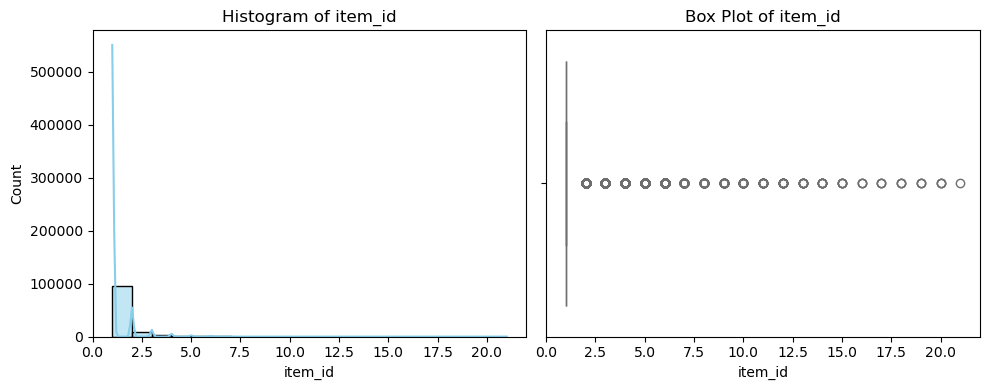

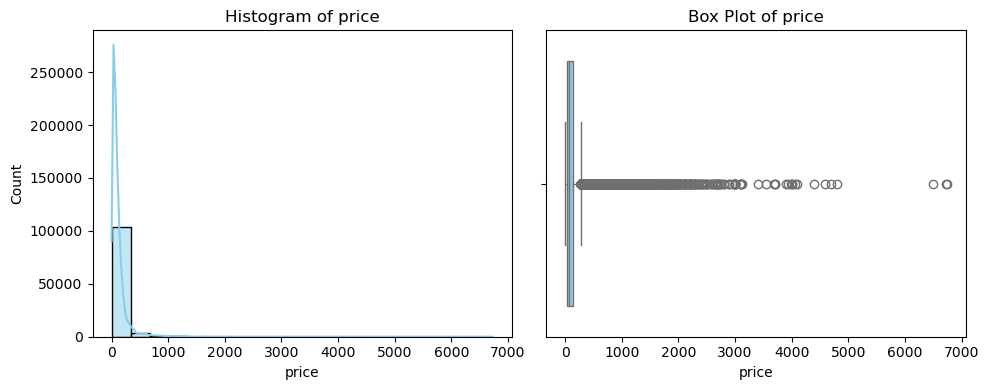

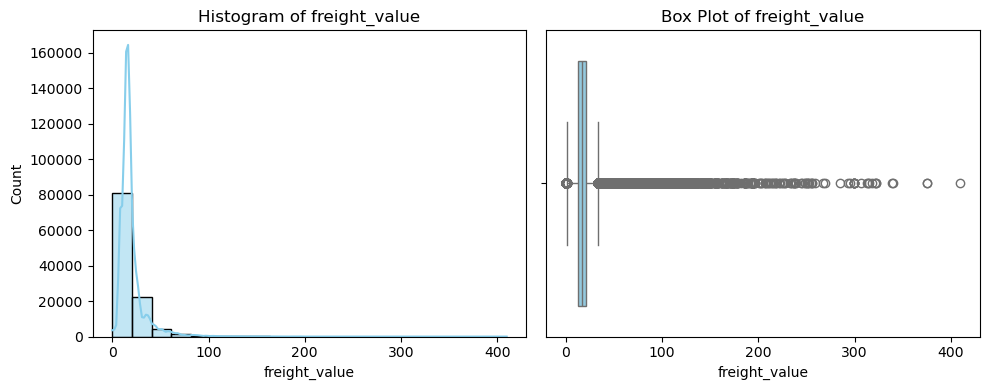

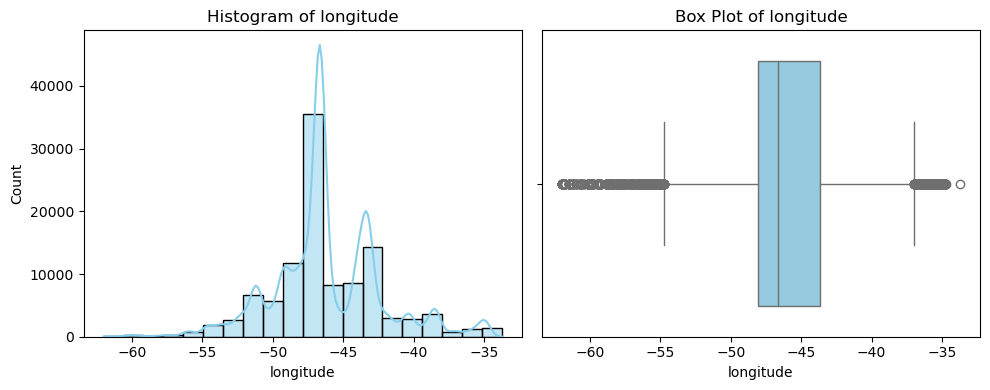

Column      Mean    Median      Mode      Variance  \
0          item_id      1.20      1.00      1.00  5.000000e-01   
1            price    119.79     74.90     59.90  3.310121e+04   
2    freight_value     19.88     16.24     15.10  2.445400e+02   
3  zip_code_prefix  34962.29  24230.00  22790.00  8.915306e+08   
4         latitude    -21.29    -22.93    -23.01  3.035000e+01   
5        longitude    -46.17    -46.63    -43.46  1.532000e+01   
6             hour     14.75     15.00     16.00  2.823000e+01   
7            month      6.03      6.00      8.00  1.044000e+01   

   Standard Deviation    Min Value     Max Value         Range  \
0                0.71     1.000000     21.000000     20.000000   
1              181.94     0.850000   6735.000000   6734.150000   
2               15.64     0.000000    409.680000    409.680000   
3            29858.51  1003.000000  99980.000000  98977.000000   
4                5.51   -33.689824      2.814040     36.503864   
5                3.91   -62.010859    -33.722628     28.288231   
6                5.31     0.000000     23.000000     23.000000   
7                3.23     1.000000     12.000000     11.000000   

   Interquartile Range  Skewness  Kurtosis  
0             0.000000      7.63    104.99  
1            94.090000      8.07    126.27  
2             8.060000      5.70     61.65  
3         47013.000000      0.79     -0.77  
4             3.343859      1.63      3.01  
5             4.436827      0.27      1.11  
6             8.000000     -0.60      0.19  
7             5.000000      0.21     -0.98

In [58]:
univariate_numerical(df_sales)

Check correlation between numerical columns

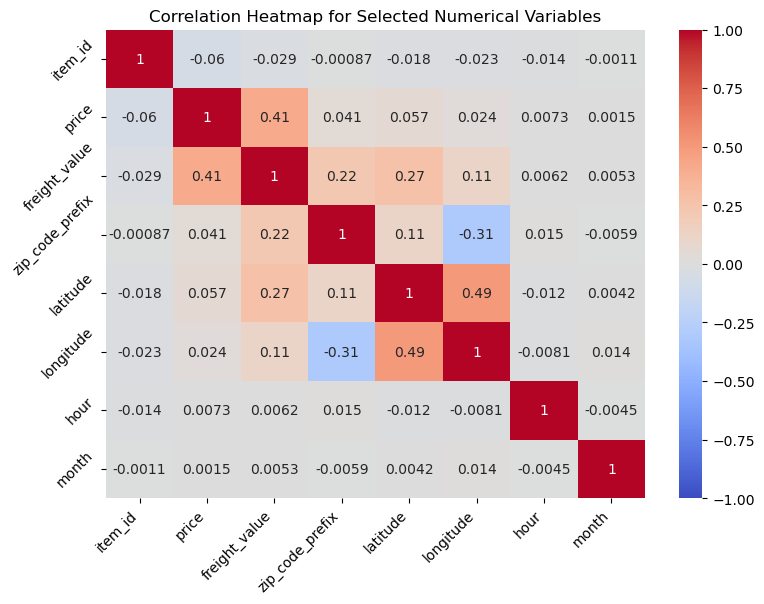

In [59]:
# check correlation with a heatmap

correlation_matrix = df_sales.select_dtypes(include=[np.number]).corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(8, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap="coolwarm", 
            vmin=-1,  # Set the minimum of the colorbar to -1
            vmax=1,   # Set the maximum of the colorbar to 1
            center=0) # Center the colorbar at 0

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels
plt.yticks(rotation=45, ha='right')

# Adjust the bottom and top of the plot to ensure labels are not cut off
plt.tight_layout()

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

### Categorical columns

Categorize total purchase

In [60]:

df_sales['purchase_category'] = pd.cut(df_sales['price'], 
                                bins=3, 
                                labels=['Small', 'Medium', 'Big'])

In [61]:
# To see the bin ranges
bin_ranges = pd.cut(df_sales['price'], bins=3)
bin_ranges

0         (-5.884, 2245.567]
1         (-5.884, 2245.567]
2         (-5.884, 2245.567]
3         (-5.884, 2245.567]
4         (-5.884, 2245.567]
                 ...        
109554    (-5.884, 2245.567]
109555    (-5.884, 2245.567]
109556    (-5.884, 2245.567]
109557    (-5.884, 2245.567]
109558    (-5.884, 2245.567]
Name: price, Length: 109559, dtype: category
Categories (3, interval[float64, right]): [(-5.884, 2245.567] < (2245.567, 4490.283] < (4490.283, 6735.0]]

In [62]:
df_sales.head()

order_id  item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214        1   
1  00018f77f2f0320c557190d7a144bdd3        1   
2  000229ec398224ef6ca0657da4fc703e        1   
3  00024acbcdf0a6daa1e931b038114c75        1   
4  00042b26cf59d7ce69dfabb4e55b4fd9        1   

                         product_id   price  freight_value  \
0  4244733e06e7ecb4970a6e2683c13e61   58.90          13.29   
1  e5f2d52b802189ee658865ca93d83a8f  239.90          19.93   
2  c777355d18b72b67abbeef9df44fd0fd  199.00          17.87   
3  7634da152a4610f1595efa32f14722fc   12.99          12.79   
4  ac6c3623068f30de03045865e4e10089  199.90          18.14   

                        customer_id  purchase_timestamp  zip_code_prefix  \
0  3ce436f183e68e07877b285a838db11a 2017-09-13 08:59:02            28013   
1  f6dd3ec061db4e3987629fe6b26e5cce 2017-04-26 10:53:06            15775   
2  6489ae5e4333f3693df5ad4372dab6d3 2018-01-14 14:33:31            35661   
3  d4eb9395c8c0431ee92fce09860c5a06 2018-08-08 10:00:35            12952   
4  58dbd0b2d70206bf40e62cd34e84d795 2017-02-04 13:57:51            13226   

                    city state_code   latitude  longitude      state_name  \
0  campos dos goytacazes         RJ -21.763186 -41.310265  Rio de Janeiro   
1        santa fe do sul         SP -20.222902 -50.898297       São Paulo   
2          para de minas         MG -19.869745 -44.592968    Minas Gerais   
3                atibaia         SP -23.105968 -46.590277       São Paulo   
4        varzea paulista         SP -23.243402 -46.827614       São Paulo   

             category category_english day_of_week  hour  month  season  \
0          cool_stuff       cool_stuff   Wednesday     8      9  autumn   
1            pet_shop         pet_shop   Wednesday    10      4  spring   
2    moveis_decoracao  furniture_decor      Sunday    14      1  winter   
3          perfumaria        perfumery   Wednesday    10      8  summer   
4  ferramentas_jardim     garden_tools    Saturday    13      2  winter   

  purchase_category  
0             Small  
1             Small  
2             Small  
3             Small  
4             Small

In [63]:
summary_categorical_correlation(df_sales, 'purchase_category')

Column  Chi2 p-value  Cramer V
0          order_id  0.000000e+00  0.997216
1        product_id  0.000000e+00  0.996659
2       customer_id  0.000000e+00  0.997216
3              city  1.000000e+00  0.109967
4        state_code  3.182791e-04  0.020424
5        state_name  3.182791e-04  0.020424
6          category  1.152714e-95  0.061443
7  category_english  1.152714e-95  0.061443
8       day_of_week  4.305695e-01  0.007459
9            season  5.714650e-02  0.007469

In this case, analysis on categorical correlation seems to not giving any significant insight. The only thing that may correlate with the purchase are city and category. 

## Create df_revenue_state to calculate purchase per capita of each state

In [64]:
df_revenue_state = df_sales.groupby(['state_code','state_name']).agg({'item_id':'count','price':'sum'}).sort_values(by='price',ascending=False).reset_index()
df_revenue_state = df_revenue_state.rename(columns={'item_id':'item_count','price':'revenue'})

Merge df_sales_summary and df_states to take population, then, calculate revenue per capita.

In [65]:
df_revenue_state = pd.merge(df_revenue_state, df_states, on=['state_code','state_name'], how='left')

In [66]:
df_revenue_state.head(3)

state_code      state_name  item_count     revenue  population
0         SP       São Paulo       46430  5065422.03    44411238
1         RJ  Rio de Janeiro       14129  1757905.02    16055174
2         MG    Minas Gerais       12906  1551665.42    21279353

Calculate revenue_per_capita in 1000 inhabitants

In [67]:
df_revenue_state['revenue_per_capita'] = (df_revenue_state['revenue']/df_revenue_state['population']*1000).round(2)

In [68]:
df_revenue_state = df_revenue_state.sort_values(by='revenue_per_capita', ascending=False).reset_index()

In [69]:
df_revenue_state.drop(columns='index', inplace=True)

In [70]:
total_revenue_per_capita = df_revenue_state['revenue_per_capita'].sum()
df_revenue_state['percentage_revenue_per_capita'] = (df_revenue_state['revenue_per_capita']/total_revenue_per_capita).round(3)

In [71]:
df_revenue_state

state_code           state_name  item_count     revenue  population  \
0          ES       Espírito Santo        2217   267943.45       17798   
1          SC       Santa Catarina        4097   507012.13       36964   
2          SP            São Paulo       46430  5065422.03    44411238   
3          RJ       Rio de Janeiro       14129  1757905.02    16055174   
4          DF     Distrito Federal        2168   272471.41     2817381   
5          MG         Minas Gerais       12906  1551665.42    21279353   
6          RS    Rio Grande do Sul        6130   728648.93    10882965   
7          PR               Paraná        5632   664467.19    11623091   
8          MT          Mato Grosso        1034   152012.82     3658649   
9          MS   Mato Grosso do Sul         811   115429.97     2880308   
10         GO                Goiás        2268   282293.04     7056495   
11         BA                Bahia        3659   489854.23    14141626   
12         TO            Tocantins         309    48222.52     1692452   
13         PB              Paraíba         584   111267.82     4175326   
14         PE           Pernambuco        1742   251576.23     9645321   
15         PI                Piauí         520    84168.10     3341352   
16         AL              Alagoas         426    78725.73     3127683   
17         CE                Ceará        1420   218794.68     8794957   
18         SE              Sergipe         374    56484.29     2403563   
19         RN  Rio Grande do Norte         519    81881.76     3619619   
20         PA                 Pará        1045   173357.68     8639532   
21         AP                Amapá          80    12989.81      733759   
22         MA             Maranhão         797   116181.59     6776699   
23         RO             Rondônia          88    12080.31     1837905   
24         AM             Amazonas         158    20679.34     3941613   
25         RR              Roraima          16     2230.06      708352   

    revenue_per_capita  percentage_revenue_per_capita  
0             15054.69                          0.507  
1             13716.38                          0.462  
2               114.06                          0.004  
3               109.49                          0.004  
4                96.71                          0.003  
5                72.92                          0.002  
6                66.95                          0.002  
7                57.17                          0.002  
8                41.55                          0.001  
9                40.08                          0.001  
10               40.00                          0.001  
11               34.64                          0.001  
12               28.49                          0.001  
13               26.65                          0.001  
14               26.08                          0.001  
15               25.19                          0.001  
16               25.17                          0.001  
17               24.88                          0.001  
18               23.50                          0.001  
19               22.62                          0.001  
20               20.07                          0.001  
21               17.70                          0.001  
22               17.14                          0.001  
23                6.57                          0.000  
24                5.25                          0.000  
25                3.15                          0.000

Save to a new csv

In [72]:
df_revenue_state.to_csv('../../data/cleaned/df_revenue_state.csv')

## Create df_category to calculate based on category

In [73]:
df_category = df_sales.groupby(['category','category_english']).agg({
                'item_id': 'count',
                'price': 'sum'
                }).rename(columns={
                'item_id': 'item_count',
                'price': 'revenue'
                }).sort_values(by='item_count', ascending=False).reset_index()

In [74]:
df_category

category  \
0                                 cama_mesa_banho   
1                                    beleza_saude   
2                                   esporte_lazer   
3                                moveis_decoracao   
4                          informatica_acessorios   
..                                            ...   
69  portateis_cozinha_e_preparadores_de_alimentos   
70                                     la_cuisine   
71                                       pc_gamer   
72                  fashion_roupa_infanto_juvenil   
73                             seguros_e_servicos   

                        category_english  item_count     revenue  
0                         bed_bath_table       10906  1018901.18  
1                          health_beauty        9400  1221396.42  
2                         sports_leisure        8388   949561.88  
3                        furniture_decor        8118   707978.07  
4                  computers_accessories        7594   881746.13  
..                                   ...         ...         ...  
69  kitchen_portables_and_food_preparers          14     3933.63  
70                            la_cuisine          14     2054.99  
71                              pc_gamer           8     1306.95  
72             fashion_childrens_clothes           7      519.95  
73                 security_and_services           2      283.29  

[74 rows x 4 columns]

In [75]:
total_revenue = df_category['revenue'].sum()
df_category['percentage_revenue'] = (df_category['revenue']/total_revenue).round(3)

In [76]:
df_category.head()

category       category_english  item_count     revenue  \
0         cama_mesa_banho         bed_bath_table       10906  1018901.18   
1            beleza_saude          health_beauty        9400  1221396.42   
2           esporte_lazer         sports_leisure        8388   949561.88   
3        moveis_decoracao        furniture_decor        8118   707978.07   
4  informatica_acessorios  computers_accessories        7594   881746.13   

   percentage_revenue  
0               0.078  
1               0.093  
2               0.072  
3               0.054  
4               0.067

Save it to a new csv file.

In [77]:
df_category.to_csv('../../data/cleaned/df_category.csv')

## Most favorite payment type

In [78]:
payments_type_overview = df_payments.groupby(['type']).agg({
                        'order_id':'count',
                        'value':'sum',
                        }).rename(columns={
                            'order_id':'order_count',
                            'value':'total_value'
                        }).sort_values(by='order_count', ascending=False).reset_index()

In [79]:
payments_type_overview['average_transaction_value'] = round(payments_type_overview['total_value']/payments_type_overview['order_count'],2)

In [80]:
payments_type_overview = payments_type_overview.sort_values(by='average_transaction_value', ascending=False).reset_index()

In [81]:
payments_type_overview.drop(columns={'index'}, inplace=True)
# payments_type_overview.drop(columns={'level_0'},inplace=True)

In [82]:
payments_type_overview

type  order_count  total_value  average_transaction_value
0  credit_card        75030  10530444.57                     140.35
1       boleto        19486   2463294.31                     126.41
2   debit_card         1504    178311.10                     118.56
3      voucher         4848    332310.01                      68.55
4  not_defined            3         0.00                       0.00

In [83]:
# get the most common payment type for each installment
most_common_payment_type = df_payments.groupby(['installments', 'type']).size().reset_index(name='count')
most_common_payment_type = most_common_payment_type.loc[most_common_payment_type.groupby('installments')['count'].idxmax()]


In [84]:
payments_installments_overview = df_payments.groupby(['installments']).agg({
    'order_id': 'count',
    'value': 'sum',
}).rename(columns={
    'order_id': 'order_count',
    'value': 'total_value'
})

In [85]:
# Merge the most common type with the overview
payments_installments_overview = payments_installments_overview.merge(
    most_common_payment_type[['installments', 'type']], 
    on='installments', 
    how='left'
).rename(columns={'type': 'most_common_payment_type'})

In [86]:
payments_installments_overview = payments_installments_overview.sort_values(
    by='order_count', 
    ascending=False
).reset_index()


In [87]:
payments_installments_overview['usage_rate'] = round(payments_installments_overview['total_value']/payments_installments_overview['order_count'],2)

In [88]:
total_order_count = payments_installments_overview['order_count'].sum()
payments_installments_overview['percentage_installments_usage'] = round(payments_installments_overview['order_count']/total_order_count,3)

In [89]:
payments_installments_overview = payments_installments_overview[
    ['installments', 'most_common_payment_type', 'order_count', 'total_value', 'usage_rate', 'percentage_installments_usage']].sort_values(by='usage_rate', ascending=False).reset_index()

In [90]:
payments_installments_overview.drop(columns='index', inplace=True)

In [91]:
payments_installments_overview

installments most_common_payment_type  order_count  total_value  \
0             10              credit_card         4657   1291714.32   
1              8              credit_card         4026    999921.52   
2              6              credit_card         3829    709907.14   
3              9              credit_card          629    114899.06   
4              7              credit_card         1602    272454.50   
5              5              credit_card         5159    853558.19   
6              4              credit_card         7017   1062506.42   
7              3              credit_card        10403   1423309.63   
8              2              credit_card        12365   1520613.26   
9              1              credit_card        51182   5255287.32   
10             0              credit_card            2       188.63   

    usage_rate  percentage_installments_usage  
0       277.37                          0.046  
1       248.37                          0.040  
2       185.40                          0.038  
3       182.67                          0.006  
4       170.07                          0.016  
5       165.45                          0.051  
6       151.42                          0.070  
7       136.82                          0.103  
8       122.98                          0.123  
9       102.68                          0.507  
10       94.32                          0.000

## Most favorite day of week to order

In [92]:
df_sales['day_of_week'].value_counts()

day_of_week
Monday       17882
Tuesday      17753
Wednesday    17113
Thursday     16339
Friday       15605
Sunday       13053
Saturday     11814
Name: count, dtype: int64

## Most favorite time of day to order

In [93]:
df_sales['hour'].value_counts()

hour
16    7438
14    7379
11    7230
15    7180
13    7166
10    6842
17    6797
21    6732
20    6702
12    6604
19    6538
22    6365
18    6352
9     5317
23    4523
8     3324
0     2637
7     1339
1     1248
2      572
6      527
3      295
4      239
5      213
Name: count, dtype: int64

In [94]:
# Combine day of week and time period
hour_str = df_sales['hour'].astype(str)
df_sales['day_and_time'] = df_sales['day_of_week'] + ' ' + hour_str

# Find the most favorite day and time combination
favorite_day_and_time = df_sales['day_and_time'].value_counts().sort_values(ascending=False)

print("Top 5 favorite day and time combinations for placing orders:")
print(favorite_day_and_time.head())

Top 5 favorite day and time combinations for placing orders:
day_and_time
Tuesday 14    1279
Monday 14     1251
Monday 16     1227
Monday 15     1225
Tuesday 16    1223
Name: count, dtype: int64


Seasonal analysis

In [95]:
df_sales['season'].value_counts()


season
summer    33612
spring    32930
winter    24386
autumn    18631
Name: count, dtype: int64

## Average rating

In [96]:
average_rating = df_reviews['score'].mean()

In [97]:
average_rating

4.08642062404257

In [98]:
df_reviews['score'].describe()

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: score, dtype: float64

## Accuracy of estimated delivery date

Prepare the dataset for analysis

In [99]:
df_orders.dtypes

order_id                        object
customer_id                     object
status                          object
purchase_timestamp              object
approved_timestamp              object
delivered_carrier_timestamp     object
delivered_customer_timestamp    object
estimated_delivery_timestamp    object
dtype: object

In [100]:
df_logistics = df_orders.copy()

In [101]:
datetime_columns = ['purchase_timestamp', 'approved_timestamp','delivered_carrier_timestamp','delivered_customer_timestamp','estimated_delivery_timestamp']

df_logistics[datetime_columns] = df_logistics[datetime_columns].apply(pd.to_datetime)

In [102]:
df_logistics.dtypes

order_id                                object
customer_id                             object
status                                  object
purchase_timestamp              datetime64[ns]
approved_timestamp              datetime64[ns]
delivered_carrier_timestamp     datetime64[ns]
delivered_customer_timestamp    datetime64[ns]
estimated_delivery_timestamp    datetime64[ns]
dtype: object

In [103]:
df_logistics.isna().sum()

order_id                           0
customer_id                        0
status                             0
purchase_timestamp                 0
approved_timestamp               160
delivered_carrier_timestamp     1783
delivered_customer_timestamp    2965
estimated_delivery_timestamp       0
dtype: int64

### On-time vs late delivery

In [104]:
delivered_orders = df_logistics[df_logistics['status'] == 'delivered']

In [105]:
delivered_orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

          status  purchase_timestamp  approved_timestamp  \
0      delivered 2017-10-02 10:56:33 2017-10-02 11:07:15   
1      delivered 2018-07-24 20:41:37 2018-07-26 03:24:27   
2      delivered 2018-08-08 08:38:49 2018-08-08 08:55:23   
3      delivered 2017-11-18 19:28:06 2017-11-18 19:45:59   
4      delivered 2018-02-13 21:18:39 2018-02-13 22:20:29   
...          ...                 ...                 ...   
99436  delivered 2017-03-09 09:54:05 2017-03-09 09:54:05   
99437  delivered 2018-02-06 12:58:58 2018-02-06 13:10:37   
99438  delivered 2017-08-27 14:46:43 2017-08-27 15:04:16   
99439  delivered 2018-01-08 21:28:27 2018-01-08 21:36:21   
99440  delivered 2018-03-08 20:57:30 2018-03-09 11:20:28   

      delivered_carrier_timestamp delivered_customer_timestamp  \
0             2017-10-04 19:55:00          2017-10-10 21:25:13   
1             2018-07-26 14:31:00          2018-08-07 15:27:45   
2             2018-08-08 13:50:00          2018-08-17 18:06:29   
3             2017-11-22 13:39:59          2017-12-02 00:28:42   
4             2018-02-14 19:46:34          2018-02-16 18:17:02   
...                           ...                          ...   
99436         2017-03-10 11:18:03          2017-03-17 15:08:01   
99437         2018-02-07 23:22:42          2018-02-28 17:37:56   
99438         2017-08-28 20:52:26          2017-09-21 11:24:17   
99439         2018-01-12 15:35:03          2018-01-25 23:32:54   
99440         2018-03-09 22:11:59          2018-03-16 13:08:30   

      estimated_delivery_timestamp  
0                       2017-10-18  
1                       2018-08-13  
2                       2018-09-04  
3                       2017-12-15  
4                       2018-02-26  
...                            ...  
99436                   2017-03-28  
99437                   2018-03-02  
99438                   2017-09-27  
99439                   2018-02-15  
99440                   2018-04-03  

[96478 rows x 8 columns]

In [106]:
df_logistics['delivery_status'] = np.where(
    df_logistics['status'] != 'delivered', 
    'not applicable', 
    np.where(
    (df_logistics['status'] == 'delivered') &
    (df_logistics['delivered_customer_timestamp'] <= df_logistics['estimated_delivery_timestamp']),
    'on-time',
    'late'
))

In [107]:
df_logistics['delivery_status'].value_counts()

delivery_status
on-time           88644
late               7834
not applicable     2963
Name: count, dtype: int64

Accuracy of estimated delivery date

In [108]:
on_time_count = (df_logistics['delivery_status'] == 'on-time').sum()
total_count = ((df_logistics['delivery_status'] == 'on-time') | (df_logistics['delivery_status'] == 'late')).sum()
accuracy_eta = round(on_time_count / total_count, 2)
accuracy_eta

0.92

### Check correlation of on-time/late delivery with distance between customer and seller <br> 
- merge df_logistic with df_customers on customer_id. Take the latitude and longitude information from geolocation.
- merge df_logistic with df_items on order_id
- merge df_logistic with df_sellers on seller_id. Take the latitude and longitude information from geolocation.

Merge df_logistic with customers

In [109]:
df_logistics = pd.merge(df_logistics, df_customers, on='customer_id', how='left')

In [110]:
df_logistics

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

          status  purchase_timestamp  approved_timestamp  \
0      delivered 2017-10-02 10:56:33 2017-10-02 11:07:15   
1      delivered 2018-07-24 20:41:37 2018-07-26 03:24:27   
2      delivered 2018-08-08 08:38:49 2018-08-08 08:55:23   
3      delivered 2017-11-18 19:28:06 2017-11-18 19:45:59   
4      delivered 2018-02-13 21:18:39 2018-02-13 22:20:29   
...          ...                 ...                 ...   
99436  delivered 2017-03-09 09:54:05 2017-03-09 09:54:05   
99437  delivered 2018-02-06 12:58:58 2018-02-06 13:10:37   
99438  delivered 2017-08-27 14:46:43 2017-08-27 15:04:16   
99439  delivered 2018-01-08 21:28:27 2018-01-08 21:36:21   
99440  delivered 2018-03-08 20:57:30 2018-03-09 11:20:28   

      delivered_carrier_timestamp delivered_customer_timestamp  \
0             2017-10-04 19:55:00          2017-10-10 21:25:13   
1             2018-07-26 14:31:00          2018-08-07 15:27:45   
2             2018-08-08 13:50:00          2018-08-17 18:06:29   
3             2017-11-22 13:39:59          2017-12-02 00:28:42   
4             2018-02-14 19:46:34          2018-02-16 18:17:02   
...                           ...                          ...   
99436         2017-03-10 11:18:03          2017-03-17 15:08:01   
99437         2018-02-07 23:22:42          2018-02-28 17:37:56   
99438         2017-08-28 20:52:26          2017-09-21 11:24:17   
99439         2018-01-12 15:35:03          2018-01-25 23:32:54   
99440         2018-03-09 22:11:59          2018-03-16 13:08:30   

      estimated_delivery_timestamp delivery_status  \
0                       2017-10-18         on-time   
1                       2018-08-13         on-time   
2                       2018-09-04         on-time   
3                       2017-12-15         on-time   
4                       2018-02-26         on-time   
...                            ...             ...   
99436                   2017-03-28         on-time   
99437                   2018-03-02         on-time   
99438                   2017-09-27         on-time   
99439                   2018-02-15         on-time   
99440                   2018-04-03         on-time   

                              unique_id  zip_code_prefix  \
0      7c396fd4830fd04220f754e42b4e5bff             3149   
1      af07308b275d755c9edb36a90c618231            47813   
2      3a653a41f6f9fc3d2a113cf8398680e8            75265   
3      7c142cf63193a1473d2e66489a9ae977            59296   
4      72632f0f9dd73dfee390c9b22eb56dd6             9195   
...                                 ...              ...   
99436  6359f309b166b0196dbf7ad2ac62bb5a            12209   
99437  da62f9e57a76d978d02ab5362c509660            11722   
99438  737520a9aad80b3fbbdad19b66b37b30            45920   
99439  5097a5312c8b157bb7be58ae360ef43c            28685   
99440  60350aa974b26ff12caad89e55993bd6            83750   

                          city state_code                      unique_index  \
0                    sao paulo         SP                 3149_sao paulo_SP   
1                    barreiras         BA                47813_b

In [111]:
df_logistics = pd.merge(df_logistics, df_geolocation, on='unique_index', how='left')

In [112]:
df_logistics

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

          status  purchase_timestamp  approved_timestamp  \
0      delivered 2017-10-02 10:56:33 2017-10-02 11:07:15   
1      delivered 2018-07-24 20:41:37 2018-07-26 03:24:27   
2      delivered 2018-08-08 08:38:49 2018-08-08 08:55:23   
3      delivered 2017-11-18 19:28:06 2017-11-18 19:45:59   
4      delivered 2018-02-13 21:18:39 2018-02-13 22:20:29   
...          ...                 ...                 ...   
99436  delivered 2017-03-09 09:54:05 2017-03-09 09:54:05   
99437  delivered 2018-02-06 12:58:58 2018-02-06 13:10:37   
99438  delivered 2017-08-27 14:46:43 2017-08-27 15:04:16   
99439  delivered 2018-01-08 21:28:27 2018-01-08 21:36:21   
99440  delivered 2018-03-08 20:57:30 2018-03-09 11:20:28   

      delivered_carrier_timestamp delivered_customer_timestamp  \
0             2017-10-04 19:55:00          2017-10-10 21:25:13   
1             2018-07-26 14:31:00          2018-08-07 15:27:45   
2             2018-08-08 13:50:00          2018-08-17 18:06:29   
3             2017-11-22 13:39:59          2017-12-02 00:28:42   
4             2018-02-14 19:46:34          2018-02-16 18:17:02   
...                           ...                          ...   
99436         2017-03-10 11:18:03          2017-03-17 15:08:01   
99437         2018-02-07 23:22:42          2018-02-28 17:37:56   
99438         2017-08-28 20:52:26          2017-09-21 11:24:17   
99439         2018-01-12 15:35:03          2018-01-25 23:32:54   
99440         2018-03-09 22:11:59          2018-03-16 13:08:30   

      estimated_delivery_timestamp delivery_status  \
0                       2017-10-18         on-time   
1                       2018-08-13         on-time   
2                       2018-09-04         on-time   
3                       2017-12-15         on-time   
4                       2018-02-26         on-time   
...                            ...             ...   
99436                   2017-03-28         on-time   
99437                   2018-03-02         on-time   
99438                   2017-09-27         on-time   
99439                   2018-02-15         on-time   
99440                   2018-04-03         on-time   

                              unique_id  zip_code_prefix_x  \
0      7c396fd4830fd04220f754e42b4e5bff               3149   
1      af07308b275d755c9edb36a90c618231              47813   
2      3a653a41f6f9fc3d2a113cf8398680e8              75265   
3      7c142cf63193a1473d2e66489a9ae977              59296   
4      72632f0f9dd73dfee390c9b22eb56dd6               9195   
...                                 ...                ...   
99436  6359f309b166b0196dbf7ad2ac62bb5a              12209   
99437  da62f9e57a76d978d02ab5362c509660              11722   
99438  737520a9aad80b3fbbdad19b66b37b30              45920   
99439  5097a5312c8b157bb7be58ae360ef43c              28685   
99440  60350aa974b26ff12caad89e55993bd6              83750   

                        city_x state_code_x                      unique_index  \
0                    sao paulo           SP                 3149_sao paulo_SP   
1                    barreiras      

In [113]:
unnecessary_logistics_columns = ['unique_id','zip_code_prefix_x','unique_index','customer_unique_id','zip_code_prefix_y','city_y','state_code_y']
df_logistics = df_logistics.drop(columns=unnecessary_logistics_columns)

In [114]:
df_logistics = df_logistics.rename(columns={
                    'city_x':'city_customer',
                    'state_code_x':'state_customer',
                    'latitude':'latitude_customer',
                    'longitude':'longitude_customer',
                })

In [115]:
df_logistics = df_logistics.dropna(subset=['latitude_customer', 'longitude_customer'])

In [116]:
df_logistics.isna().sum()

order_id                           0
customer_id                        0
status                             0
purchase_timestamp                 0
approved_timestamp               158
delivered_carrier_timestamp     1770
delivered_customer_timestamp    2941
estimated_delivery_timestamp       0
delivery_status                    0
city_customer                      0
state_customer                     0
latitude_customer                  0
longitude_customer                 0
dtype: int64

In [117]:
df_logistics

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

          status  purchase_timestamp  approved_timestamp  \
0      delivered 2017-10-02 10:56:33 2017-10-02 11:07:15   
1      delivered 2018-07-24 20:41:37 2018-07-26 03:24:27   
2      delivered 2018-08-08 08:38:49 2018-08-08 08:55:23   
3      delivered 2017-11-18 19:28:06 2017-11-18 19:45:59   
4      delivered 2018-02-13 21:18:39 2018-02-13 22:20:29   
...          ...                 ...                 ...   
99436  delivered 2017-03-09 09:54:05 2017-03-09 09:54:05   
99437  delivered 2018-02-06 12:58:58 2018-02-06 13:10:37   
99438  delivered 2017-08-27 14:46:43 2017-08-27 15:04:16   
99439  delivered 2018-01-08 21:28:27 2018-01-08 21:36:21   
99440  delivered 2018-03-08 20:57:30 2018-03-09 11:20:28   

      delivered_carrier_timestamp delivered_customer_timestamp  \
0             2017-10-04 19:55:00          2017-10-10 21:25:13   
1             2018-07-26 14:31:00          2018-08-07 15:27:45   
2             2018-08-08 13:50:00          2018-08-17 18:06:29   
3             2017-11-22 13:39:59          2017-12-02 00:28:42   
4             2018-02-14 19:46:34          2018-02-16 18:17:02   
...                           ...                          ...   
99436         2017-03-10 11:18:03          2017-03-17 15:08:01   
99437         2018-02-07 23:22:42          2018-02-28 17:37:56   
99438         2017-08-28 20:52:26          2017-09-21 11:24:17   
99439         2018-01-12 15:35:03          2018-01-25 23:32:54   
99440         2018-03-09 22:11:59          2018-03-16 13:08:30   

      estimated_delivery_timestamp delivery_status            city_customer  \
0                       2017-10-18         on-time                sao paulo   
1                       2018-08-13         on-time                barreiras   
2                       2018-09-04         on-time               vianopolis   
3                       2017-12-15         on-time  sao goncalo do amarante   
4                       2018-02-26         on-time              santo andre   
...                            ...             ...                      ...   
99436                   2017-03-28         on-time      sao jose dos campos   
99437                   2018-03-02         on-time             praia grande   
99438                   2017-09-27         on-time              nova vicosa   
99439                   2018-02-15         on-time                  japuiba   
99440                   2018-04-03         on-time                     lapa   

      state_customer  latitude_customer  longitude_customer  
0                 SP         -23.577622          -46.587055  
1                 BA         -12.186877          -44.540232  
2                 GO         -16.745100          -48.514790  
3                 RN          -5.774002          -35.270976  
4                 SP         -23.676304          -46.514591  
...              ...                ...                 ...  
99436             SP         -23.177881          -45.881873  
99437             SP         -24.001334          -46.450022  
99438             BA         -17.898045          -39.373106  
99439             RJ   

Merge df_logistic with df_items

In [118]:
df_logistics = pd.merge(df_logistics, df_items, on='order_id', how='left')

In [119]:
df_logistics.columns

Index(['order_id', 'customer_id', 'status', 'purchase_timestamp',
       'approved_timestamp', 'delivered_carrier_timestamp',
       'delivered_customer_timestamp', 'estimated_delivery_timestamp',
       'delivery_status', 'city_customer', 'state_customer',
       'latitude_customer', 'longitude_customer', 'item_id', 'product_id',
       'seller_id', 'shipping_limit_timestamp', 'price', 'freight_value'],
      dtype='object')

In [120]:
df_logistics['shipping_limit_timestamp'] = pd.to_datetime(df_logistics['shipping_limit_timestamp'])

In [121]:
unnecessary_logistics_columns = ['item_id','product_id','price'] 
df_logistics = df_logistics.drop(columns=unnecessary_logistics_columns)

In [122]:
df_logistics.isna().sum()

order_id                           0
customer_id                        0
status                             0
purchase_timestamp                 0
approved_timestamp               159
delivered_carrier_timestamp     1950
delivered_customer_timestamp    3200
estimated_delivery_timestamp       0
delivery_status                    0
city_customer                      0
state_customer                     0
latitude_customer                  0
longitude_customer                 0
seller_id                        767
shipping_limit_timestamp         767
freight_value                    767
dtype: int64

In [123]:
df_items['seller_id'].nunique()

3095

In [124]:
missing_values = df_logistics[df_logistics['seller_id'].isnull()]
missing_values

order_id                       customer_id  \
304     8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
668     c272bcd21c287498b4883c7512019702  9582c5bbecc65eb568e2c1d839b5cba1   
786     37553832a3a89c9b2db59701c357ca67  7607cd563696c27ede287e515812d528   
844     d57e15fb07fd180f06ab3926b39edcd2  470b93b3f1cde85550fc74cd3a476c78   
1282    00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
...                                  ...                               ...   
112537  aaab15da689073f8f9aa978a390a69d1  df20748206e4b865b2f14a5eabbfcf34   
112569  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
112657  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
112658  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
112730  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

             status  purchase_timestamp  approved_timestamp  \
304     unavailable 2017-11-16 15:09:28 2017-11-16 15:26:57   
668     unavailable 2018-01-31 11:31:37 2018-01-31 14:23:50   
786     unavailable 2017-08-14 17:38:02 2017-08-17 00:15:18   
844     unavailable 2018-01-08 19:39:03 2018-01-09 07:26:08   
1282       canceled 2018-08-28 15:26:39                 NaT   
...             ...                 ...                 ...   
112537  unavailable 2018-01-16 14:27:59 2018-01-17 03:37:34   
112569     canceled 2018-08-31 16:13:44                 NaT   
112657     canceled 2018-09-06 18:45:47                 NaT   
112658  unavailable 2017-08-23 16:28:04 2017-08-28 15:44:47   
112730  unavailable 2017-10-10 10:50:03 2017-10-14 18:35:57   

       delivered_carrier_timestamp delivered_customer_timestamp  \
304                            NaT                          NaT   
668                            NaT                          NaT   
786                            NaT                          NaT   
844                            NaT                          NaT   
1282                           NaT                          NaT   
...                            ...                          ...   
112537                         NaT                          NaT   
112569                         NaT                          NaT   
112657                         NaT                          NaT   
112658                         NaT                          NaT   
112730                         NaT                          NaT   

       estimated_delivery_timestamp delivery_status     city_customer  \
304                      2017-12-05  not applicable  sao bento do sul   
668                      2018-02-16  not applicable      praia grande   
786                      2017-09-05  not applicable         sao paulo   
844                      2018-02-06  not applicable      paulo afonso   
1282                     2018-09-12  not applicable         sao paulo   
...                             ...             ...               ...   
112537                   2018-02-06  not applicable         guarulhos   
112569                   2018-10-01  not applicable            santos   
112657                   2018-09-27  not applicable         sao paulo   
112658                   2017-09-15  not applicable    rio de janeiro   
112730                   2017-10-23  not applicable          sorocaba   

       state_customer  latitude_customer  longitude_customer seller_id  \
304                SC         -26.232401          -49.411354       NaN   
668                SP         -24.008185          -46.419212       NaN   
786                SP         -23.450910          -46.590261       NaN   
844                BA          -9.396324          -38.218772       NaN   
1282               SP         -23.531143          -46.656816       NaN   
...               ...                ...                 ...       ...   
112537             SP         -23.482718          -46.542963       NaN   
112569             SP         -23.954263          -46.337663    

In [125]:
df_orders_raw = pd.read_csv('../../data/raw/orders.csv')
df_orders_raw[df_orders_raw['order_id'] == '8e24261a7e58791d10cb1bf9da94df5c']

order_id                       customer_id  \
266  8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   

    order_status order_purchase_timestamp    order_approved_at  \
266  unavailable      2017-11-16 15:09:28  2017-11-16 15:26:57   

    order_delivered_carrier_date order_delivered_customer_date  \
266                          NaN                           NaN   

    order_estimated_delivery_date  
266           2017-12-05 00:00:00

In [126]:
df_items_raw = pd.read_csv('../../data/raw/items.csv')
df_items_raw[df_items_raw['order_id'] == '8e24261a7e58791d10cb1bf9da94df5c']

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []

In [127]:
df_logistics = df_logistics.dropna(subset=['seller_id','shipping_limit_timestamp','freight_value'])

In [128]:
df_logistics.isna().sum()

order_id                           0
customer_id                        0
status                             0
purchase_timestamp                 0
approved_timestamp                15
delivered_carrier_timestamp     1184
delivered_customer_timestamp    2433
estimated_delivery_timestamp       0
delivery_status                    0
city_customer                      0
state_customer                     0
latitude_customer                  0
longitude_customer                 0
seller_id                          0
shipping_limit_timestamp           0
freight_value                      0
dtype: int64

In [129]:
df_logistics.dtypes

order_id                                object
customer_id                             object
status                                  object
purchase_timestamp              datetime64[ns]
approved_timestamp              datetime64[ns]
delivered_carrier_timestamp     datetime64[ns]
delivered_customer_timestamp    datetime64[ns]
estimated_delivery_timestamp    datetime64[ns]
delivery_status                         object
city_customer                           object
state_customer                          object
latitude_customer                      float64
longitude_customer                     float64
seller_id                               object
shipping_limit_timestamp        datetime64[ns]
freight_value                          float64
dtype: object

Merge df_logistic with df_sellers

In [130]:
df_logistics = pd.merge(df_logistics, df_sellers, on='seller_id', how='left')

In [131]:
df_logistics

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
111986  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
111987  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
111988  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
111989  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
111990  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

           status  purchase_timestamp  approved_timestamp  \
0       delivered 2017-10-02 10:56:33 2017-10-02 11:07:15   
1       delivered 2018-07-24 20:41:37 2018-07-26 03:24:27   
2       delivered 2018-08-08 08:38:49 2018-08-08 08:55:23   
3       delivered 2017-11-18 19:28:06 2017-11-18 19:45:59   
4       delivered 2018-02-13 21:18:39 2018-02-13 22:20:29   
...           ...                 ...                 ...   
111986  delivered 2018-02-06 12:58:58 2018-02-06 13:10:37   
111987  delivered 2017-08-27 14:46:43 2017-08-27 15:04:16   
111988  delivered 2018-01-08 21:28:27 2018-01-08 21:36:21   
111989  delivered 2018-01-08 21:28:27 2018-01-08 21:36:21   
111990  delivered 2018-03-08 20:57:30 2018-03-09 11:20:28   

       delivered_carrier_timestamp delivered_customer_timestamp  \
0              2017-10-04 19:55:00          2017-10-10 21:25:13   
1              2018-07-26 14:31:00          2018-08-07 15:27:45   
2              2018-08-08 13:50:00          2018-08-17 18:06:29   
3              2017-11-22 13:39:59          2017-12-02 00:28:42   
4              2018-02-14 19:46:34          2018-02-16 18:17:02   
...                            ...                          ...   
111986         2018-02-07 23:22:42          2018-02-28 17:37:56   
111987         2017-08-28 20:52:26          2017-09-21 11:24:17   
111988         2018-01-12 15:35:03          2018-01-25 23:32:54   
111989         2018-01-12 15:35:03          2018-01-25 23:32:54   
111990         2018-03-09 22:11:59          2018-03-16 13:08:30   

       estimated_delivery_timestamp delivery_status            city_customer  \
0                        2017-10-18         on-time                sao paulo   
1                        2018-08-13         on-time                barreiras   
2                        2018-09-04         on-time               vianopolis   
3                        2017-12-15         on-time  sao goncalo do amarante   
4                        2018-02-26         on-time              santo andre   
...                             ...             ...                      ...   
111986                   2018-03-02         on-time             praia grande   
111987                   2017-09-27         on-time              nova vicosa   
111988                   2018-02-15         on-time                  japuiba   
111989                   2018-02-15         on-time                  japuiba   
111990                   2018-04-03         on-time                     lapa   

       state_customer  latitude_customer  longitude_customer  \
0                  SP         -23.577622          -46.587055   
1                  BA         -12.186877          -44.540232   
2                  GO         -16.745100          -48.514790   
3                  RN          -5.774002          -35.270976   
4                  SP         -23.676304          -46.514591   
...               ...                ...                 ...   
111986             SP         -24.001334          -46.450022   
111987             BA         -17.898045          -39.373106   
111988             R

In [132]:
df_logistics.isna().sum()

order_id                           0
customer_id                        0
status                             0
purchase_timestamp                 0
approved_timestamp                15
delivered_carrier_timestamp     1184
delivered_customer_timestamp    2433
estimated_delivery_timestamp       0
delivery_status                    0
city_customer                      0
state_customer                     0
latitude_customer                  0
longitude_customer                 0
seller_id                          0
shipping_limit_timestamp           0
freight_value                      0
zip_code_prefix                    0
city                               0
state_code                         0
unique_index                       0
dtype: int64

In [133]:
df_logistics = pd.merge(df_logistics, df_geolocation, on='unique_index', how='left')

In [134]:
df_logistics

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
111986  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
111987  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
111988  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
111989  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
111990  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

           status  purchase_timestamp  approved_timestamp  \
0       delivered 2017-10-02 10:56:33 2017-10-02 11:07:15   
1       delivered 2018-07-24 20:41:37 2018-07-26 03:24:27   
2       delivered 2018-08-08 08:38:49 2018-08-08 08:55:23   
3       delivered 2017-11-18 19:28:06 2017-11-18 19:45:59   
4       delivered 2018-02-13 21:18:39 2018-02-13 22:20:29   
...           ...                 ...                 ...   
111986  delivered 2018-02-06 12:58:58 2018-02-06 13:10:37   
111987  delivered 2017-08-27 14:46:43 2017-08-27 15:04:16   
111988  delivered 2018-01-08 21:28:27 2018-01-08 21:36:21   
111989  delivered 2018-01-08 21:28:27 2018-01-08 21:36:21   
111990  delivered 2018-03-08 20:57:30 2018-03-09 11:20:28   

       delivered_carrier_timestamp delivered_customer_timestamp  \
0              2017-10-04 19:55:00          2017-10-10 21:25:13   
1              2018-07-26 14:31:00          2018-08-07 15:27:45   
2              2018-08-08 13:50:00          2018-08-17 18:06:29   
3              2017-11-22 13:39:59          2017-12-02 00:28:42   
4              2018-02-14 19:46:34          2018-02-16 18:17:02   
...                            ...                          ...   
111986         2018-02-07 23:22:42          2018-02-28 17:37:56   
111987         2017-08-28 20:52:26          2017-09-21 11:24:17   
111988         2018-01-12 15:35:03          2018-01-25 23:32:54   
111989         2018-01-12 15:35:03          2018-01-25 23:32:54   
111990         2018-03-09 22:11:59          2018-03-16 13:08:30   

       estimated_delivery_timestamp delivery_status            city_customer  \
0                        2017-10-18         on-time                sao paulo   
1                        2018-08-13         on-time                barreiras   
2                        2018-09-04         on-time               vianopolis   
3                        2017-12-15         on-time  sao goncalo do amarante   
4                        2018-02-26         on-time              santo andre   
...                             ...             ...                      ...   
111986                   2018-03-02         on-time             praia grande   
111987                   2017-09-27         on-time              nova vicosa   
111988                   2018-02-15         on-time                  japuiba   
111989                   2018-02-15         on-time                  japuiba   
111990                   2018-04-03         on-time                     lapa   

        ... freight_value  zip_code_prefix_x           city_x state_code_x  \
0       ...          8.72               9350             maua           SP   
1       ...         22.76              31570   belo horizonte           SP   
2       ...         19.22              14840          guariba           SP   
3       ...         27.20              31842   belo horizonte           MG   
4       ...          8.72               8752  mogi das cruzes           SP   
...     ...           ...                ...              ...          ...   
111986  ...         20.10              17602      

In [135]:
df_logistics.isna().sum()

order_id                           0
customer_id                        0
status                             0
purchase_timestamp                 0
approved_timestamp                15
delivered_carrier_timestamp     1184
delivered_customer_timestamp    2433
estimated_delivery_timestamp       0
delivery_status                    0
city_customer                      0
state_customer                     0
latitude_customer                  0
longitude_customer                 0
seller_id                          0
shipping_limit_timestamp           0
freight_value                      0
zip_code_prefix_x                  0
city_x                             0
state_code_x                       0
unique_index                       0
zip_code_prefix_y               2466
city_y                          2466
state_code_y                    2466
latitude                        2466
longitude                       2466
dtype: int64

In [136]:
missing_values = df_logistics[df_logistics['zip_code_prefix_y'].isnull()]
missing_values

order_id                       customer_id  \
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
15      432aaf21d85167c2c86ec9448c4e42cc  3df704f53d3f1d4818840b34ec672a9f   
49      5820a1100976432c7968a52da59e9364  2b56e94c2f66f2d97cfa63356f69cee8   
279     def622b4b003c4749c889dd9a0b43eca  e28087daa16ea2d4ef377fd789af20b4   
348     d74d2985a4c187334dc59722076a2e5f  5f49d01f1579c231565f6629a6cb3c0f   
...                                  ...                               ...   
111795  46b4a41ba02248ac63e0d85649595f7e  7289387e125fb55957fab19cf6049956   
111800  762264d81c3f54fa5e5a4e02b84eb85c  75119e7aa32e3e42fbd019b09af7e7e1   
111812  67ce27ca25eb14dc27770b988fe47ebd  88c0a2355bbcfb7b05a61a790ab24f4d   
111883  a281208da836ef2c9d23718a7a855a92  723b22c2412b366d01cdc84ee4295fc2   
111973  d692ef54145c9cb3322ec2e5508aa3f4  82ddfcf9438b0cd1117b55ac33184df8   

           status  purchase_timestamp  approved_timestamp  \
1       delivered 2018-07-24 20:41:37 2018-07-26 03:24:27   
15      delivered 2018-03-01 14:14:28 2018-03-01 15:10:47   
49      delivered 2018-07-29 11:24:17 2018-07-29 11:44:19   
279     delivered 2018-01-25 23:13:41 2018-01-27 02:45:33   
348     delivered 2018-08-09 20:36:13 2018-08-09 20:50:14   
...           ...                 ...                 ...   
111795  delivered 2017-05-16 23:24:13 2017-05-16 23:35:21   
111800  delivered 2017-10-21 22:42:10 2017-10-21 22:56:21   
111812  delivered 2018-04-29 18:37:30 2018-04-29 18:54:22   
111883  delivered 2018-08-22 14:53:45 2018-08-22 15:05:17   
111973  delivered 2018-03-21 19:47:18 2018-03-21 20:05:26   

       delivered_carrier_timestamp delivered_customer_timestamp  \
1              2018-07-26 14:31:00          2018-08-07 15:27:45   
15             2018-03-02 21:09:20          2018-03-12 23:36:26   
49             2018-07-30 13:47:00          2018-08-02 22:09:11   
279            2018-01-29 20:37:16          2018-02-08 18:38:55   
348            2018-08-15 06:23:00          2018-08-25 00:46:26   
...                            ...                          ...   
111795         2017-05-17 09:17:58          2017-05-24 12:59:35   
111800         2017-10-24 01:22:55          2017-11-06 21:36:29   
111812         2018-05-02 15:43:00          2018-05-09 12:56:59   
111883         2018-08-23 11:09:00          2018-08-28 15:52:33   
111973         2018-03-22 21:11:58          2018-04-11 00:48:31   

       estimated_delivery_timestamp delivery_status    city_customer  ...  \
1                        2018-08-13         on-time        barreiras  ...   
15                       2018-03-21         on-time        sao paulo  ...   
49                       2018-08-13         on-time  flores da cunha  ...   
279                      2018-02-21         on-time          jundiai  ...   
348                      2018-09-05         on-time            belem  ...   
...                             ...             ...              ...  ...   
111795                   2017-06-08         on-time       uberlandia  ...   
111800                   2017-11-13         on-time        nilopolis  ...   
111812                   2018-05-23         on-time          pirajui  ...   
111883                   2018-09-12         on-time        capitolio  ...   
111973                   2018-04-09            late         valinhos  ...   

       freight_value  zip_code_prefix_x                 city_x state_code_x  \
1              22.76              31570         belo horizonte           SP   
15             16.11              88301                 itajai           SP   
49             18.34               9230  santo andre sao paulo           SP   
279            15.10              88301                 itajai           SP   
348            32.81              81560               curitiba           SP   
...              ...                ...                    ...          ...   
111795         13.82              37795               andradas           SP   


In [137]:
df_sellers[df_sellers['unique_index'] == '31570_belo horizonte_SP']

seller_id  zip_code_prefix            city  \
549  289cdb325fb7e7f891c38608bf9e0962            31570  belo horizonte   

    state_code             unique_index  
549         SP  31570_belo horizonte_SP

In [138]:
df_geolocation[df_geolocation['unique_index'] == '31570_belo horizonte_SP']

Empty DataFrame
Columns: [zip_code_prefix, city, state_code, latitude, longitude, unique_index]
Index: []

In [139]:
df_logistics = df_logistics.drop(columns=['zip_code_prefix_x','zip_code_prefix_y','city_y','state_code_y','unique_index'])

In [140]:
df_logistics = df_logistics.dropna(subset=['latitude','longitude'])

In [141]:
df_logistics = df_logistics.rename(columns={
                    'city_x':'city_seller',
                    'state_code_x':'state_code_seller',
                    'latitude':'latitude_seller',
                    'longitude':'longitude_seller'
                    })

In [142]:
df_logistics.columns

Index(['order_id', 'customer_id', 'status', 'purchase_timestamp',
       'approved_timestamp', 'delivered_carrier_timestamp',
       'delivered_customer_timestamp', 'estimated_delivery_timestamp',
       'delivery_status', 'city_customer', 'state_customer',
       'latitude_customer', 'longitude_customer', 'seller_id',
       'shipping_limit_timestamp', 'freight_value', 'city_seller',
       'state_code_seller', 'latitude_seller', 'longitude_seller'],
      dtype='object')

In [143]:
df_logistics['seller_id'].nunique()

2962

Calculate distance between seller and customer

In [144]:
df_logistics['distance'] = euclidian_distance(df_logistics['longitude_customer'], df_logistics['longitude_seller'], df_logistics['latitude_customer'], df_logistics['longitude_seller'])

In [145]:
df_logistics

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5       a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
...                                  ...                               ...   
111986  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
111987  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
111988  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
111989  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
111990  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

           status  purchase_timestamp  approved_timestamp  \
0       delivered 2017-10-02 10:56:33 2017-10-02 11:07:15   
2       delivered 2018-08-08 08:38:49 2018-08-08 08:55:23   
3       delivered 2017-11-18 19:28:06 2017-11-18 19:45:59   
4       delivered 2018-02-13 21:18:39 2018-02-13 22:20:29   
5       delivered 2017-07-09 21:57:05 2017-07-09 22:10:13   
...           ...                 ...                 ...   
111986  delivered 2018-02-06 12:58:58 2018-02-06 13:10:37   
111987  delivered 2017-08-27 14:46:43 2017-08-27 15:04:16   
111988  delivered 2018-01-08 21:28:27 2018-01-08 21:36:21   
111989  delivered 2018-01-08 21:28:27 2018-01-08 21:36:21   
111990  delivered 2018-03-08 20:57:30 2018-03-09 11:20:28   

       delivered_carrier_timestamp delivered_customer_timestamp  \
0              2017-10-04 19:55:00          2017-10-10 21:25:13   
2              2018-08-08 13:50:00          2018-08-17 18:06:29   
3              2017-11-22 13:39:59          2017-12-02 00:28:42   
4              2018-02-14 19:46:34          2018-02-16 18:17:02   
5              2017-07-11 14:58:04          2017-07-26 10:57:55   
...                            ...                          ...   
111986         2018-02-07 23:22:42          2018-02-28 17:37:56   
111987         2017-08-28 20:52:26          2017-09-21 11:24:17   
111988         2018-01-12 15:35:03          2018-01-25 23:32:54   
111989         2018-01-12 15:35:03          2018-01-25 23:32:54   
111990         2018-03-09 22:11:59          2018-03-16 13:08:30   

       estimated_delivery_timestamp delivery_status            city_customer  \
0                        2017-10-18         on-time                sao paulo   
2                        2018-09-04         on-time               vianopolis   
3                        2017-12-15         on-time  sao goncalo do amarante   
4                        2018-02-26         on-time              santo andre   
5                        2017-08-01         on-time             congonhinhas   
...                             ...             ...                      ...   
111986                   2018-03-02         on-time             praia grande   
111987                   2017-09-27         on-time              nova vicosa   
111988                   2018-02-15         on-time                  japuiba   
111989                   2018-02-15         on-time                  japuiba   
111990                   2018-04-03         on-time                     lapa   

        ... latitude_customer  longitude_customer  \
0       ...        -23.577622          -46.587055   
2       ...        -16.745100          -48.514790   
3       ...         -5.774002          -35.270976   
4       ...        -23.676304          -46.514591   
5       ...        -23.553601          -50.549812   
...     ...               ...                 ...   
111986  ...        -24.001334          -46.450022   
111987  ...        -17.898045          -39.373106   
111988  ...        -22.564023          -42.695762   
111989  ...        -22.564023          -42.695762   
111990  ...  

Add column for showing delivery_duration to check its correlation with freight_value and distance.

In [146]:
df_logistics['delivery_duration'] = df_logistics.apply(calculate_duration, axis=1)

In [147]:
df_logistics.dtypes

order_id                                object
customer_id                             object
status                                  object
purchase_timestamp              datetime64[ns]
approved_timestamp              datetime64[ns]
delivered_carrier_timestamp     datetime64[ns]
delivered_customer_timestamp    datetime64[ns]
estimated_delivery_timestamp    datetime64[ns]
delivery_status                         object
city_customer                           object
state_customer                          object
latitude_customer                      float64
longitude_customer                     float64
seller_id                               object
shipping_limit_timestamp        datetime64[ns]
freight_value                          float64
city_seller                             object
state_code_seller                       object
latitude_seller                        float64
longitude_seller                       float64
distance                               float64
delivery_dura

Add columns for showing estimated delivery duration

In [148]:
# Calculate the estimated delivery duration
df_logistics['estimated_duration'] = (df_logistics['estimated_delivery_timestamp'] - df_logistics['purchase_timestamp']).dt.days

Check duplicates

In [149]:
data_exploration(df_logistics)

Number of rows: 109525
Number of columns: 23
Number of duplicates: 11134

Numerical Columns: Index(['latitude_customer', 'longitude_customer', 'freight_value',
       'latitude_seller', 'longitude_seller', 'distance', 'delivery_duration',
       'estimated_duration'],
      dtype='object')

Categorical Columns: Index(['order_id', 'customer_id', 'status', 'delivery_status', 'city_customer',
       'state_customer', 'seller_id', 'city_seller', 'state_code_seller'],
      dtype='object')


Column       Data Type  Non-Null Count  \
0                       order_id          object          109525   
1                    customer_id          object          109525   
2                         status          object          109525   
3             purchase_timestamp  datetime64[ns]          109525   
4             approved_timestamp  datetime64[ns]          109510   
5    delivered_carrier_timestamp  datetime64[ns]          108369   
6   delivered_customer_timestamp  datetime64[ns]          107155   
7   estimated_delivery_timestamp  datetime64[ns]          109525   
8                delivery_status          object          109525   
9                  city_customer          object          109525   
10                state_customer          object          109525   
11             latitude_customer         float64          109525   
12            longitude_customer         float64          109525   
13                     seller_id          object          109525   
14      shipping_limit_timestamp  datetime64[ns]          109525   
15                 freight_value         float64          109525   
16                   city_seller          object          109525   
17             state_code_seller          object          109525   
18               latitude_seller         float64          109525   
19              longitude_seller         float64          109525   
20                      distance         float64          109525   
21             delivery_duration           int64          109525   
22            estimated_duration           int64          109525   

    Missing Values  Unique Values  
0                0          95982  
1                0          95982  
2                0              7  
3                0          95446  
4               15          87885  
5             1156          78977  
6             2370          93091  
7                0            450  
8                0              3  
9                0           3993  
10               0             26  
11               0          14692  
12               0          14692  
13               0           2962  
14               0          90918  
15               0           6911  
16               0            535  
17               0             21  
18               0           2165  
19               0           2165  
20               0           3503  
21               0            145  
22               0            102

In [150]:
# Find all duplicate rows
duplicates = df_logistics[df_logistics.duplicated(keep=False)]

# Count the number of duplicate rows
duplicate_count = len(duplicates)

In [151]:
duplicates.head(5)

order_id                       customer_id  \
10  e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
11  e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
53  9faeb9b2746b9d7526aef5acb08e2aa0  79183cd650e2bb0d475b0067d45946ac   
54  9faeb9b2746b9d7526aef5acb08e2aa0  79183cd650e2bb0d475b0067d45946ac   
59  66e4624ae69e7dc89bd50222b59f581f  684fa6da5134b9e4dab731e00011712d   

       status  purchase_timestamp  approved_timestamp  \
10  delivered 2017-05-16 19:41:10 2017-05-16 19:50:18   
11  delivered 2017-05-16 19:41:10 2017-05-16 19:50:18   
53  delivered 2018-07-26 14:39:59 2018-07-26 14:55:10   
54  delivered 2018-07-26 14:39:59 2018-07-26 14:55:10   
59  delivered 2018-03-09 14:50:15 2018-03-09 15:40:39   

   delivered_carrier_timestamp delivered_customer_timestamp  \
10         2017-05-18 11:40:40          2017-05-29 11:18:31   
11         2017-05-18 11:40:40          2017-05-29 11:18:31   
53         2018-07-27 12:04:00          2018-07-31 22:26:55   
54         2018-07-27 12:04:00          2018-07-31 22:26:55   
59         2018-03-15 00:31:19          2018-04-03 13:28:46   

   estimated_delivery_timestamp delivery_status   city_customer  ...  \
10                   2017-06-07         on-time  rio de janeiro  ...   
11                   2017-06-07         on-time  rio de janeiro  ...   
53                   2018-08-16         on-time    porto alegre  ...   
54                   2018-08-16         on-time    porto alegre  ...   
59                   2018-04-02            late         aracaju  ...   

                           seller_id  shipping_limit_timestamp  freight_value  \
10  001cca7ae9ae17fb1caed9dfb1094831       2017-05-22 19:50:18          30.53   
11  001cca7ae9ae17fb1caed9dfb1094831       2017-05-22 19:50:18          30.53   
53  f7ba60f8c3f99e7ee4042fdef03b70c4       2018-07-30 14:55:10          15.52   
54  f7ba60f8c3f99e7ee4042fdef03b70c4       2018-07-30 14:55:10          15.52   
59  db4350fd57ae30082dec7acbaacc17f9       2018-03-15 15:30:45          22.85   

              city_seller state_code_seller  latitude_seller longitude_seller  \
10              cariacica                ES       -20.279224       -40.411514   
11              cariacica                ES       -20.279224       -40.411514   
53  sao bernardo do campo                SP       -23.661268       -46.564323   
54  sao bernardo do campo                SP       -23.661268       -46.564323   
59              sao paulo                SP       -23.580546       -46.590471   

   distance  delivery_duration  estimated_duration  
10    17.75                 10                  21  
11    17.75                 10                  21  
53    17.15                  4                  20  
54    17.15                  4                  20  
59    36.87                 19                  23  

[5 rows x 23 columns]

In [152]:
duplicate_count

19044

Drop duplicates

In [153]:
df_logistics = df_logistics.drop_duplicates()

In [154]:
data_exploration(df_logistics)

Number of rows: 98391
Number of columns: 23
Number of duplicates: 0

Numerical Columns: Index(['latitude_customer', 'longitude_customer', 'freight_value',
       'latitude_seller', 'longitude_seller', 'distance', 'delivery_duration',
       'estimated_duration'],
      dtype='object')

Categorical Columns: Index(['order_id', 'customer_id', 'status', 'delivery_status', 'city_customer',
       'state_customer', 'seller_id', 'city_seller', 'state_code_seller'],
      dtype='object')


Column       Data Type  Non-Null Count  \
0                       order_id          object           98391   
1                    customer_id          object           98391   
2                         status          object           98391   
3             purchase_timestamp  datetime64[ns]           98391   
4             approved_timestamp  datetime64[ns]           98377   
5    delivered_carrier_timestamp  datetime64[ns]           97403   
6   delivered_customer_timestamp  datetime64[ns]           96257   
7   estimated_delivery_timestamp  datetime64[ns]           98391   
8                delivery_status          object           98391   
9                  city_customer          object           98391   
10                state_customer          object           98391   
11             latitude_customer         float64           98391   
12            longitude_customer         float64           98391   
13                     seller_id          object           98391   
14      shipping_limit_timestamp  datetime64[ns]           98391   
15                 freight_value         float64           98391   
16                   city_seller          object           98391   
17             state_code_seller          object           98391   
18               latitude_seller         float64           98391   
19              longitude_seller         float64           98391   
20                      distance         float64           98391   
21             delivery_duration           int64           98391   
22            estimated_duration           int64           98391   

    Missing Values  Unique Values  
0                0          95982  
1                0          95982  
2                0              7  
3                0          95446  
4               14          87885  
5              988          78977  
6             2134          93091  
7                0            450  
8                0              3  
9                0           3993  
10               0             26  
11               0          14692  
12               0          14692  
13               0           2962  
14               0          90918  
15               0           6911  
16               0            535  
17               0             21  
18               0           2165  
19               0           2165  
20               0           3503  
21               0            145  
22               0            102

Saveto to a new csv file

In [155]:
df_logistics.to_csv('../../data/cleaned/df_logistics.csv')

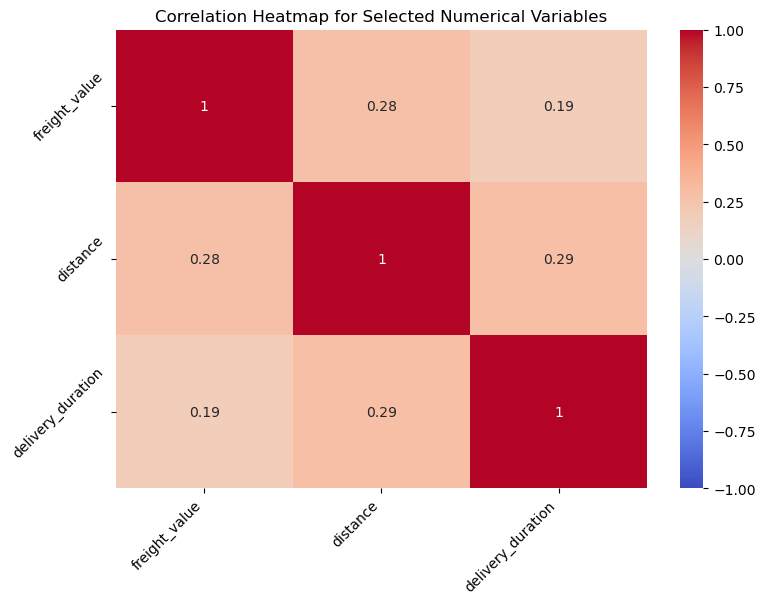

In [156]:
logistics_numerical_columns = ['freight_value','distance','delivery_duration']

correlation_matrix = df_logistics[logistics_numerical_columns].corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(8, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap="coolwarm", 
            vmin=-1,  # Set the minimum of the colorbar to -1
            vmax=1,   # Set the maximum of the colorbar to 1
            center=0) # Center the colorbar at 0

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels
plt.yticks(rotation=45, ha='right')

# Adjust the bottom and top of the plot to ensure labels are not cut off
plt.tight_layout()

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()


Average delivery time

In [157]:
df_logistics.columns

Index(['order_id', 'customer_id', 'status', 'purchase_timestamp',
       'approved_timestamp', 'delivered_carrier_timestamp',
       'delivered_customer_timestamp', 'estimated_delivery_timestamp',
       'delivery_status', 'city_customer', 'state_customer',
       'latitude_customer', 'longitude_customer', 'seller_id',
       'shipping_limit_timestamp', 'freight_value', 'city_seller',
       'state_code_seller', 'latitude_seller', 'longitude_seller', 'distance',
       'delivery_duration', 'estimated_duration'],
      dtype='object')

In [158]:
delivery_time = df_logistics[df_logistics['delivery_duration'] != 0]['delivery_duration']
average_delivery_time = delivery_time.mean().round(0)
average_delivery_time

9.0

Delivery success rate

In [159]:
df_logistics['status'].value_counts()

status
delivered      96258
shipped         1072
canceled         453
invoiced         308
processing       292
unavailable        7
approved           1
Name: count, dtype: int64

In [160]:
df_logistics[df_logistics['status'] == 'shipped']

order_id                       customer_id  \
45      ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
184     6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
191     36530871a5e80138db53bcfd8a104d90  4dafe3c841d2d6cc8a8b6d25b35704b9   
266     4d630f57194f5aba1a3d12ce23e71cd9  6d491c9fe2f04f6e2af6ec033cd8907c   
337     3b4ad687e7e5190db827e1ae5a8989dd  1a87b8517b7d31373b50396eb15cb445   
...                                  ...                               ...   
110949  a59ef0abffbef8ddaae23600b6ee6604  49e64271fb8eeb19851dc7e850e92204   
111230  dab8a6c6bd6ec448df5b3a6b6cb887bc  394653a10cab83cad40d7e2713f3ab89   
111409  492aed3c33bac22a8e04138319829283  58466c1166c377a56f6b2ae0d93ffbc0   
111622  274a7f7e4f1c17b7434a830e9b8759b1  670af30ca5b8c20878fecdafa5ee01b9   
111701  636cdd02667dc8d76d9296bf20a6890a  c162256b133c76f79181ce61d66545db   

         status  purchase_timestamp  approved_timestamp  \
45      shipped 2018-06-04 16:44:48 2018-06-05 04:31:18   
184     shipped 2018-01-10 11:33:07 2018-01-11 02:32:30   
191     shipped 2017-05-09 11:48:37 2017-05-11 11:45:14   
266     shipped 2017-11-17 19:53:21 2017-11-18 19:50:31   
337     shipped 2018-06-28 12:52:15 2018-06-28 13:11:09   
...         ...                 ...                 ...   
110949  shipped 2017-11-06 17:35:49 2017-11-07 06:31:44   
111230  shipped 2018-07-14 10:12:51 2018-07-16 12:30:58   
111409  shipped 2018-07-06 16:26:47 2018-07-06 16:35:10   
111622  shipped 2018-06-23 13:25:15 2018-06-23 13:40:11   
111701  shipped 2018-02-17 14:31:22 2018-02-20 07:11:31   

       delivered_carrier_timestamp delivered_customer_timestamp  \
45             2018-06-05 14:32:00                          NaT   
184            2018-01-11 19:39:23                          NaT   
191            2017-05-11 13:21:47                          NaT   
266            2017-11-22 17:28:34                          NaT   
337            2018-07-04 15:20:00                          NaT   
...                            ...                          ...   
110949         2017-11-07 18:57:39                          NaT   
111230         2018-07-16 14:34:00                          NaT   
111409         2018-07-10 12:27:00                          NaT   
111622         2018-07-04 13:51:00                          NaT   
111701         2018-02-20 19:18:58                          NaT   

       estimated_delivery_timestamp delivery_status       city_customer  ...  \
45                       2018-06-28  not applicable             jundiai  ...   
184                      2018-02-07  not applicable            paracatu  ...   
191                      2017-06-08  not applicable          camaragibe  ...   
266                      2017-12-13  not applicable        porto alegre  ...   
337                      2018-08-03  not applicable      rio de janeiro  ...   
...                             ...             ...                 ...  ...   
110949                   2017-11-24  not applicable  sao caetano do sul  ...   
111230                   2018-08-03  not applicable          guapimirim  ...   
111409                   2018-07-26  not applicable           sao paulo  ...   
111622                   2018-07-24  not applicable             aracaju  ...   
111701                   2018-03-14  not applicable             taubate  ...   

                               seller_id  shipping_limit_timestamp  \
45      e9779976487b77c6d4ac45f75ec7afe9       2018-06-13 04:30:33   
184     cc419e0650a3c5ba77189a1882b7556a       2018-01-18 02:32:30   
191     f8db351d8c4c4c22c6835c19a46f01b0       2017-05-17 11:45:14   
266     04e38a233f726ef161074ab1c9b0399a       2017-11-23 19:50:31   
337     966cb4760537b1404caedd472cc610a5       2018-07-04 13:11:09   
...                                  ...                       ...   
110949  232a6014e7b10cba61c6c2b2ea6bb4b0       2017-11-13 04:26:10   
111230  2a84855fd20af891be03bc5924d2b453       2018-07-18 12

In [161]:
delivered_count = (df_logistics['status'] == 'delivered').sum()
total_delivery = ((df_logistics['status'] == 'delivered') | (df_logistics['status'] == 'shipped')).sum()
delivery_success_rate = round(delivered_count / total_delivery, 2)
delivery_success_rate

0.99

Seller performance

In [162]:
df_logistics.columns

Index(['order_id', 'customer_id', 'status', 'purchase_timestamp',
       'approved_timestamp', 'delivered_carrier_timestamp',
       'delivered_customer_timestamp', 'estimated_delivery_timestamp',
       'delivery_status', 'city_customer', 'state_customer',
       'latitude_customer', 'longitude_customer', 'seller_id',
       'shipping_limit_timestamp', 'freight_value', 'city_seller',
       'state_code_seller', 'latitude_seller', 'longitude_seller', 'distance',
       'delivery_duration', 'estimated_duration'],
      dtype='object')

In [163]:
df_specific_performance = df_logistics[df_logistics['status'] == 'delivered']

In [164]:
df_specific_performance = df_logistics[['seller_id','city_seller','state_code_seller','latitude_seller','longitude_seller','distance','status','purchase_timestamp','delivered_carrier_timestamp','delivered_customer_timestamp']].reset_index()

In [165]:
df_specific_performance.drop(columns='index', inplace=True)

In [166]:
df_specific_performance['seller_process_duration'] = (df_specific_performance['delivered_carrier_timestamp'] - df_specific_performance['purchase_timestamp']).dt.days

In [167]:
df_specific_performance

seller_id        city_seller state_code_seller  \
0      3504c0cb71d7fa48d967e0e4c94d59d9               maua                SP   
1      4869f7a5dfa277a7dca6462dcf3b52b2            guariba                SP   
2      66922902710d126a0e7d26b0e3805106     belo horizonte                MG   
3      2c9e548be18521d1c43cde1c582c6de8    mogi das cruzes                SP   
4      8581055ce74af1daba164fdbd55a40de          guarulhos                SP   
...                                 ...                ...               ...   
98386  e24fc9fcd865784fb25705606fe3dfe7  braganca paulista                SP   
98387  1f9ab4708f3056ede07124aad39a2554               tupa                SP   
98388  d50d79cb34e38265a8649c383dcffd48          sao paulo                SP   
98389  a1043bafd471dff536d0c462352beb48           ilicinea                MG   
98390  ececbfcff9804a2d6b40f589df8eef2b             franca                SP   

       latitude_seller  longitude_seller  distance     status  \
0           -23.680884        -46.444255     22.87  delivered   
1           -21.363473        -48.229588     31.49  delivered   
2           -19.836871        -43.923241     39.12  delivered   
3           -23.541525        -46.262148     22.59  delivered   
4           -23.469087        -46.515649     23.31  delivered   
...                ...               ...       ...        ...   
98386       -22.960840        -46.524516     23.36  delivered   
98387       -21.930498        -50.498063     26.80  delivered   
98388       -23.553991        -46.453292     29.42  delivered   
98389       -20.940864        -45.827036     23.47  delivered   
98390       -20.496383        -47.418025     21.78  delivered   

       purchase_timestamp delivered_carrier_timestamp  \
0     2017-10-02 10:56:33         2017-10-04 19:55:00   
1     2018-08-08 08:38:49         2018-08-08 13:50:00   
2     2017-11-18 19:28:06         2017-11-22 13:39:59   
3     2018-02-13 21:18:39         2018-02-14 19:46:34   
4     2017-07-09 21:57:05         2017-07-11 14:58:04   
...                   ...                         ...   
98386 2017-03-09 09:54:05         2017-03-10 11:18:03   
98387 2018-02-06 12:58:58         2018-02-07 23:22:42   
98388 2017-08-27 14:46:43         2017-08-28 20:52:26   
98389 2018-01-08 21:28:27         2018-01-12 15:35:03   
98390 2018-03-08 20:57:30         2018-03-09 22:11:59   

      delivered_customer_timestamp  seller_process_duration  
0              2017-10-10 21:25:13                      2.0  
1              2018-08-17 18:06:29                      0.0  
2              2017-12-02 00:28:42                      3.0  
3              2018-02-16 18:17:02                      0.0  
4              2017-07-26 10:57:55                      1.0  
...                            ...                      ...  
98386          2017-03-17 15:08:01                      1.0  
98387          2018-02-28 17:37:56                      1.0  
98388          2017-09-21 11:24:17                      1.0  
98389          2018-01-25 23:32:54                      3.0  
98390          2018-03-16 13:08:30                      1.0  

[98391 rows x 11 columns]

In [168]:
df_specific_performance['seller_process_duration'].value_counts().head(10)

seller_process_duration
1.0    24210
0.0    19135
2.0    16428
3.0    12160
4.0     8121
5.0     5392
6.0     3673
7.0     2100
8.0     1258
9.0      903
Name: count, dtype: int64

Carrier performance

In [169]:
df_specific_performance['carrier_process_duration'] = (df_specific_performance['delivered_customer_timestamp'] - df_specific_performance['delivered_carrier_timestamp']).dt.days

In [170]:
df_specific_performance['carrier_process_duration'].value_counts().head(10)

carrier_process_duration
6.0     9087
7.0     8508
1.0     7950
5.0     7882
3.0     6956
4.0     6597
8.0     5673
2.0     5513
9.0     4254
10.0    3763
Name: count, dtype: int64

In [171]:
# Calculate the correlation between carrier_process_duration and distance
correlation = df_specific_performance['carrier_process_duration'].corr(df_specific_performance['distance'])

print(f"Correlation between carrier_process_duration and distance: {correlation:.4f}")


Correlation between carrier_process_duration and distance: 0.2959


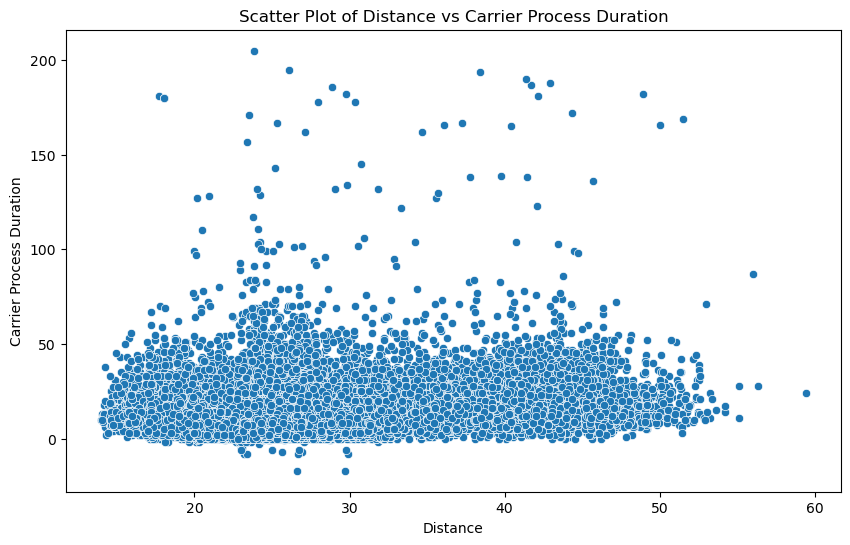

In [172]:

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='carrier_process_duration', data=df_specific_performance)
plt.title('Scatter Plot of Distance vs Carrier Process Duration')
plt.xlabel('Distance')
plt.ylabel('Carrier Process Duration')
plt.show()

# Hypothesis Testing

In [173]:
df_sales.columns

Index(['order_id', 'item_id', 'product_id', 'price', 'freight_value',
       'customer_id', 'purchase_timestamp', 'zip_code_prefix', 'city',
       'state_code', 'latitude', 'longitude', 'state_name', 'category',
       'category_english', 'day_of_week', 'hour', 'month', 'season',
       'purchase_category', 'day_and_time'],
      dtype='object')

In [174]:
df_logistics.columns

Index(['order_id', 'customer_id', 'status', 'purchase_timestamp',
       'approved_timestamp', 'delivered_carrier_timestamp',
       'delivered_customer_timestamp', 'estimated_delivery_timestamp',
       'delivery_status', 'city_customer', 'state_customer',
       'latitude_customer', 'longitude_customer', 'seller_id',
       'shipping_limit_timestamp', 'freight_value', 'city_seller',
       'state_code_seller', 'latitude_seller', 'longitude_seller', 'distance',
       'delivery_duration', 'estimated_duration'],
      dtype='object')

### Comparing Delivery Duration Accross Different States (ANOVA)

Check Normality of delivery duration in each state.

In [175]:
df_logistics['state_customer'].unique()

array(['SP', 'GO', 'RN', 'PR', 'RS', 'RJ', 'MG', 'SC', 'BA', 'PE', 'TO',
       'CE', 'DF', 'SE', 'MT', 'PB', 'PA', 'ES', 'AP', 'MS', 'MA', 'PI',
       'AL', 'RO', 'RR', 'AM'], dtype=object)

In [176]:
df_logistics_htest_1 = df_logistics.copy()

In [177]:
analyze_outliers_zscore(df_logistics_htest_1)

Column  Number of Outliers Percentage of Outliers  Lower Bound  \
0   latitude_customer                2681                  2.72%   -37.893693   
2       freight_value                1814                  1.84%   -27.350086   
5            distance                1795                  1.82%     8.427418   
6   delivery_duration                1648                  1.67%   -17.532598   
3     latitude_seller                1589                  1.61%   -31.006035   
4    longitude_seller                1581                  1.61%   -54.260044   
7  estimated_duration                1070                  1.09%    -2.972548   
1  longitude_customer                 347                  0.35%   -57.929480   

   Upper Bound  Min Outlier  Max Outlier  
0    -4.567748    -4.567257     2.814040  
2    67.478103    67.480000   409.680000  
5    44.302002    44.310000    59.400000  
6    34.746693    35.000000   205.000000  
3   -14.589467   -32.075303    -2.503367  
4   -40.207009   -61.957203   -34.855784  
7    49.807604    50.000000   155.000000  
1   -34.320954   -62.010859   -33.722628

In [178]:
remove_outliers_zscore(df_logistics_htest_1)

Removed 8925 rows


order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5       a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
...                                  ...                               ...   
111985  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
111986  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
111987  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
111988  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
111990  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

           status  purchase_timestamp  approved_timestamp  \
0       delivered 2017-10-02 10:56:33 2017-10-02 11:07:15   
2       delivered 2018-08-08 08:38:49 2018-08-08 08:55:23   
3       delivered 2017-11-18 19:28:06 2017-11-18 19:45:59   
4       delivered 2018-02-13 21:18:39 2018-02-13 22:20:29   
5       delivered 2017-07-09 21:57:05 2017-07-09 22:10:13   
...           ...                 ...                 ...   
111985  delivered 2017-03-09 09:54:05 2017-03-09 09:54:05   
111986  delivered 2018-02-06 12:58:58 2018-02-06 13:10:37   
111987  delivered 2017-08-27 14:46:43 2017-08-27 15:04:16   
111988  delivered 2018-01-08 21:28:27 2018-01-08 21:36:21   
111990  delivered 2018-03-08 20:57:30 2018-03-09 11:20:28   

       delivered_carrier_timestamp delivered_customer_timestamp  \
0              2017-10-04 19:55:00          2017-10-10 21:25:13   
2              2018-08-08 13:50:00          2018-08-17 18:06:29   
3              2017-11-22 13:39:59          2017-12-02 00:28:42   
4              2018-02-14 19:46:34          2018-02-16 18:17:02   
5              2017-07-11 14:58:04          2017-07-26 10:57:55   
...                            ...                          ...   
111985         2017-03-10 11:18:03          2017-03-17 15:08:01   
111986         2018-02-07 23:22:42          2018-02-28 17:37:56   
111987         2017-08-28 20:52:26          2017-09-21 11:24:17   
111988         2018-01-12 15:35:03          2018-01-25 23:32:54   
111990         2018-03-09 22:11:59          2018-03-16 13:08:30   

       estimated_delivery_timestamp delivery_status            city_customer  \
0                        2017-10-18         on-time                sao paulo   
2                        2018-09-04         on-time               vianopolis   
3                        2017-12-15         on-time  sao goncalo do amarante   
4                        2018-02-26         on-time              santo andre   
5                        2017-08-01         on-time             congonhinhas   
...                             ...             ...                      ...   
111985                   2017-03-28         on-time      sao jose dos campos   
111986                   2018-03-02         on-time             praia grande   
111987                   2017-09-27         on-time              nova vicosa   
111988                   2018-02-15         on-time                  japuiba   
111990                   2018-04-03         on-time                     lapa   

        ...                         seller_id  shipping_limit_timestamp  \
0       ...  3504c0cb71d7fa48d967e0e4c94d59d9       2017-10-06 11:07:15   
2       ...  4869f7a5dfa277a7dca6462dcf3b52b2       2018-08-13 08:55:23   
3       ...  66922902710d126a0e7d26b0e3805106       2017-11-23 19:45:59   
4       ...  2c9e548be18521d1c43cde1c582c6de8       2018-02-19 20:31:37   
5       ...  8581055ce74af1daba164fdbd55a40de       2017-07-13 22:10:13   
...     ...                               ...                       ...   
111985  ...  e24fc9fcd865784fb25705606fe3dfe7       2017-03-15 09:54:05

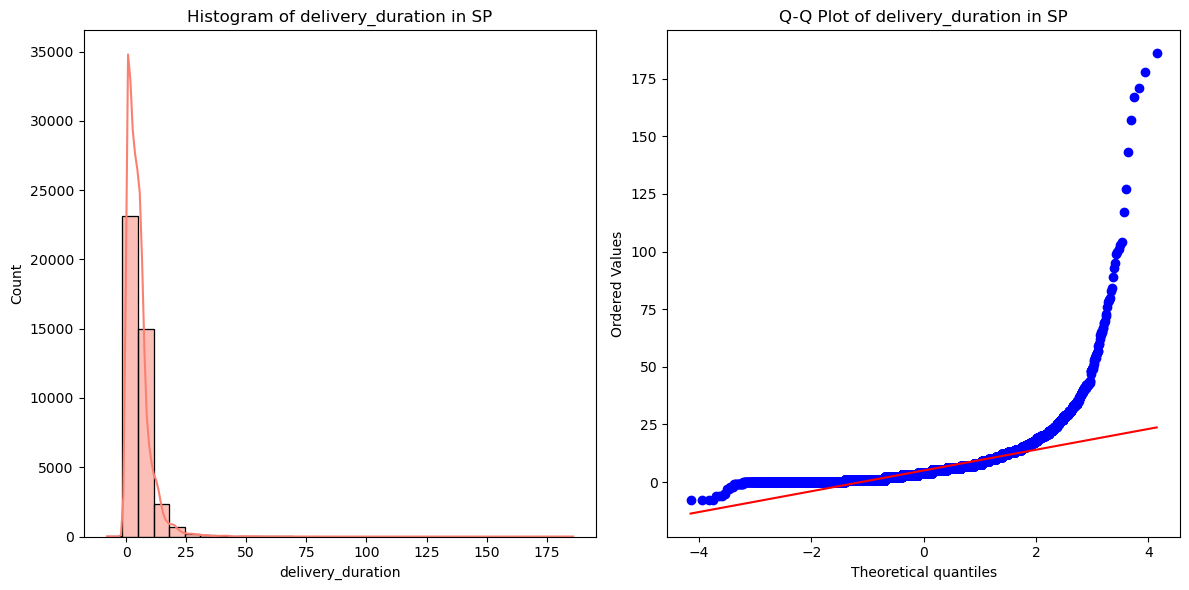

Kolmogorov-Smirnov test for SP:
The p-value is 0.0
The distribution of delivery_duration in SP is significantly different from normal.



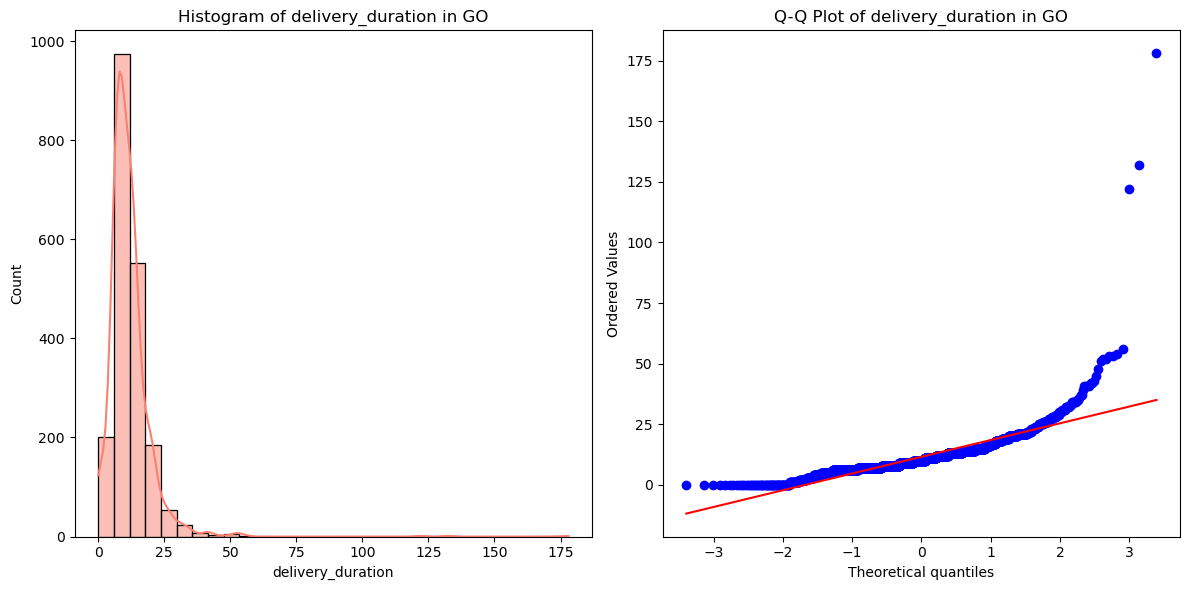

Kolmogorov-Smirnov test for GO:
The p-value is 2.849487109804073e-51
The distribution of delivery_duration in GO is significantly different from normal.



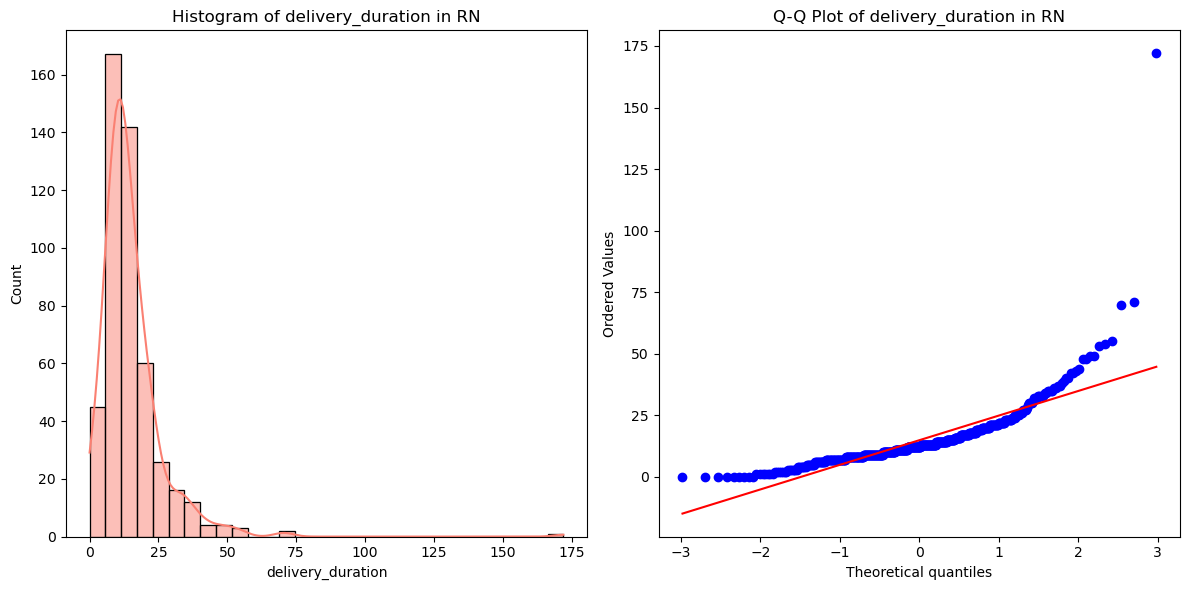

Kolmogorov-Smirnov test for RN:
The p-value is 2.937637725251039e-12
The distribution of delivery_duration in RN is significantly different from normal.



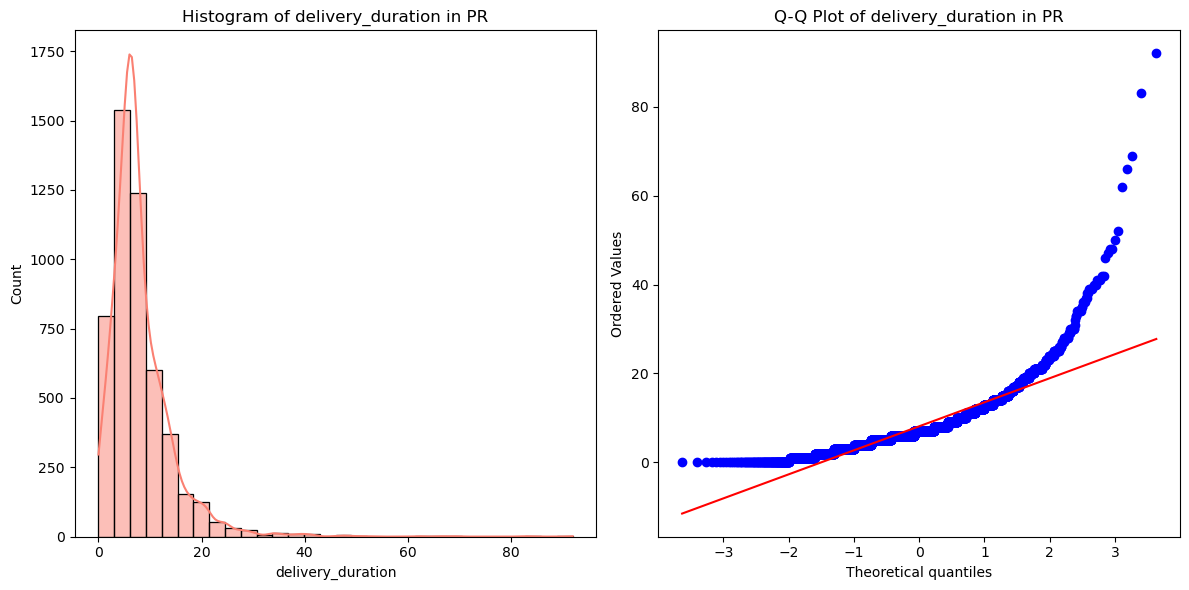

Kolmogorov-Smirnov test for PR:
The p-value is 7.640868863100006e-136
The distribution of delivery_duration in PR is significantly different from normal.



Kolmogorov-Smirnov test for RS:
The p-value is 3.71314519477792e-112
The distribution of delivery_duration in RS is significantly different from normal.



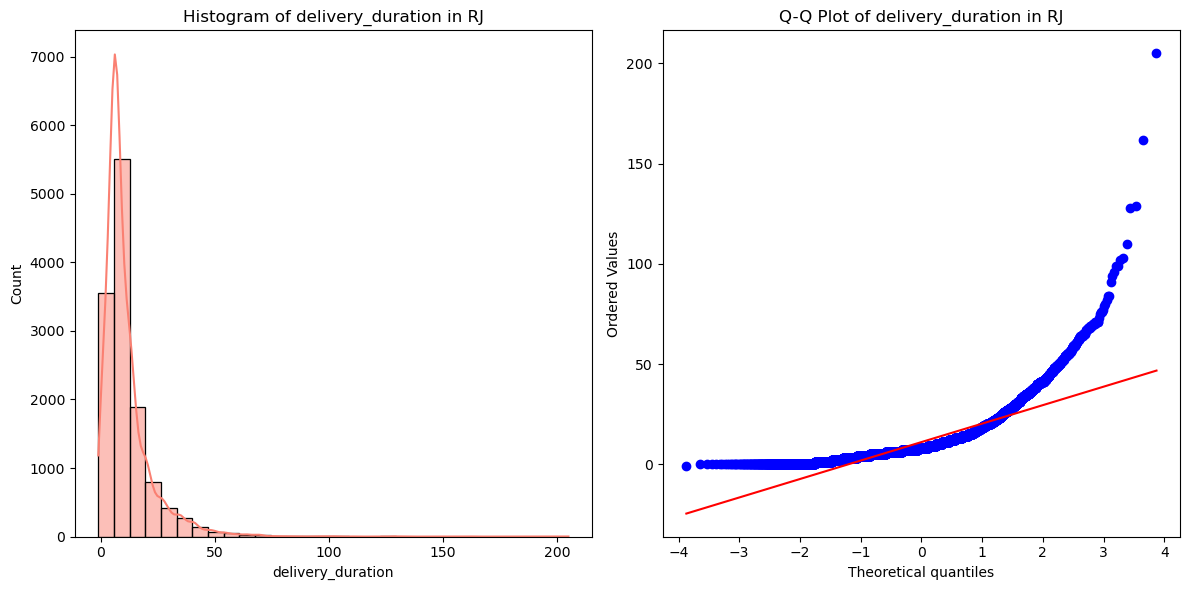

Kolmogorov-Smirnov test for RJ:
The p-value is 0.0
The distribution of delivery_duration in RJ is significantly different from normal.



Kolmogorov-Smirnov test for MG:
The p-value is 8.9312553e-317
The distribution of delivery_duration in MG is significantly different from normal.



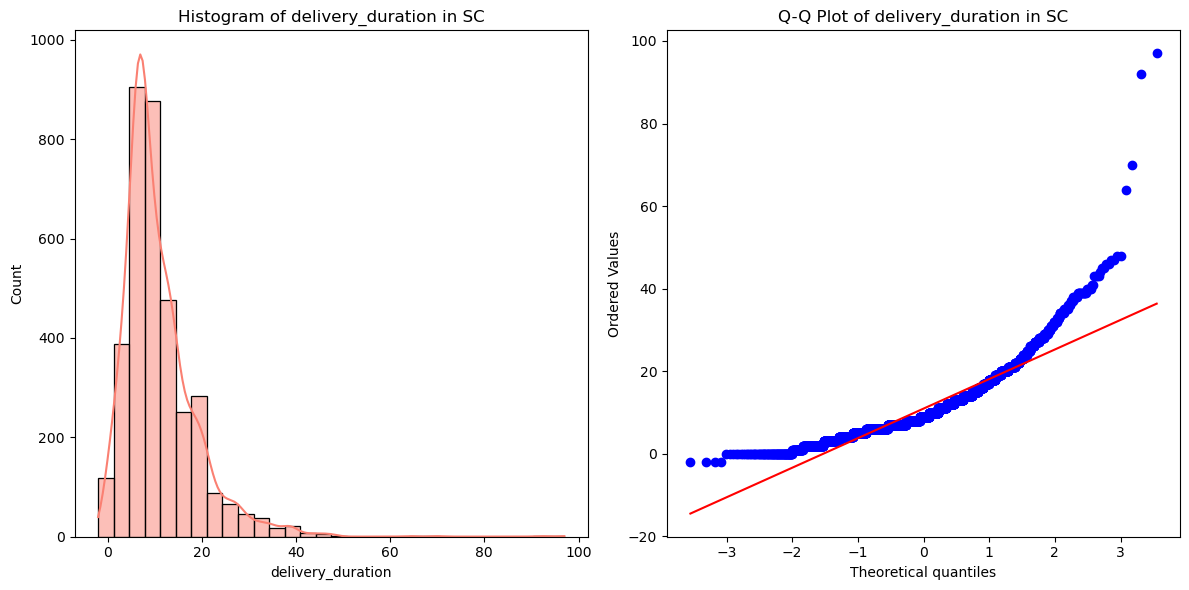

Kolmogorov-Smirnov test for SC:
The p-value is 6.348302098498122e-60
The distribution of delivery_duration in SC is significantly different from normal.



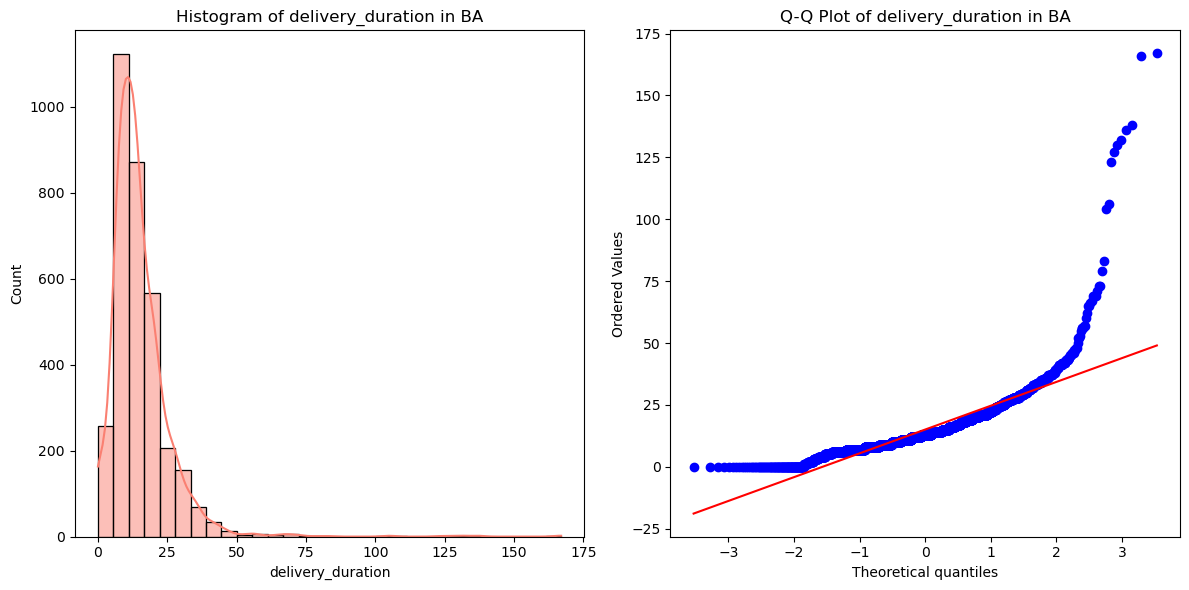

Kolmogorov-Smirnov test for BA:
The p-value is 3.616335942770131e-61
The distribution of delivery_duration in BA is significantly different from normal.



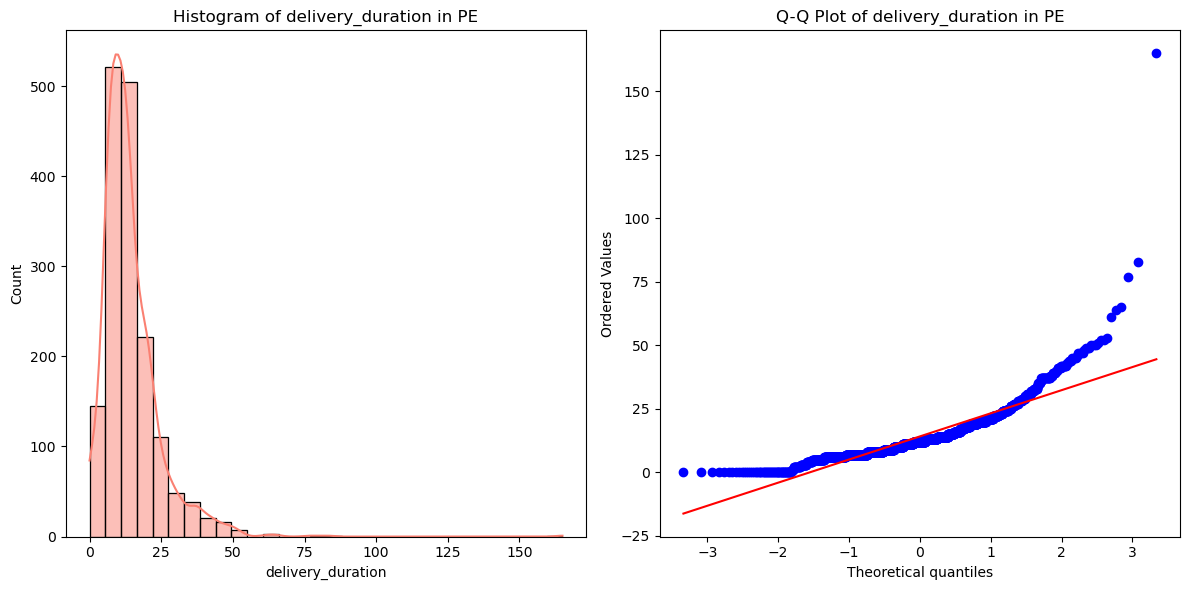

Kolmogorov-Smirnov test for PE:
The p-value is 1.6967592561759934e-37
The distribution of delivery_duration in PE is significantly different from normal.



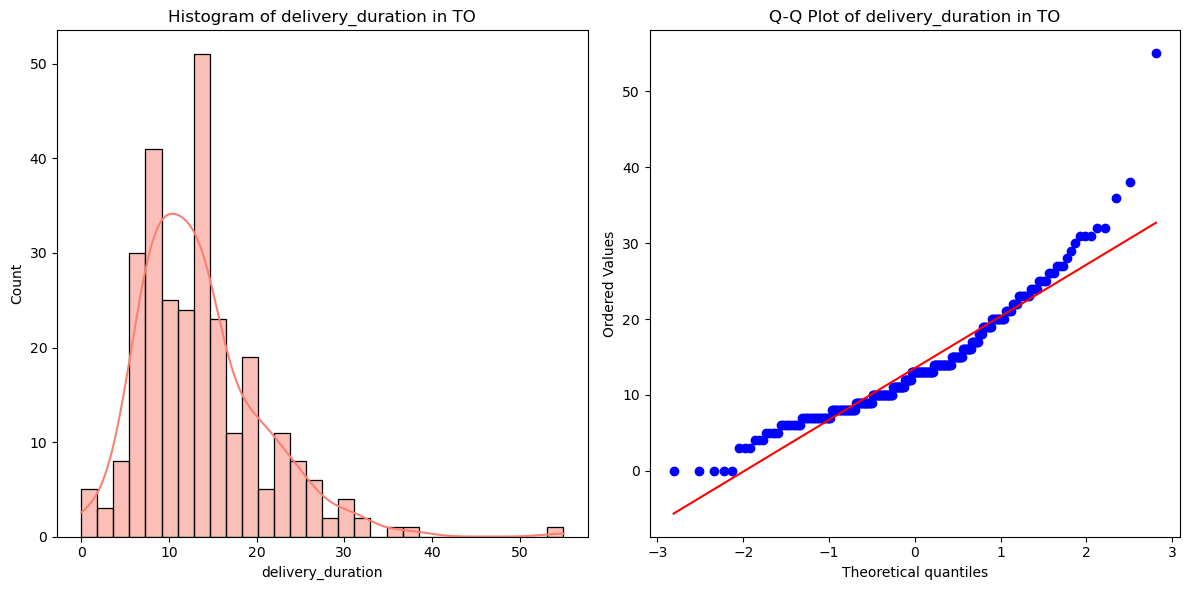

Kolmogorov-Smirnov test for TO:
The p-value is 3.5517015592938445e-05
The distribution of delivery_duration in TO is significantly different from normal.



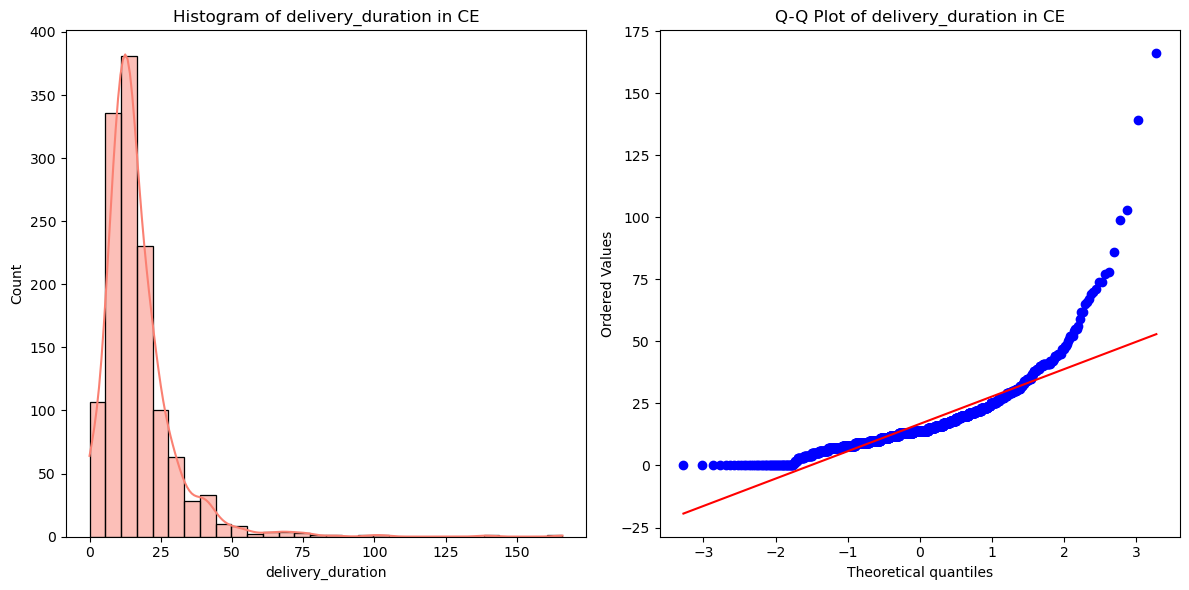

Kolmogorov-Smirnov test for CE:
The p-value is 1.802775026988513e-27
The distribution of delivery_duration in CE is significantly different from normal.



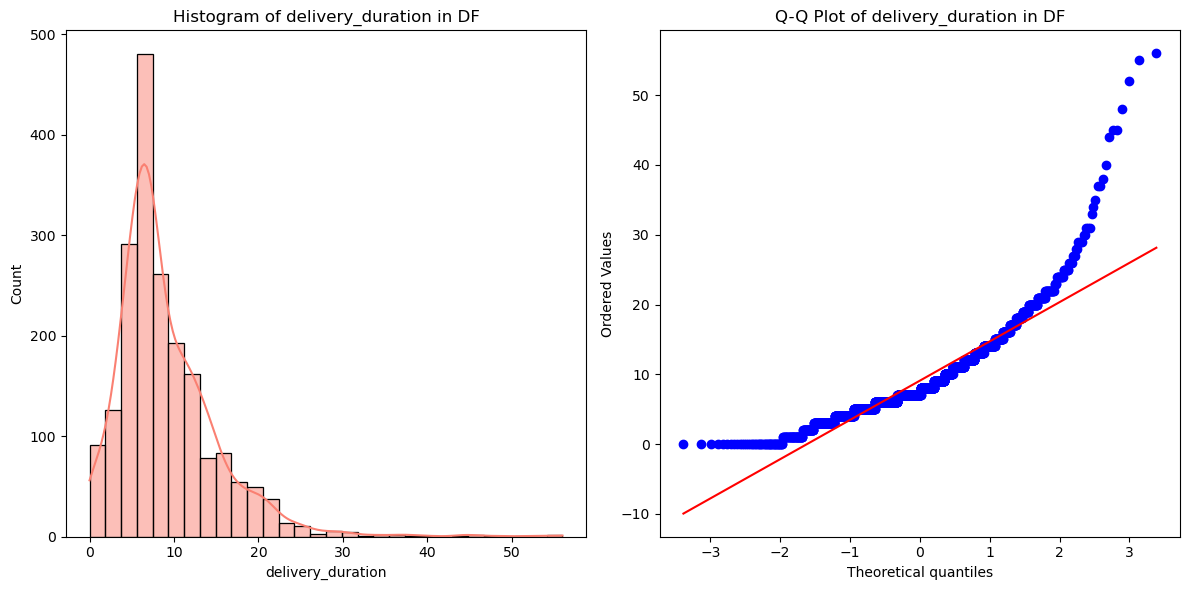

Kolmogorov-Smirnov test for DF:
The p-value is 9.085398872538154e-40
The distribution of delivery_duration in DF is significantly different from normal.



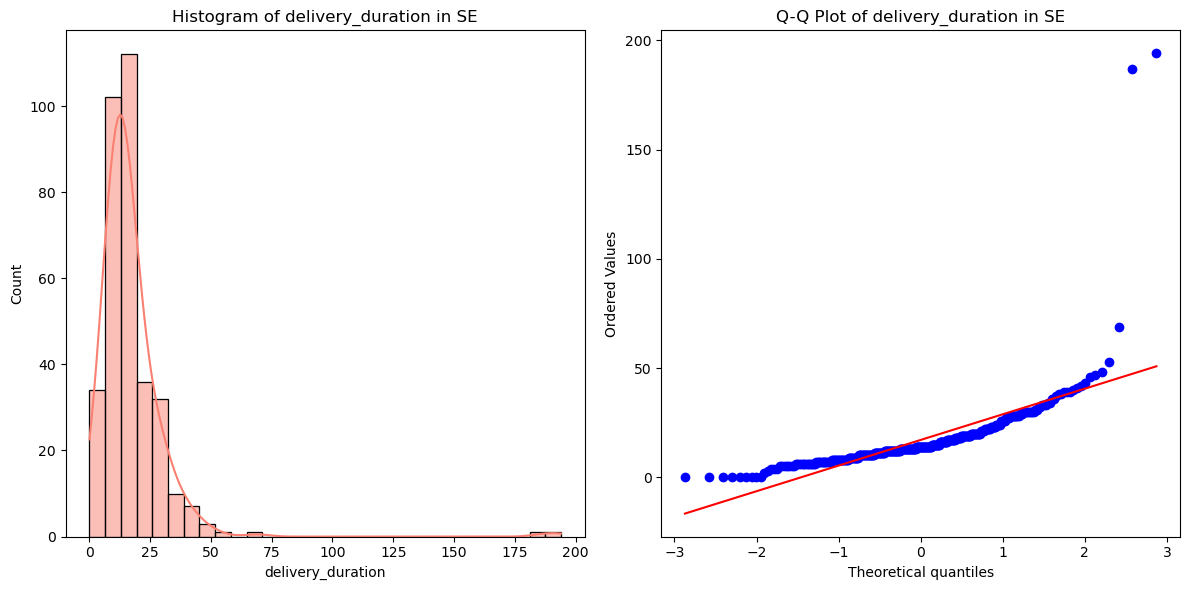

Kolmogorov-Smirnov test for SE:
The p-value is 3.5638225189000033e-12
The distribution of delivery_duration in SE is significantly different from normal.



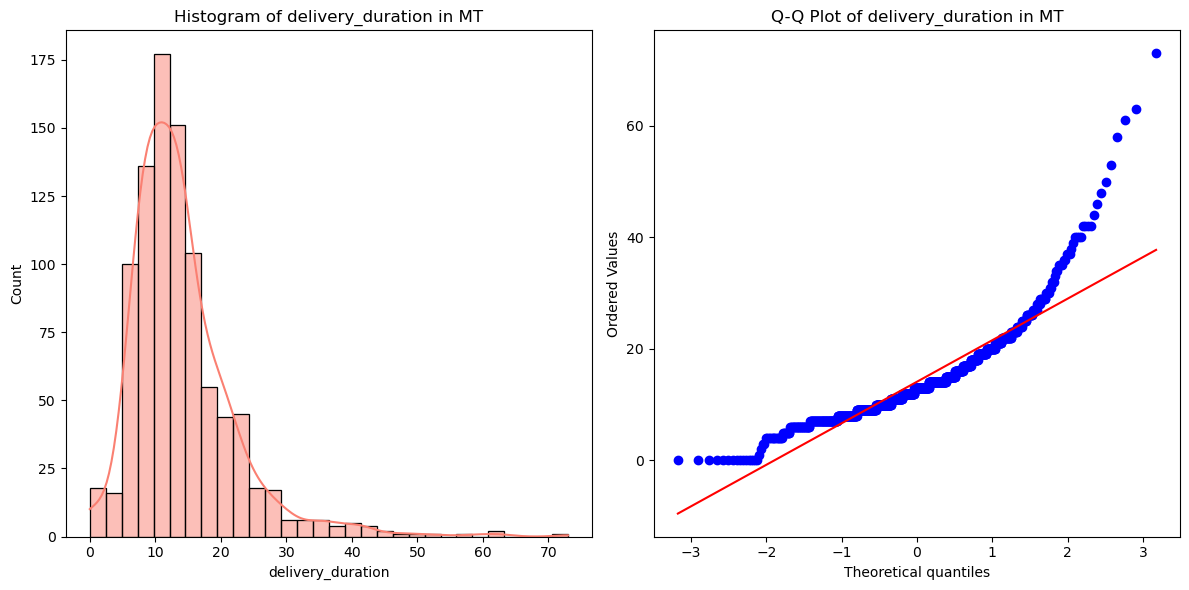

Kolmogorov-Smirnov test for MT:
The p-value is 9.372001436450292e-20
The distribution of delivery_duration in MT is significantly different from normal.



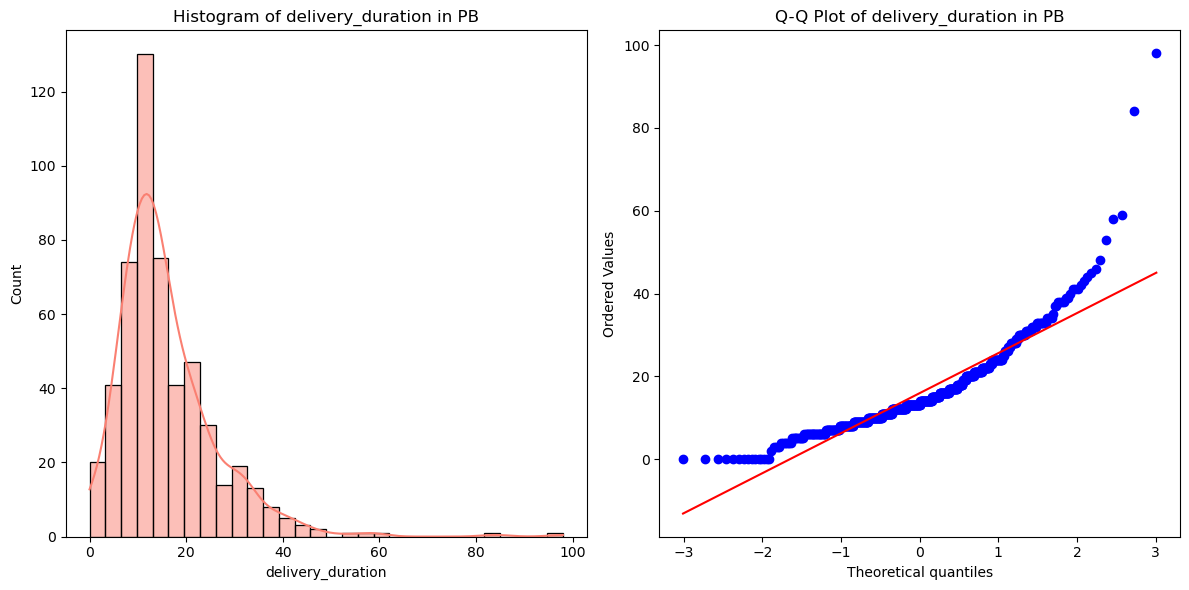

Kolmogorov-Smirnov test for PB:
The p-value is 6.929838409480439e-10
The distribution of delivery_duration in PB is significantly different from normal.



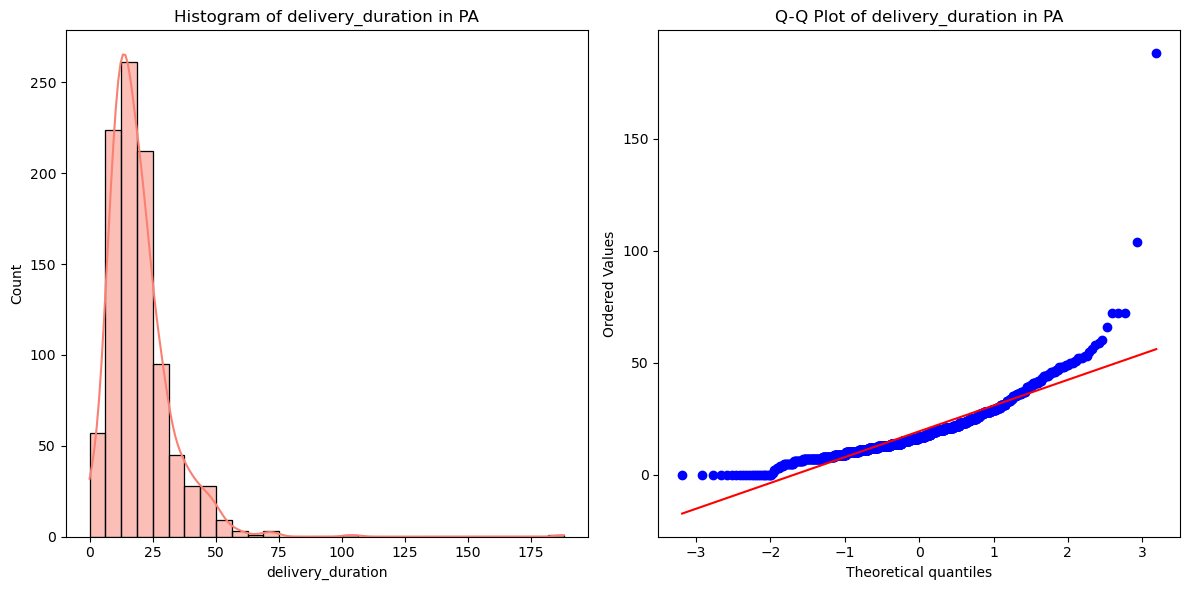

Kolmogorov-Smirnov test for PA:
The p-value is 5.6541923181134075e-14
The distribution of delivery_duration in PA is significantly different from normal.



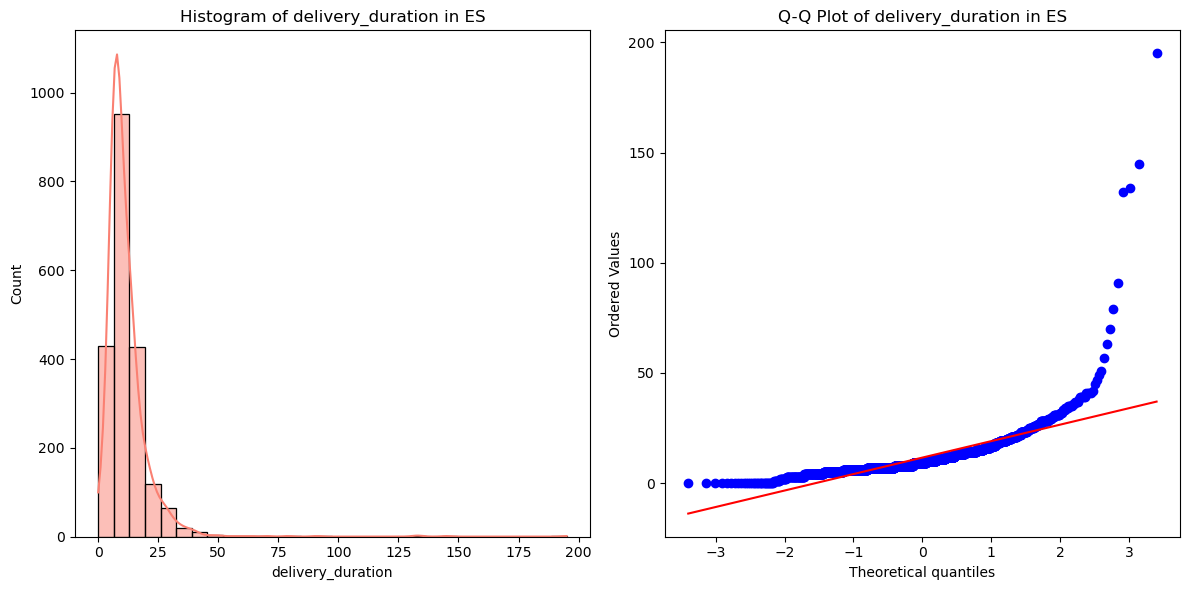

Kolmogorov-Smirnov test for ES:
The p-value is 1.7476839789929542e-61
The distribution of delivery_duration in ES is significantly different from normal.



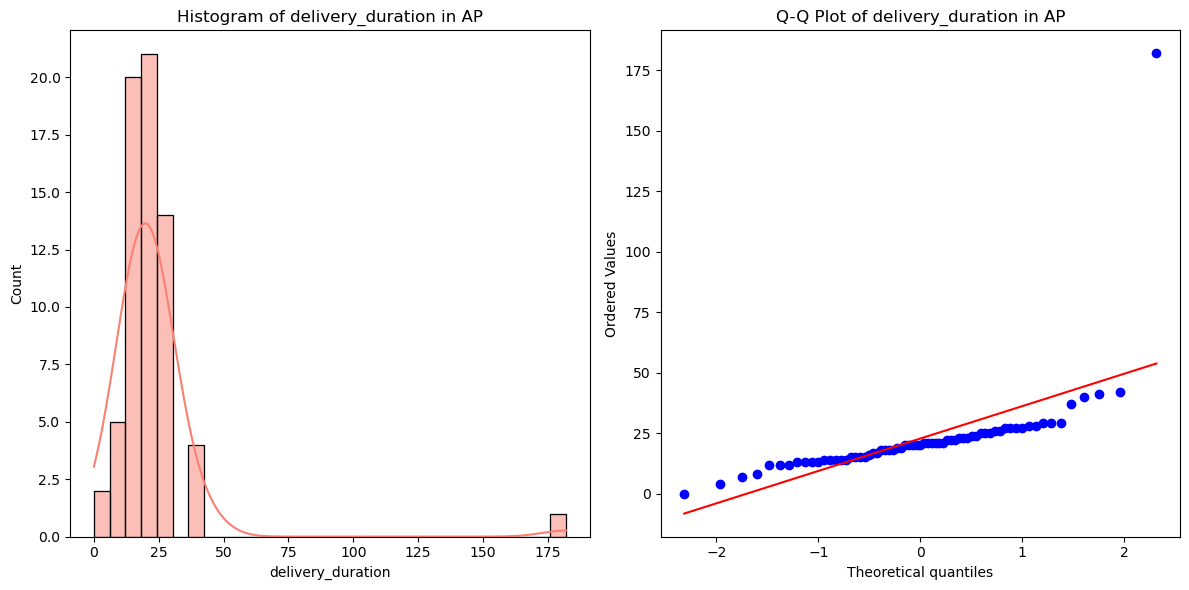

Kolmogorov-Smirnov test for AP:
The p-value is 3.1748314744765603e-06
The distribution of delivery_duration in AP is significantly different from normal.



Kolmogorov-Smirnov test for MS:
The p-value is 1.2519270493927887e-13
The distribution of delivery_duration in MS is significantly different from normal.



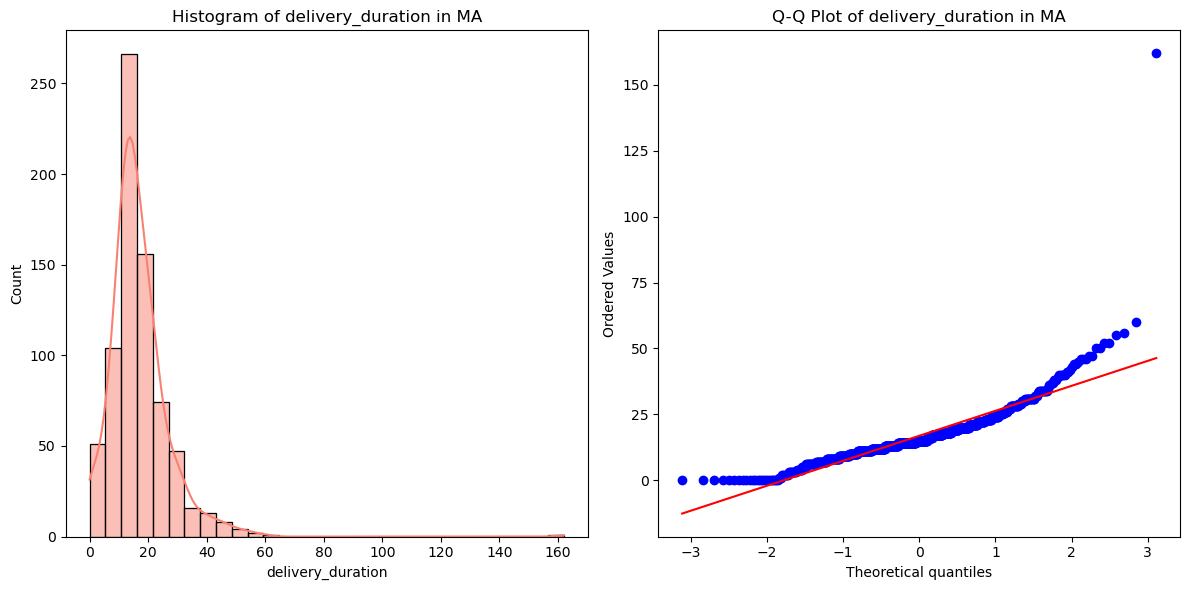

Kolmogorov-Smirnov test for MA:
The p-value is 6.797740994160835e-11
The distribution of delivery_duration in MA is significantly different from normal.



Kolmogorov-Smirnov test for PI:
The p-value is 6.9491326634778776e-15
The distribution of delivery_duration in PI is significantly different from normal.



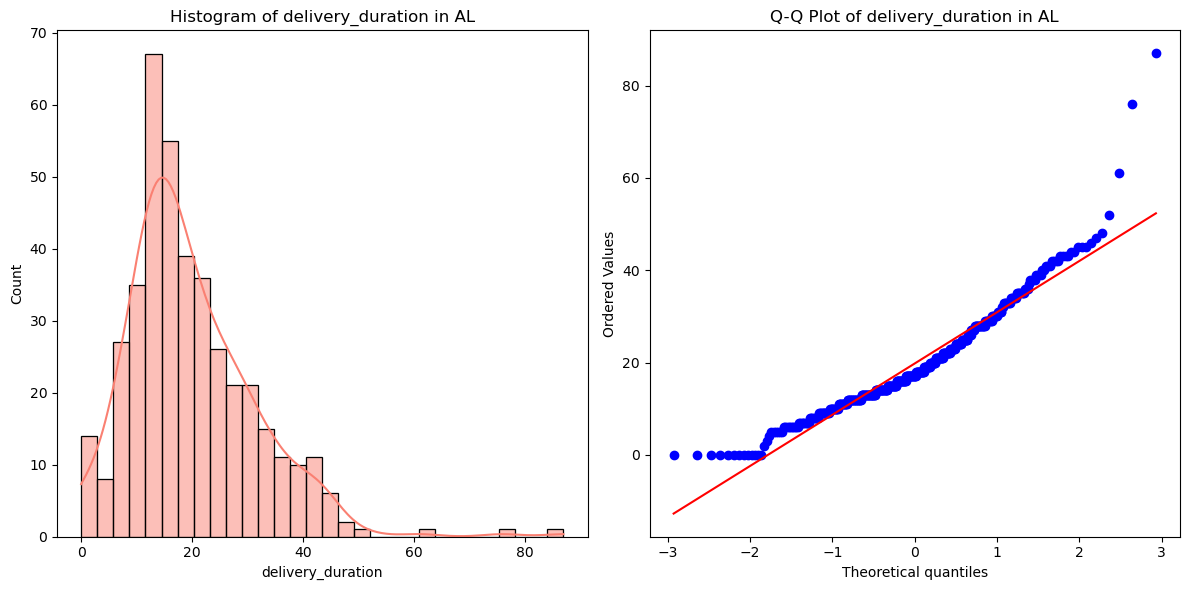

Kolmogorov-Smirnov test for AL:
The p-value is 0.00016085844638963212
The distribution of delivery_duration in AL is significantly different from normal.



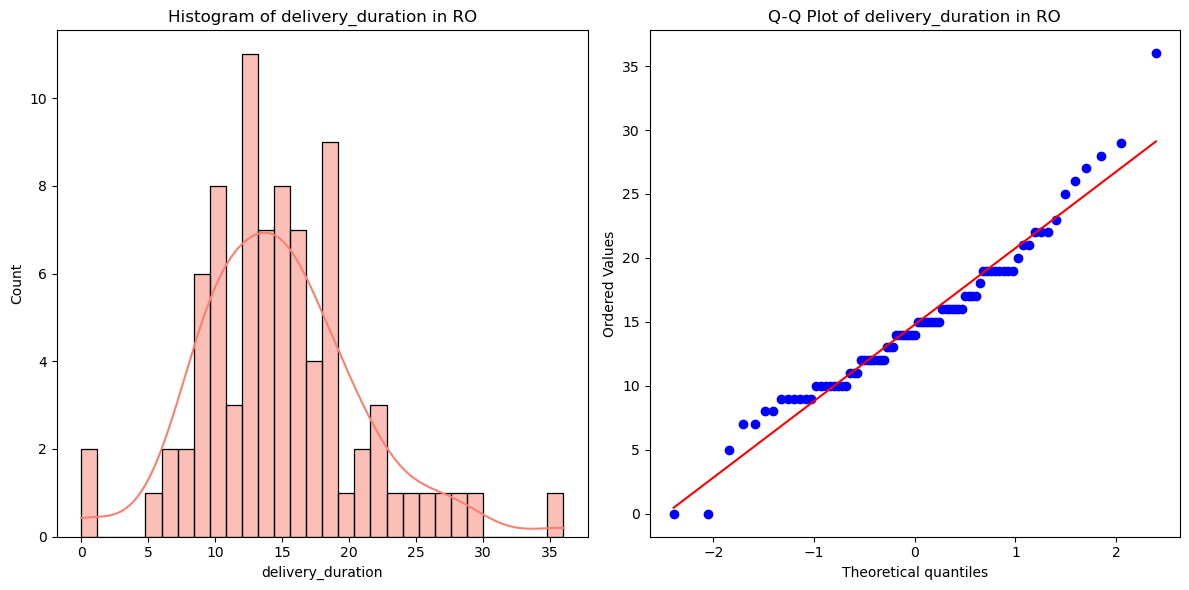

Kolmogorov-Smirnov test for RO:
The p-value is 0.28196357770160985
The distribution of delivery_duration in RO is not significantly different from normal.



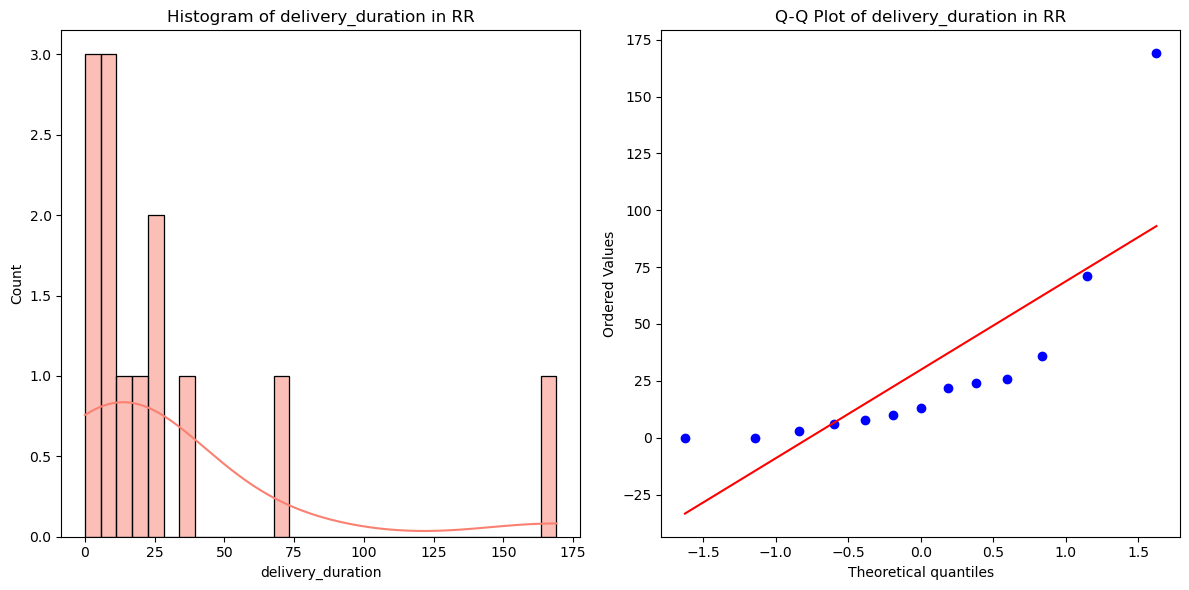

Kolmogorov-Smirnov test for RR:
The p-value is 0.14952347393457865
The distribution of delivery_duration in RR is not significantly different from normal.



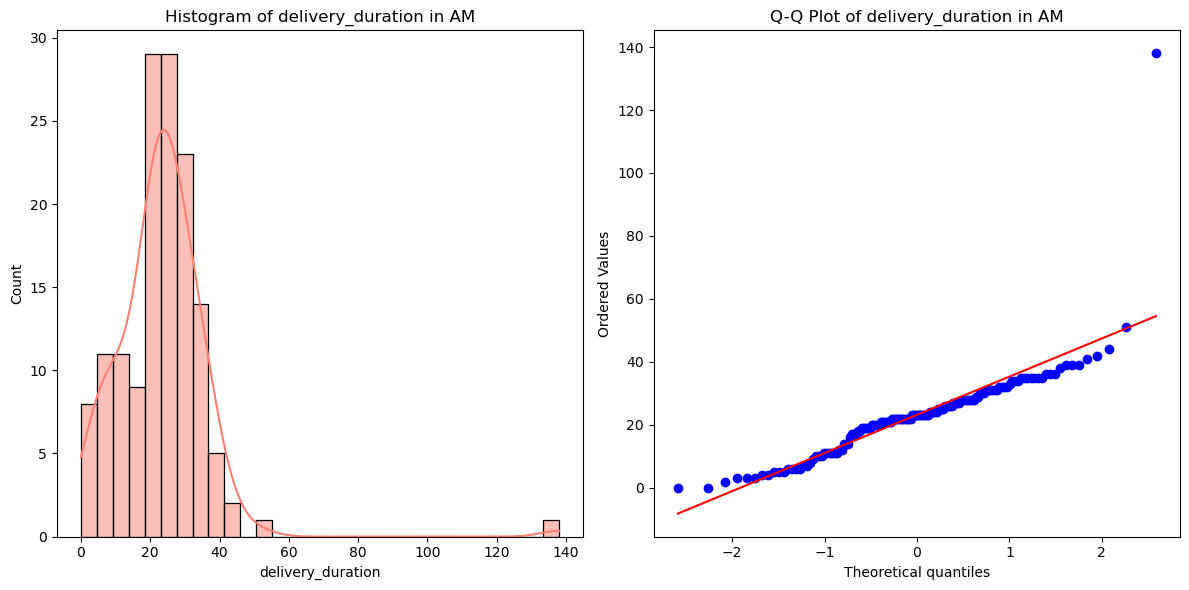

Kolmogorov-Smirnov test for AM:
The p-value is 0.03389495708617718
The distribution of delivery_duration in AM is significantly different from normal.



In [179]:
# Check normality within each state
normality_check_group(df_logistics_htest_1, column_name='delivery_duration', group_column='state_customer')


In [180]:
df_logistics_htest_1.loc[df_logistics_htest_1['delivery_duration'] < 0, 'delivery_duration'] = 0

In [181]:
data_exploration(df_logistics_htest_1)

Number of rows: 98391
Number of columns: 23
Number of duplicates: 0

Numerical Columns: Index(['latitude_customer', 'longitude_customer', 'freight_value',
       'latitude_seller', 'longitude_seller', 'distance', 'delivery_duration',
       'estimated_duration'],
      dtype='object')

Categorical Columns: Index(['order_id', 'customer_id', 'status', 'delivery_status', 'city_customer',
       'state_customer', 'seller_id', 'city_seller', 'state_code_seller'],
      dtype='object')


Column       Data Type  Non-Null Count  \
0                       order_id          object           98391   
1                    customer_id          object           98391   
2                         status          object           98391   
3             purchase_timestamp  datetime64[ns]           98391   
4             approved_timestamp  datetime64[ns]           98377   
5    delivered_carrier_timestamp  datetime64[ns]           97403   
6   delivered_customer_timestamp  datetime64[ns]           96257   
7   estimated_delivery_timestamp  datetime64[ns]           98391   
8                delivery_status          object           98391   
9                  city_customer          object           98391   
10                state_customer          object           98391   
11             latitude_customer         float64           98391   
12            longitude_customer         float64           98391   
13                     seller_id          object           98391   
14      shipping_limit_timestamp  datetime64[ns]           98391   
15                 freight_value         float64           98391   
16                   city_seller          object           98391   
17             state_code_seller          object           98391   
18               latitude_seller         float64           98391   
19              longitude_seller         float64           98391   
20                      distance         float64           98391   
21             delivery_duration           int64           98391   
22            estimated_duration           int64           98391   

    Missing Values  Unique Values  
0                0          95982  
1                0          95982  
2                0              7  
3                0          95446  
4               14          87885  
5              988          78977  
6             2134          93091  
7                0            450  
8                0              3  
9                0           3993  
10               0             26  
11               0          14692  
12               0          14692  
13               0           2962  
14               0          90918  
15               0           6911  
16               0            535  
17               0             21  
18               0           2165  
19               0           2165  
20               0           3503  
21               0            137  
22               0            102

Data Normalization

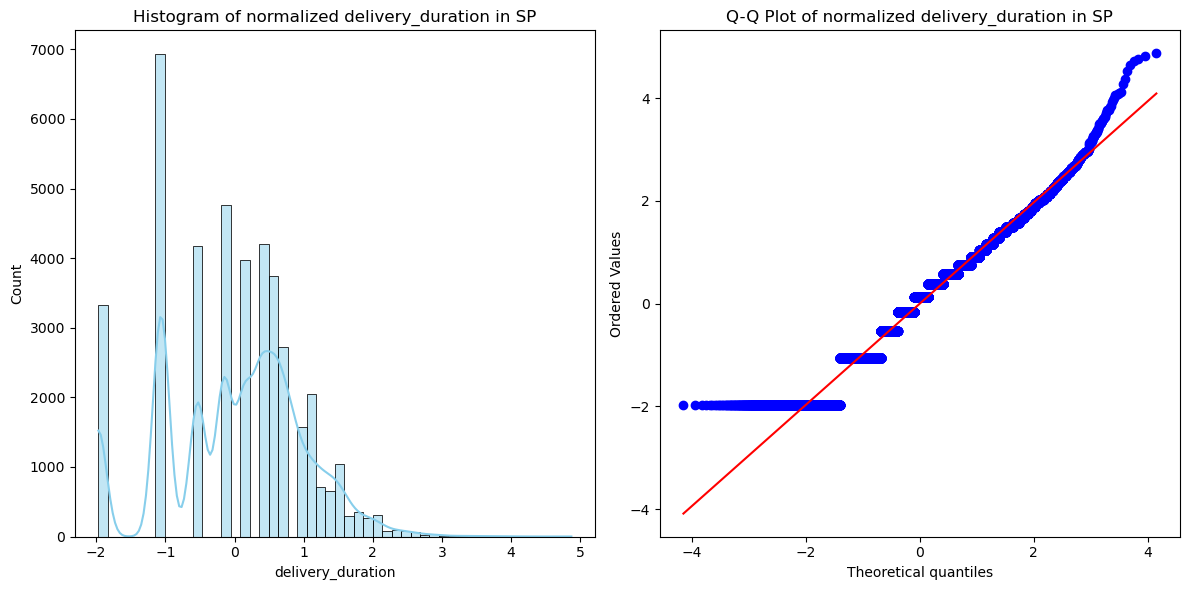

Kolmogorov-Smirnov test after transformation for SP:
The p-value is 0.0


c:\Users\Gebruiker\OneDrive\Documents\GitHub\e-commerce-analysis\notebooks\draft_notebooks\functions.py:563: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.57570854 -1.06199921  0.37419096 ...  0.37419096  0.75027101
  2.01189871]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[group_column] == group, column_name] = standardized_log_column


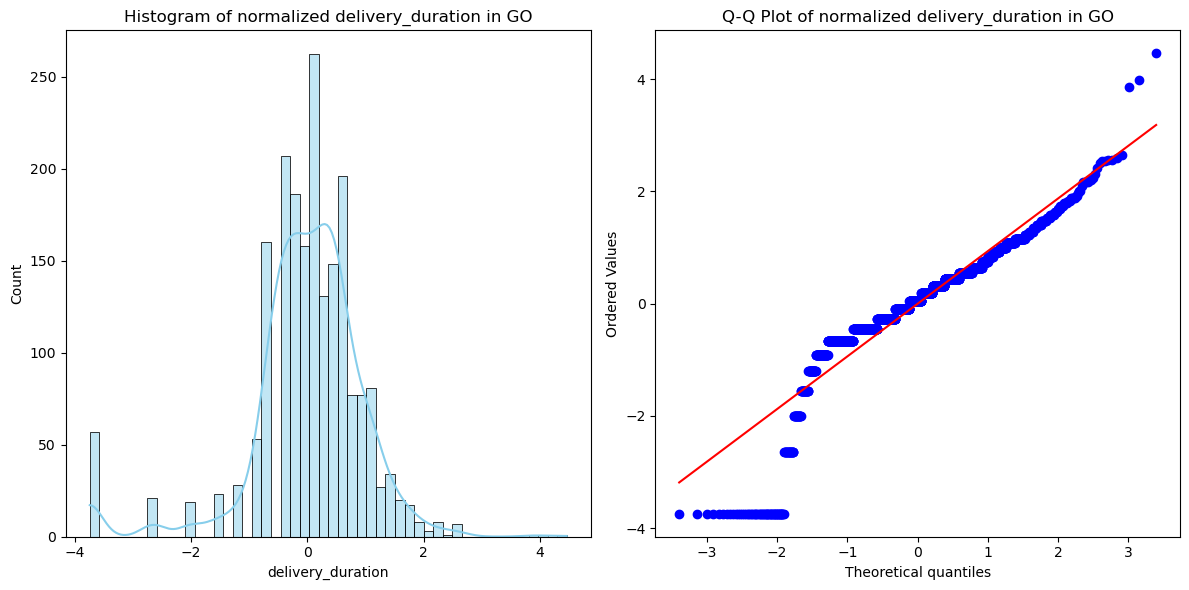

Kolmogorov-Smirnov test after transformation for GO:
The p-value is 5.548579635266652e-42


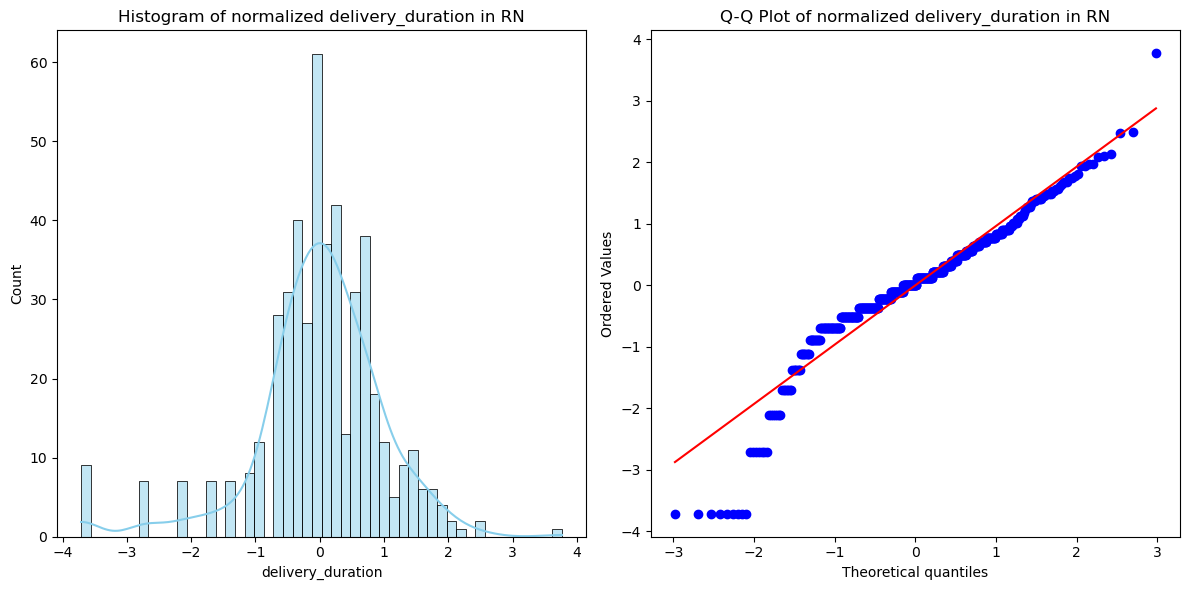

Kolmogorov-Smirnov test after transformation for RN:
The p-value is 4.140568308458201e-07


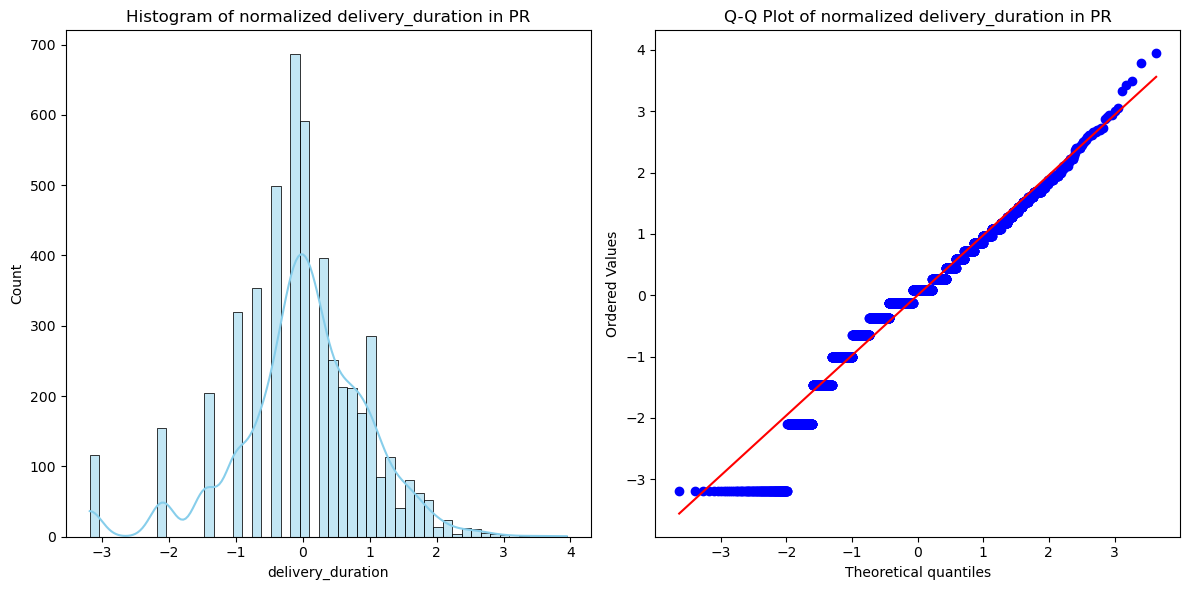

Kolmogorov-Smirnov test after transformation for PR:
The p-value is 5.022295002208321e-69


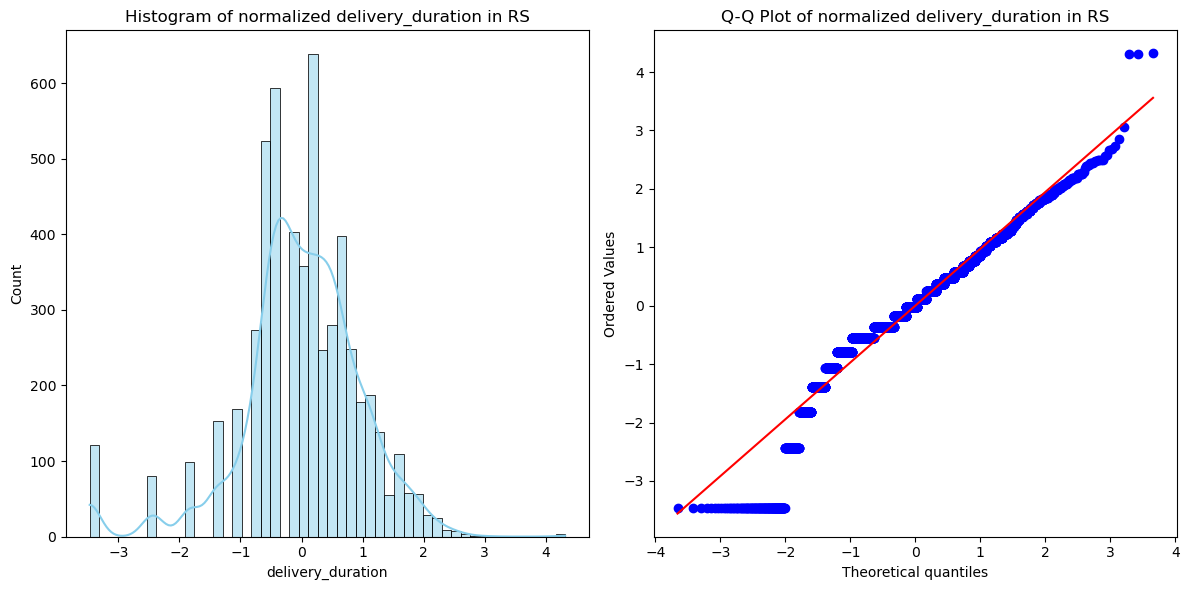

Kolmogorov-Smirnov test after transformation for RS:
The p-value is 1.789951842382693e-73


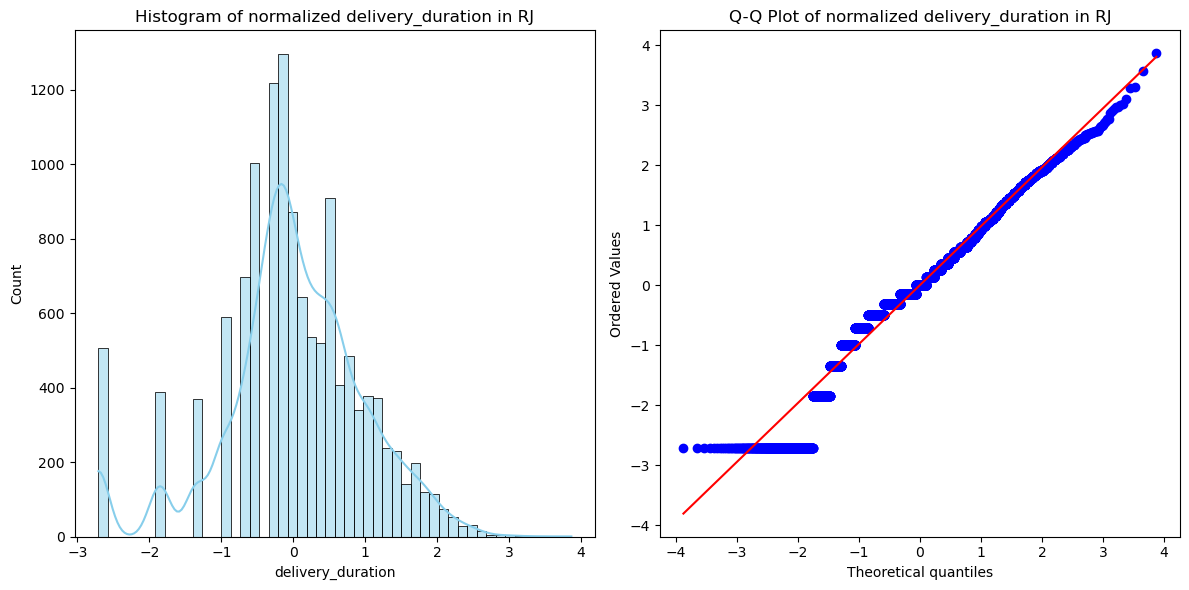

Kolmogorov-Smirnov test after transformation for RJ:
The p-value is 2.583964712700908e-135


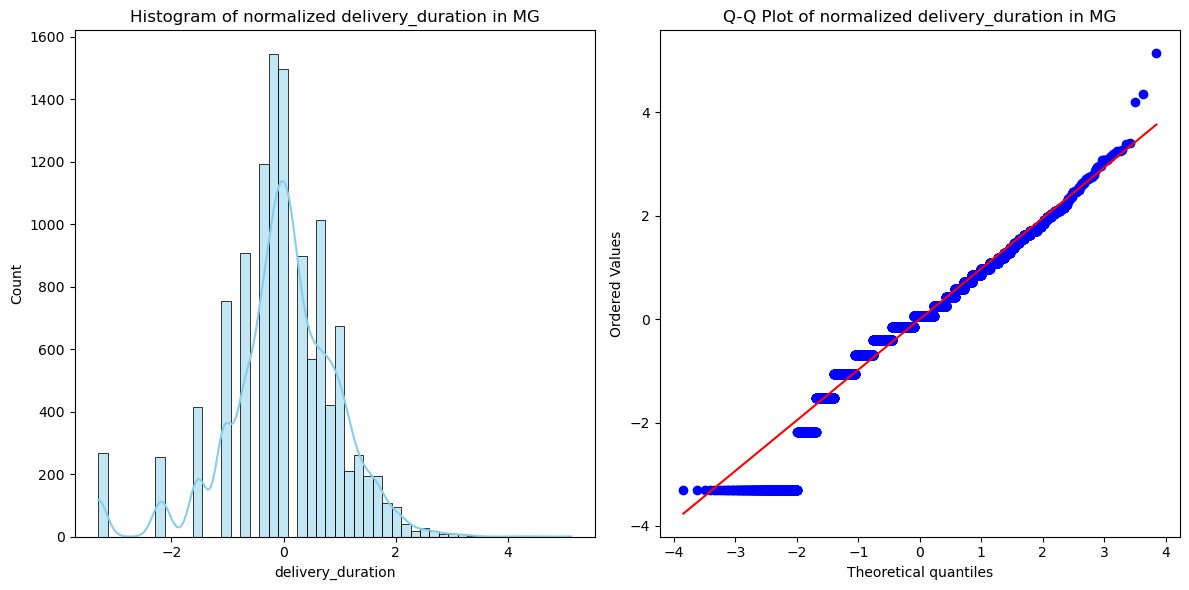

Kolmogorov-Smirnov test after transformation for MG:
The p-value is 6.339685343630711e-147


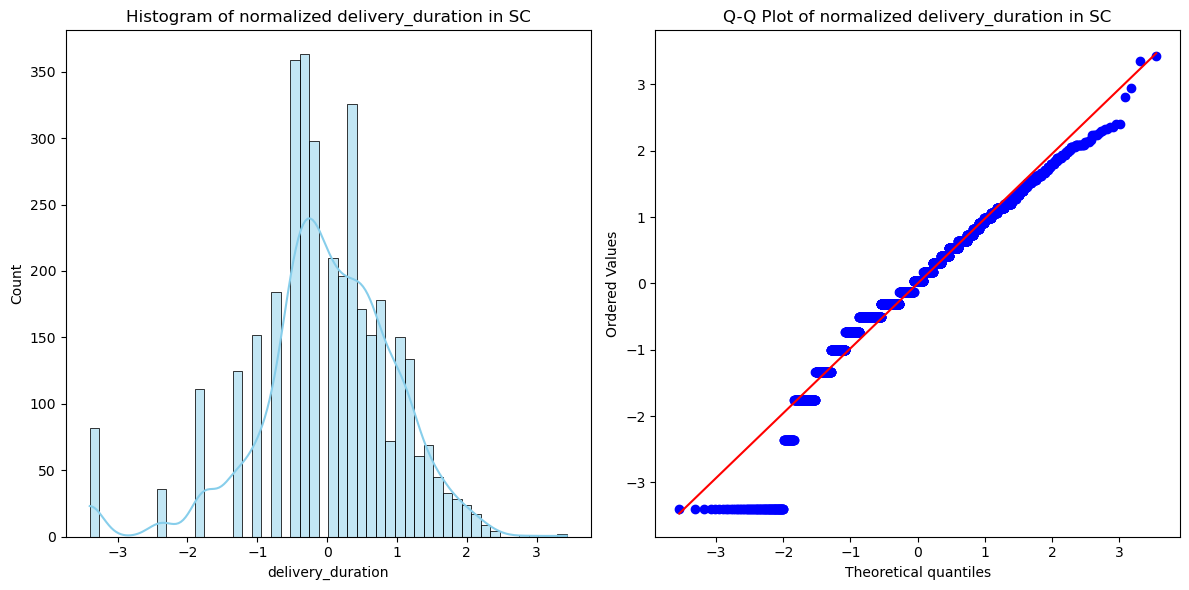

Kolmogorov-Smirnov test after transformation for SC:
The p-value is 1.2192967985824809e-42


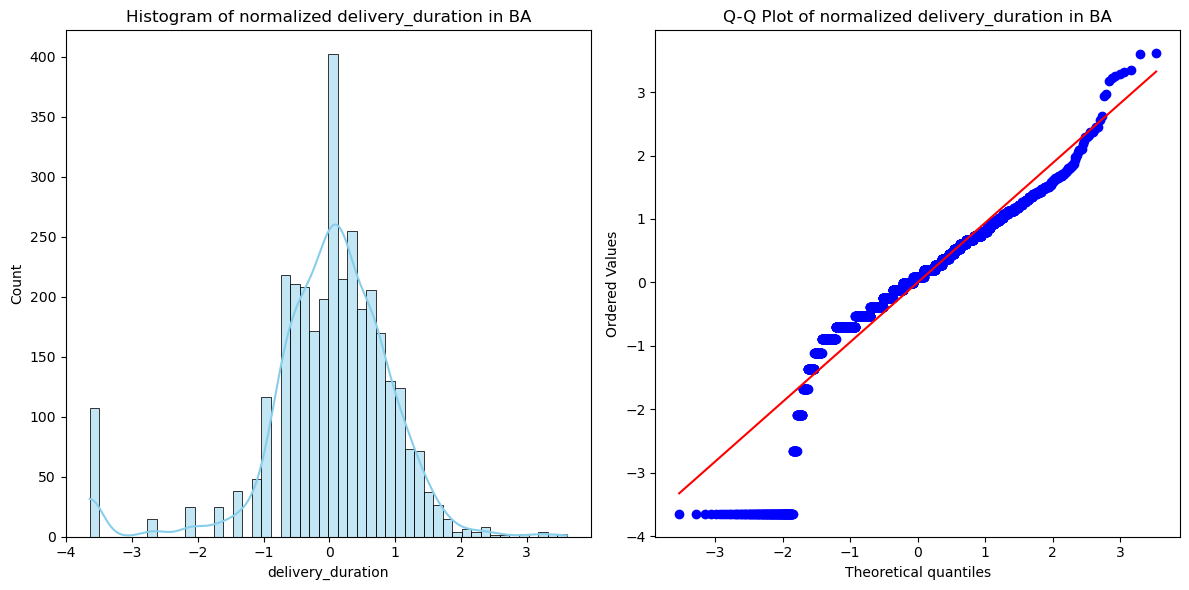

Kolmogorov-Smirnov test after transformation for BA:
The p-value is 1.8913441498958365e-49


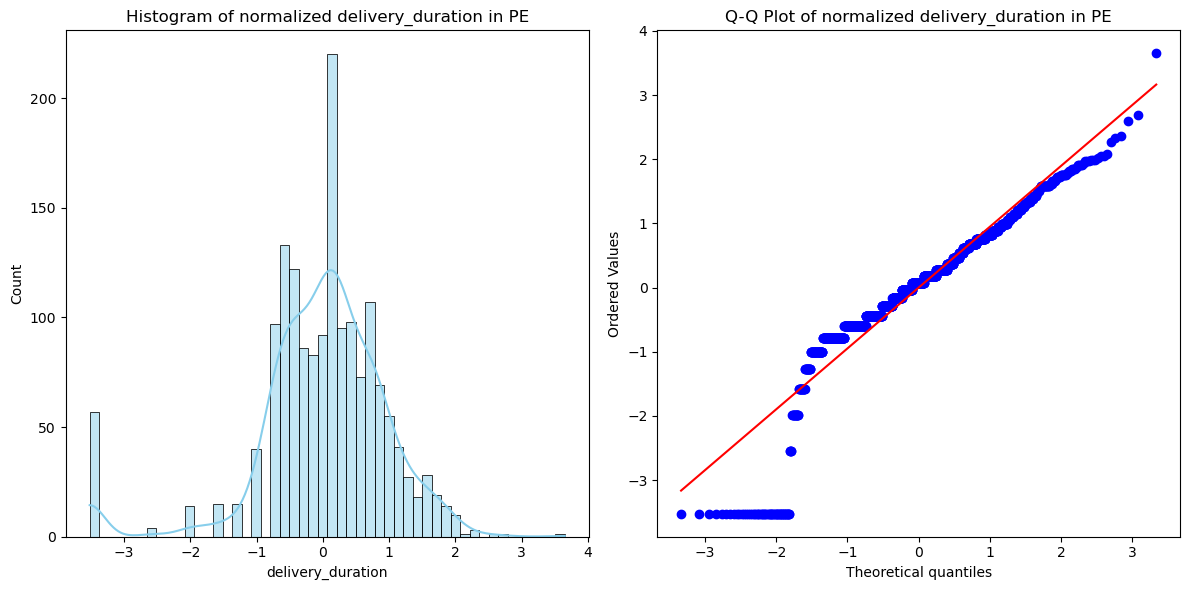

Kolmogorov-Smirnov test after transformation for PE:
The p-value is 4.4982502384022736e-23


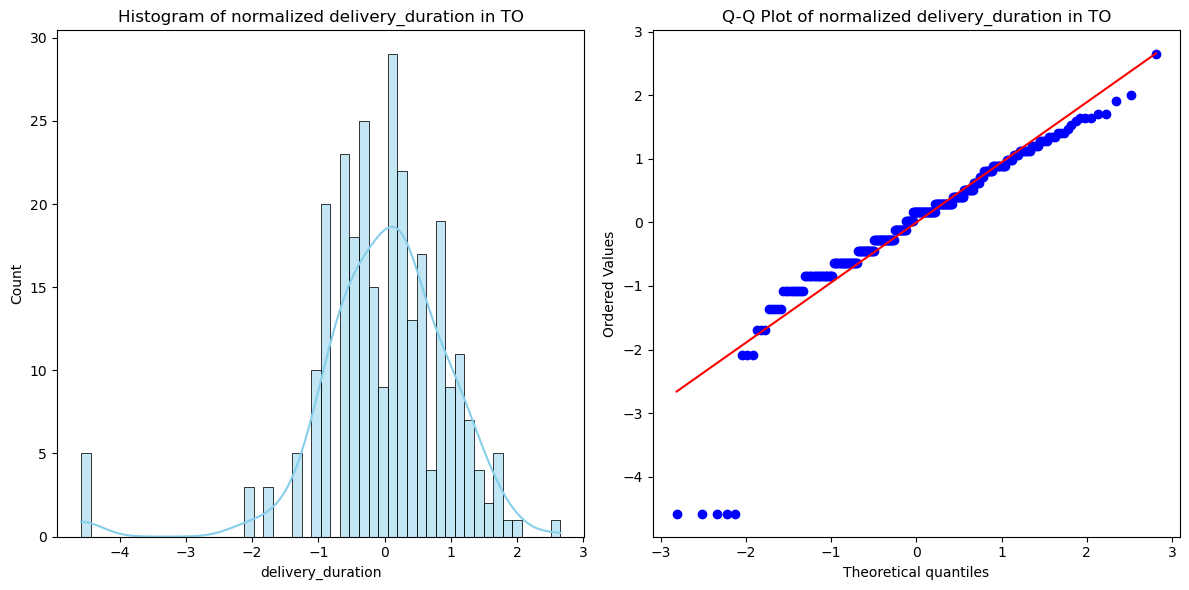

Kolmogorov-Smirnov test after transformation for TO:
The p-value is 0.0029652830282273245


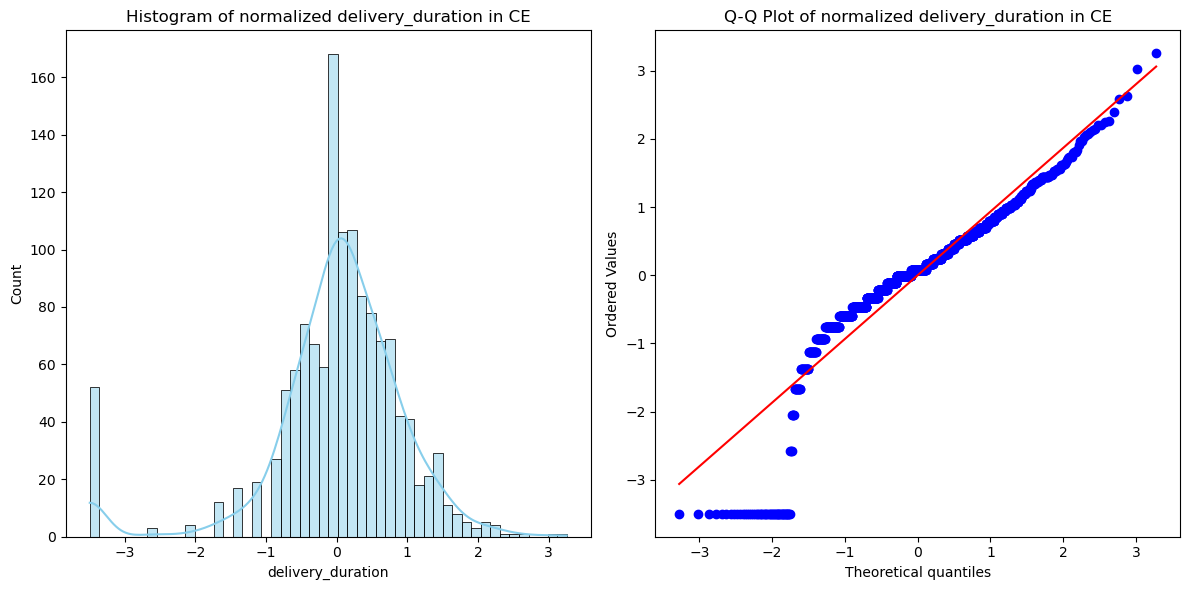

Kolmogorov-Smirnov test after transformation for CE:
The p-value is 1.7950311657012396e-22


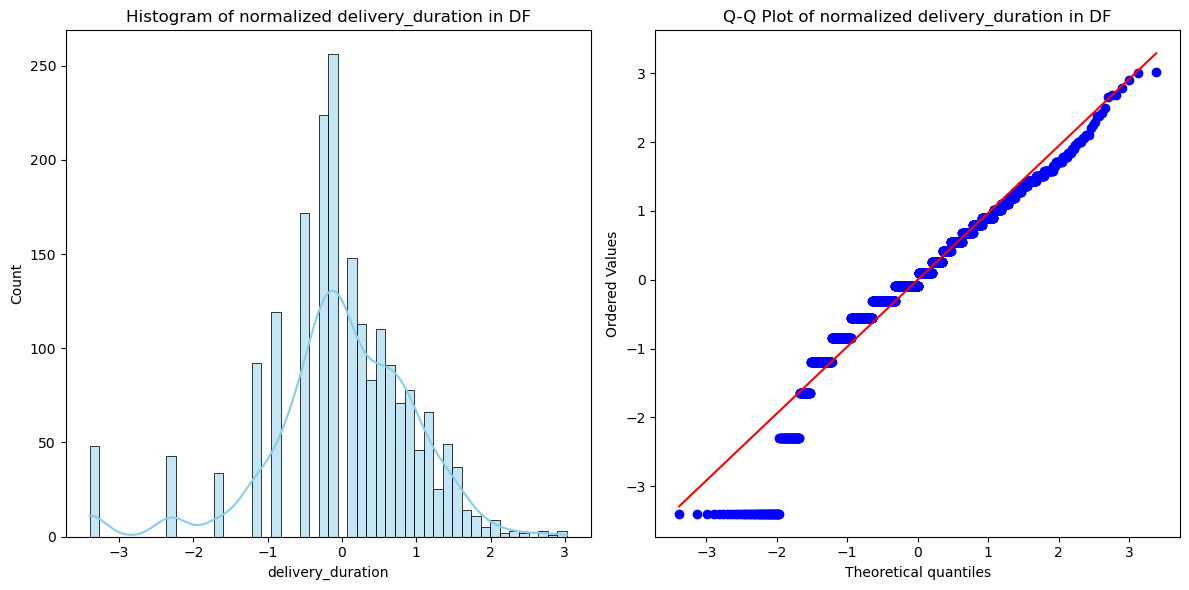

Kolmogorov-Smirnov test after transformation for DF:
The p-value is 2.9777342341879864e-25


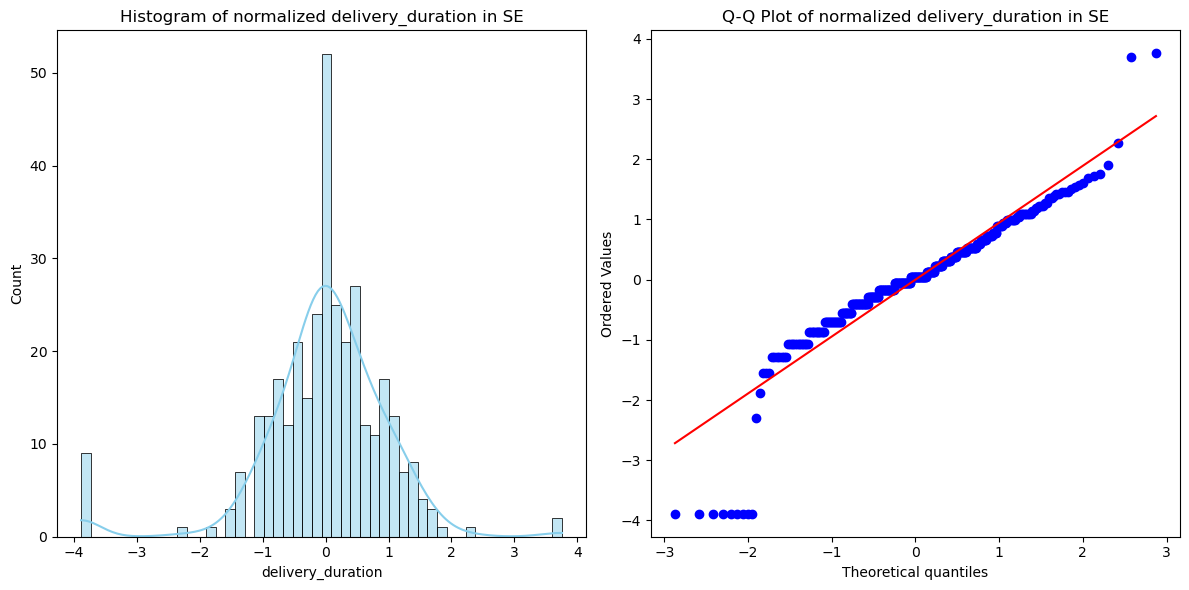

Kolmogorov-Smirnov test after transformation for SE:
The p-value is 0.00015026405013101156


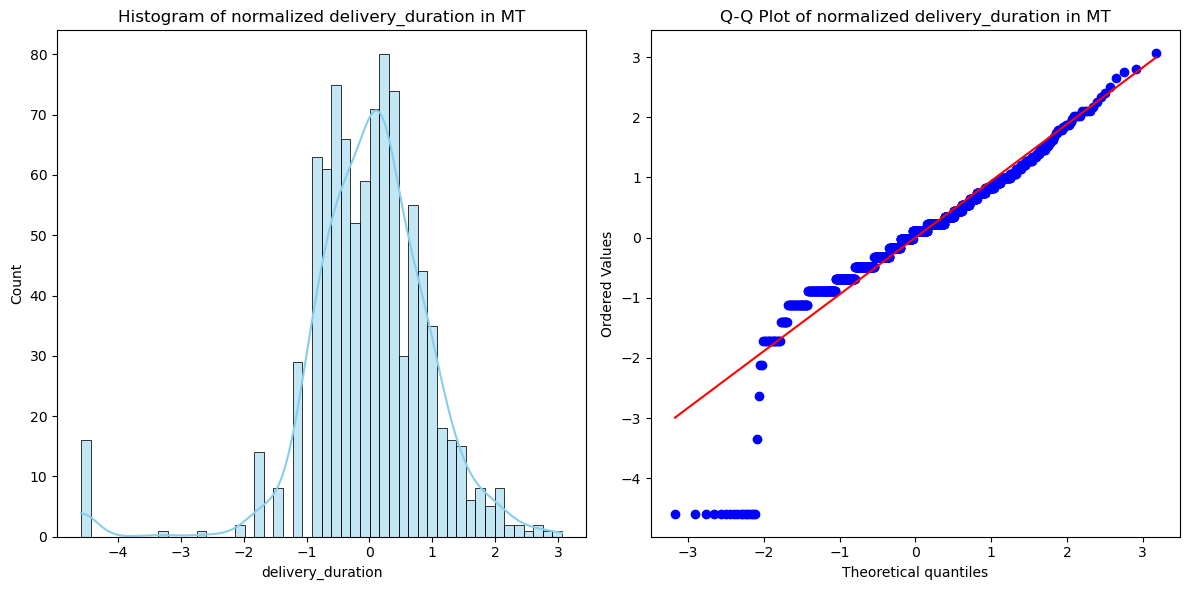

Kolmogorov-Smirnov test after transformation for MT:
The p-value is 4.966571621168305e-10


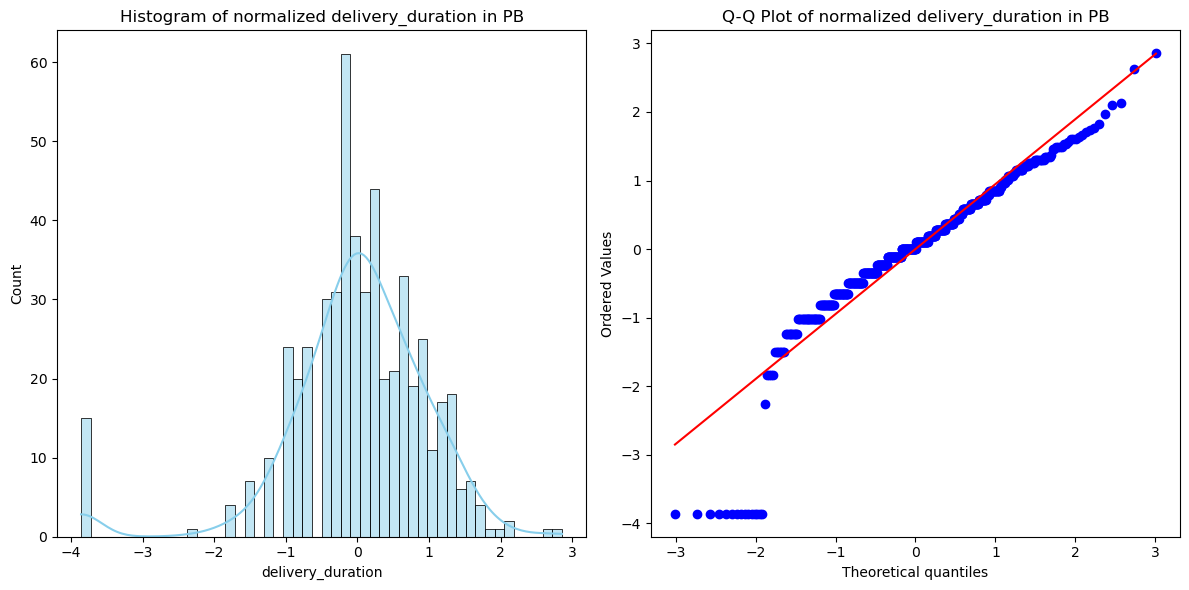

Kolmogorov-Smirnov test after transformation for PB:
The p-value is 3.7292695450822706e-06


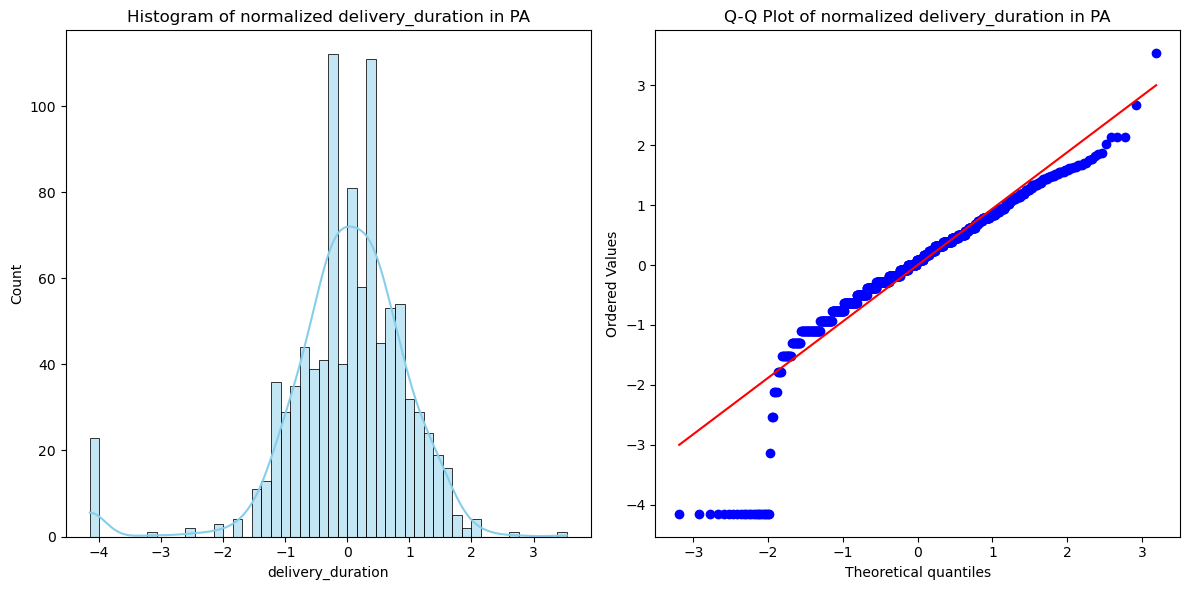

Kolmogorov-Smirnov test after transformation for PA:
The p-value is 5.338119043447612e-09


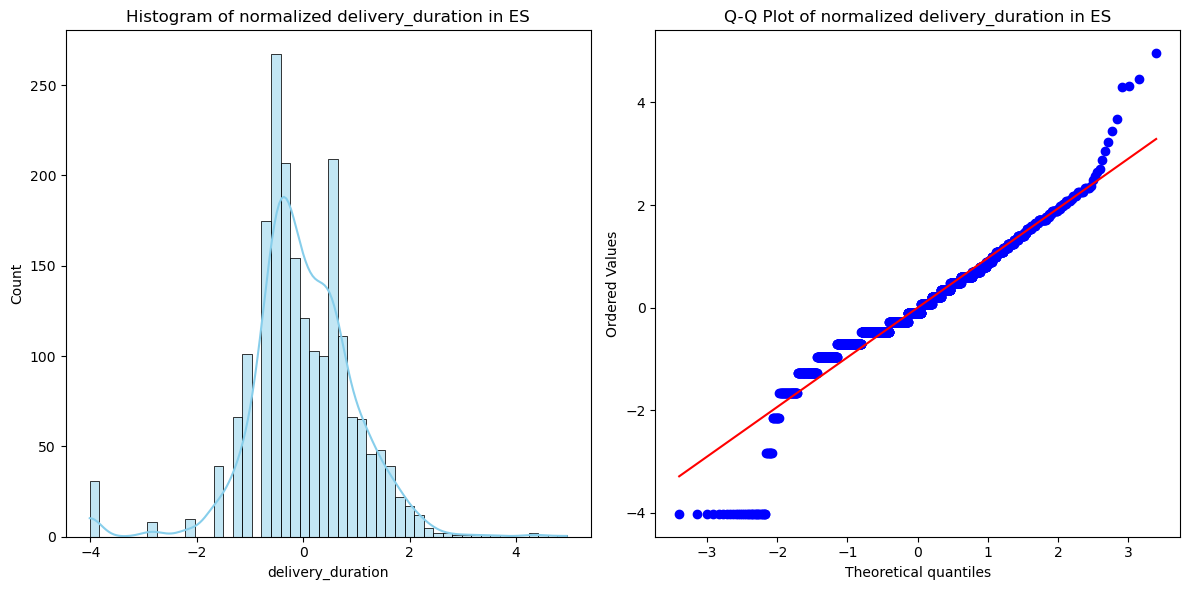

Kolmogorov-Smirnov test after transformation for ES:
The p-value is 9.760292369148015e-24


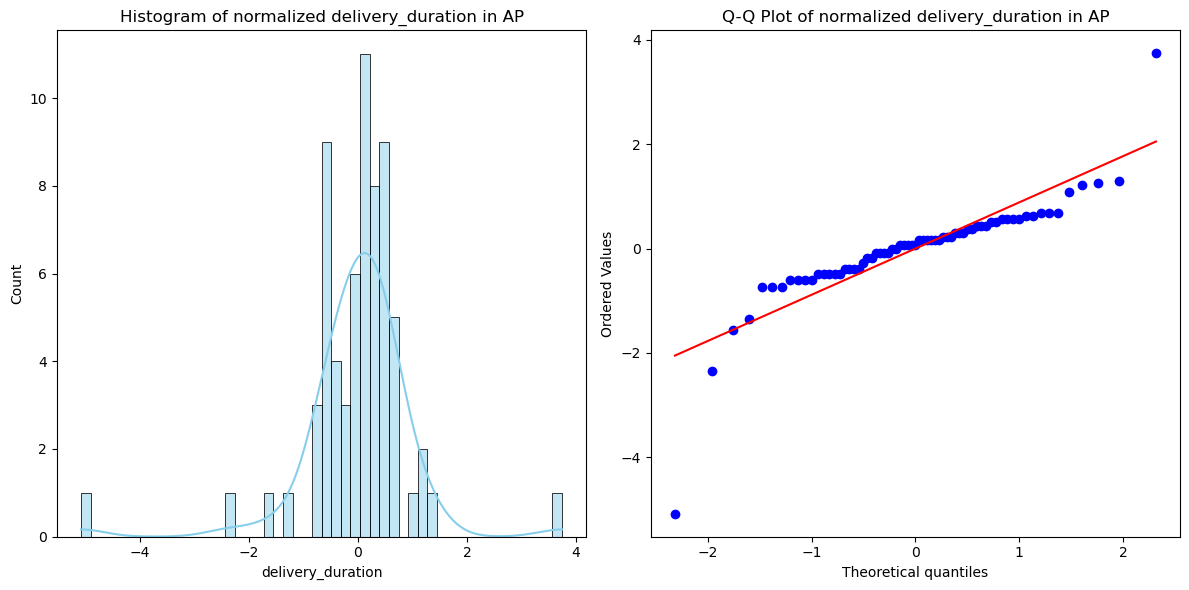

Kolmogorov-Smirnov test after transformation for AP:
The p-value is 0.030783346080750063


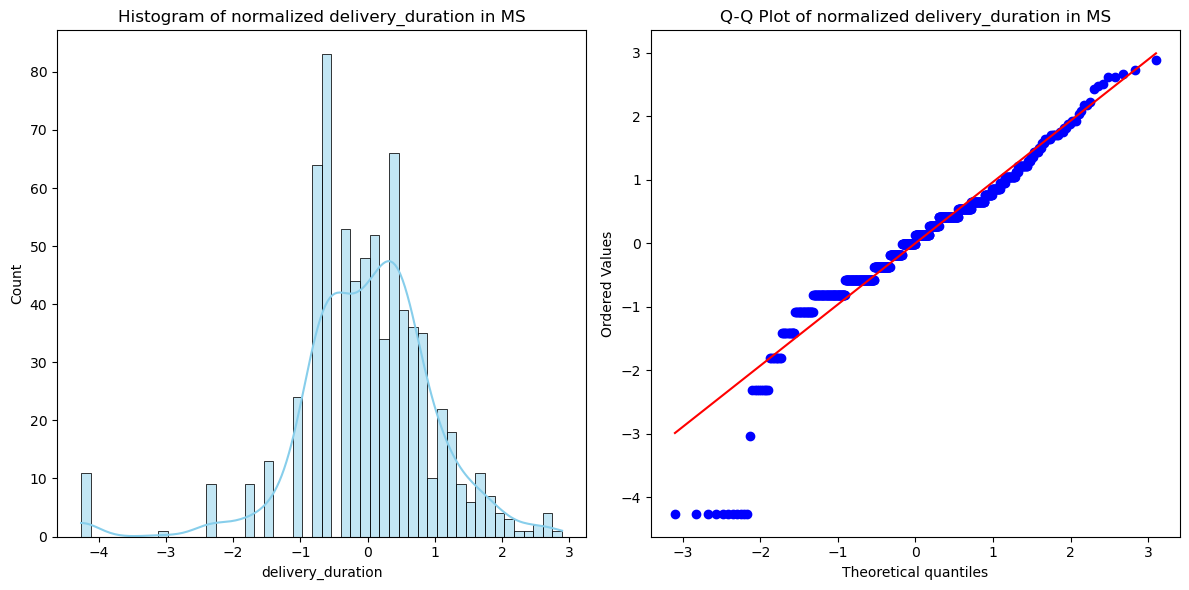

Kolmogorov-Smirnov test after transformation for MS:
The p-value is 1.3486511385182543e-08


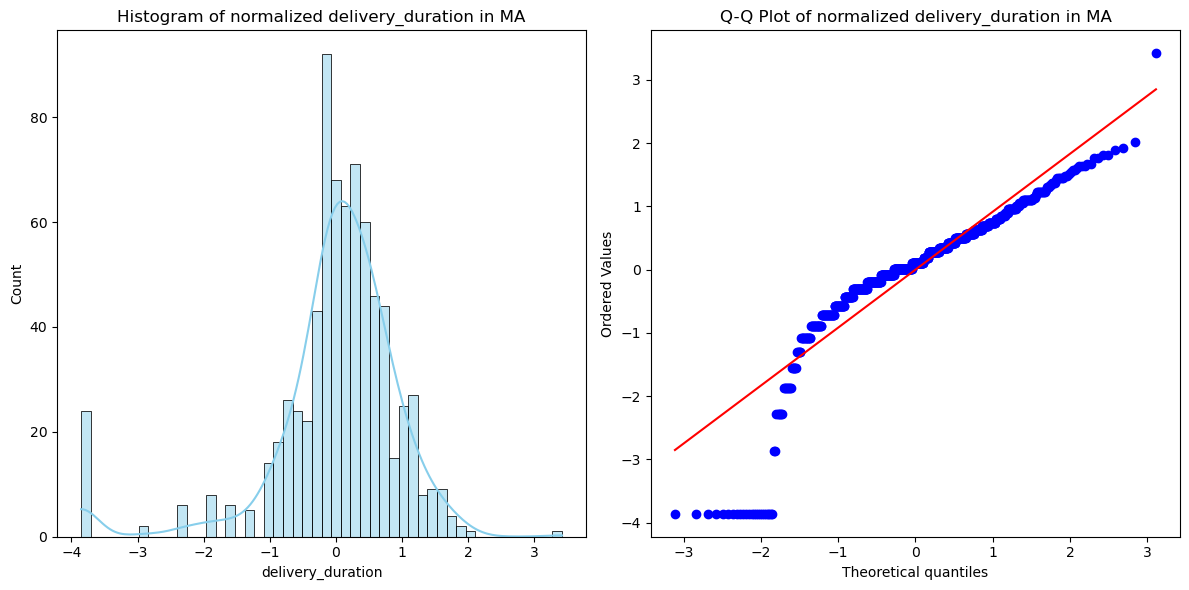

Kolmogorov-Smirnov test after transformation for MA:
The p-value is 1.7883708617315672e-19


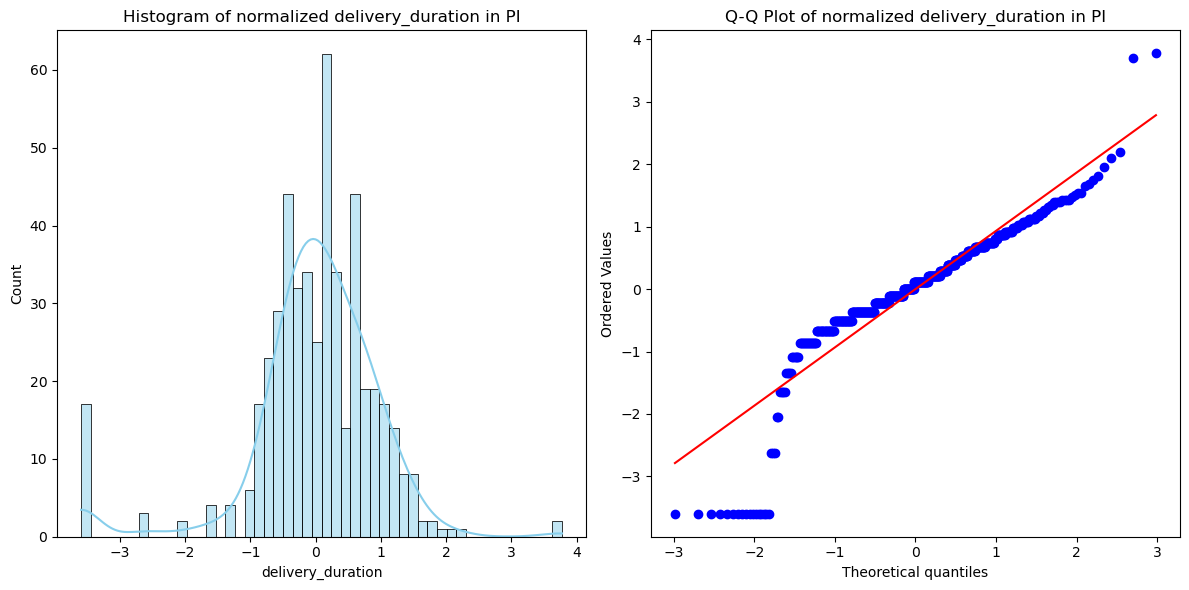

Kolmogorov-Smirnov test after transformation for PI:
The p-value is 6.590571032052048e-10


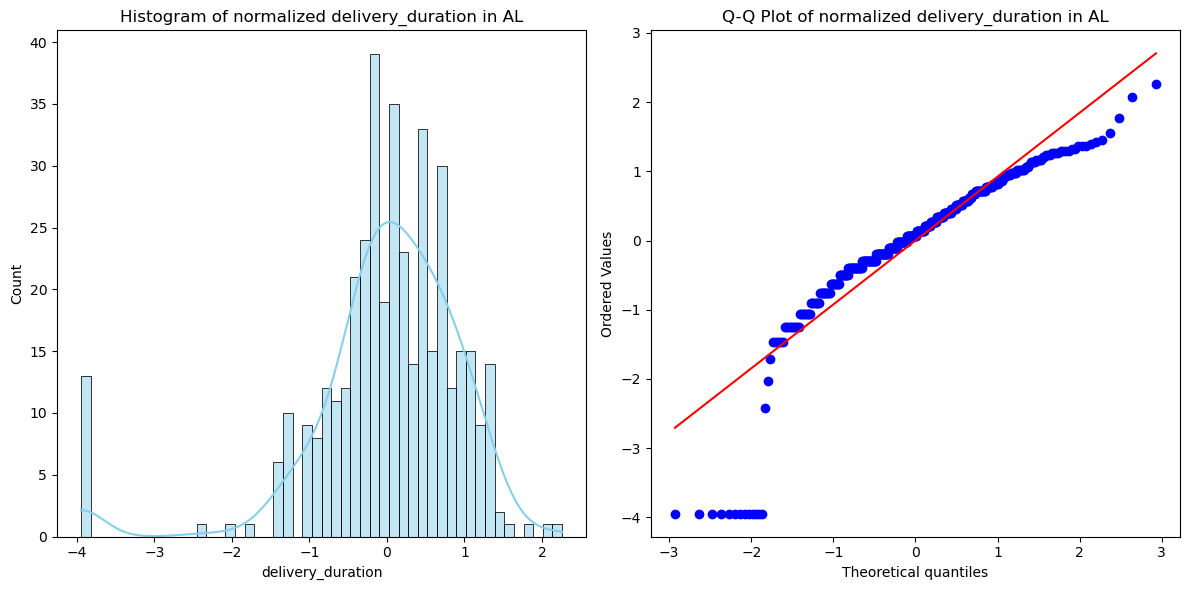

Kolmogorov-Smirnov test after transformation for AL:
The p-value is 1.2274315107634106e-07


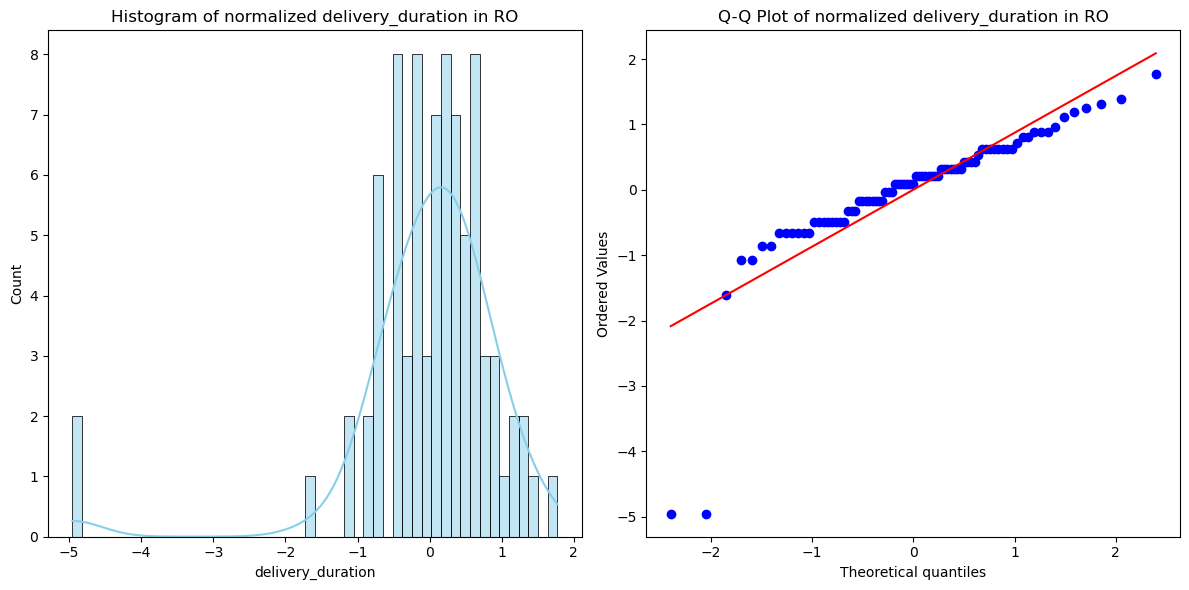

Kolmogorov-Smirnov test after transformation for RO:
The p-value is 0.015584510298507603


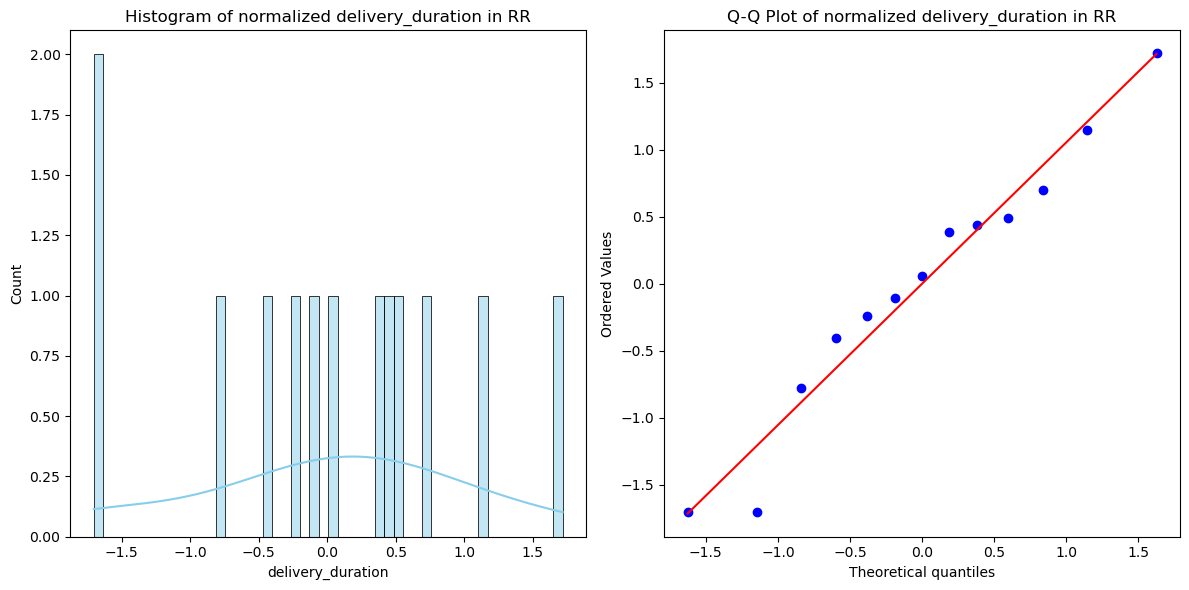

Kolmogorov-Smirnov test after transformation for RR:
The p-value is 0.990949234995036


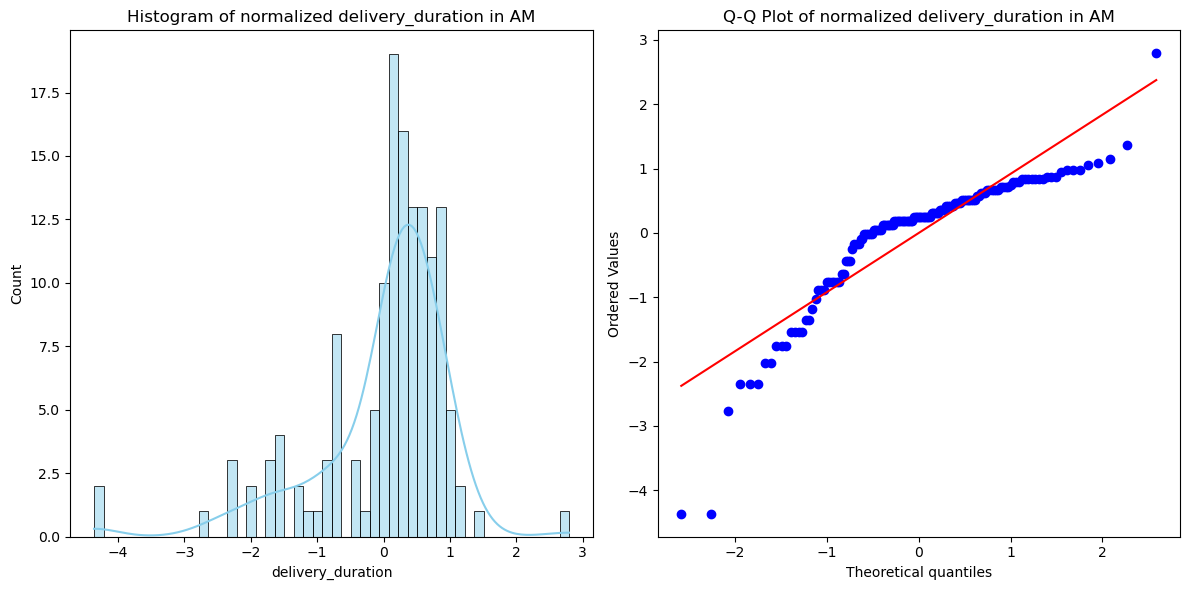

Kolmogorov-Smirnov test after transformation for AM:
The p-value is 1.5256283386854832e-06


In [182]:
# If normality is not satisfied, normalize the data
df_logistics_htest_1 = data_normalization_group(df_logistics_htest_1, column_name='delivery_duration', group_column='state_customer')


Hypothesis testing

In [183]:
df_logistics_htest_1['state_customer'].unique()

array(['SP', 'GO', 'RN', 'PR', 'RS', 'RJ', 'MG', 'SC', 'BA', 'PE', 'TO',
       'CE', 'DF', 'SE', 'MT', 'PB', 'PA', 'ES', 'AP', 'MS', 'MA', 'PI',
       'AL', 'RO', 'RR', 'AM'], dtype=object)

In [184]:
# Set Hypothesis

# H0: The average delivery duration not differs across different states.
# H1: The average delivery duration differs across different states.

In [185]:
state_customer = ['SP', 'GO', 'RN', 'PR', 'RS', 'RJ', 'MG', 'SC', 'BA', 'PE', 'TO',
       'CE', 'DF', 'SE', 'MT', 'PB', 'PA', 'ES', 'AP', 'MS', 'MA', 'PI',
       'AL', 'RO', 'RR', 'AM']

anova_data = [df_logistics_htest_1[df_logistics_htest_1['state_customer'] == state]['delivery_duration']
              for state in state_customer]

# Perform ANOVA
anova_result = stats.f_oneway(*anova_data)

# Print the ANOVA result
print('ANOVA result:', anova_result)

ANOVA result: F_onewayResult(statistic=3.3548769267875245e-28, pvalue=1.0)


**Outcomes**: <br> 
- we fail to reject the null hypothesis.
- we cannot prove it statistically.
- there is no significant difference in the average delivery duration across different states.

### Comparing Delivery Duration with the Estimated Delivery Time (Paired Sample T-Test)

In [186]:
df_logistics_htest_2 = df_logistics.copy()

Normality check

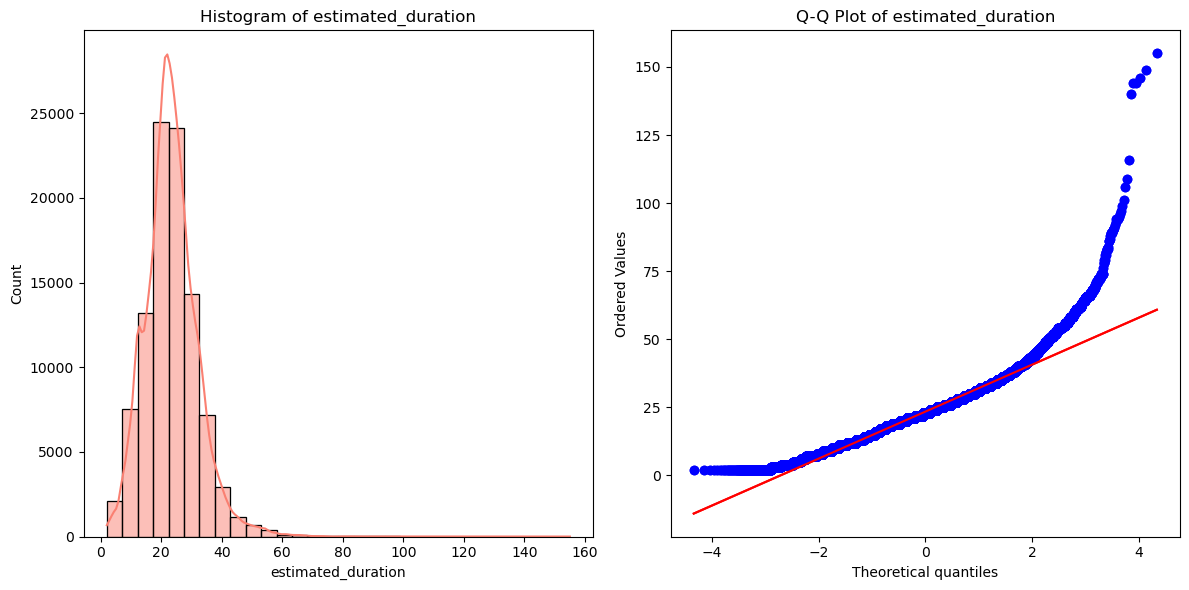

The p value is 0.0
The test results indicate that the distribution is significantly different from a normal distribution.


In [187]:
normality_check(df_logistics_htest_2,'estimated_duration')

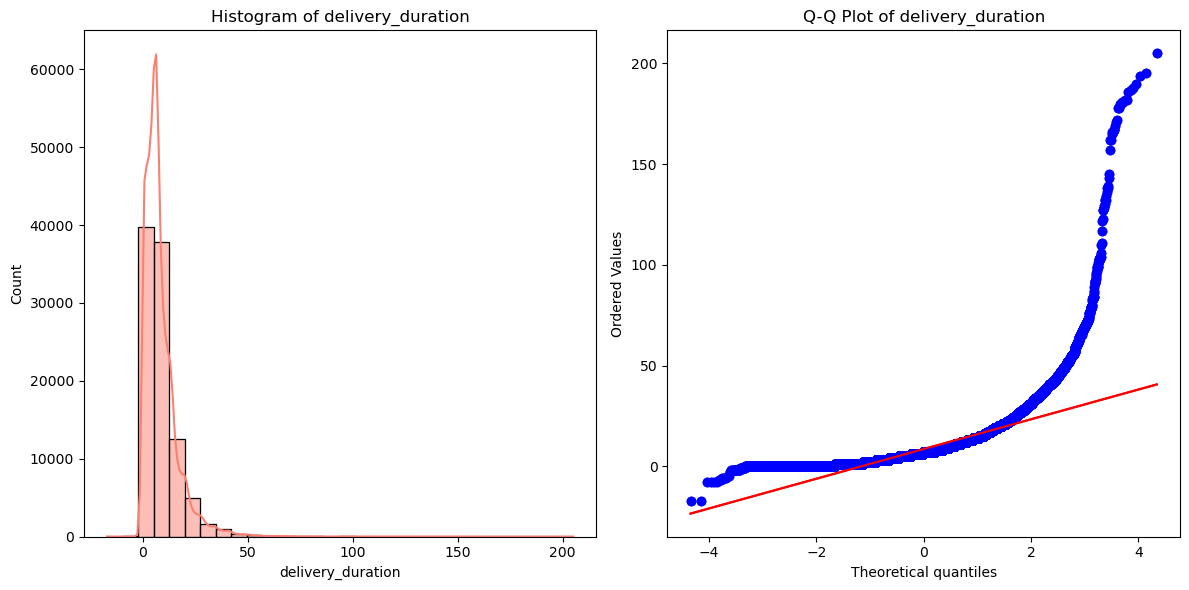

The p value is 0.0
The test results indicate that the distribution is significantly different from a normal distribution.


In [188]:
normality_check(df_logistics_htest_2,'delivery_duration')

Data Normalization

In [189]:
data_normalization(df_logistics_htest_2, 'estimated_duration')

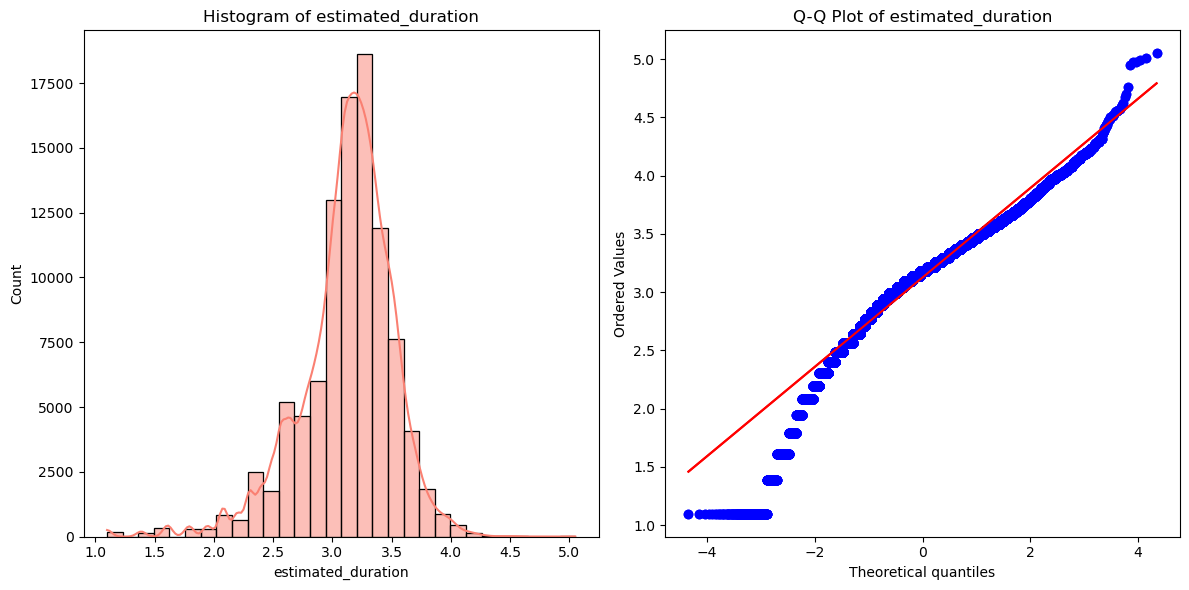

The p value is 0.0
The test results indicate that the distribution is significantly different from a normal distribution.


In [190]:
normality_check(df_logistics_htest_2, 'estimated_duration')

In [191]:
df_logistics_htest_2.loc[df_logistics_htest_2['delivery_duration'] < 0, 'delivery_duration'] = 0

In [192]:
data_normalization(df_logistics_htest_2, 'delivery_duration')

Hypothesis Testing

In [193]:
# Set Hypothesis

# H0: There is no difference between actual delivery duration and estimated delivery time.
# H1: There is a significant difference between actual delivery duration and estimated delivery time.

In [194]:
# Perform paired t-test
ttest_result = ttest_rel(df_logistics_htest_2['delivery_duration'], df_logistics_htest_2['estimated_duration'])
print('Paired T-Test result:', ttest_result)


Paired T-Test result: TtestResult(statistic=-503.5402683401314, pvalue=0.0, df=98390)


**Outcomes**: <br>
- We reject the null hypothesis.
- The large negative t-statistic indicates that the actual delivery duration is significantly less than the estimated delivery time.
- The large df indicates a very large sample size, which increases the power of the test to detect even small differences

### Comparing Sales Accross Different Season (ANOVA)